# **Aprendizaje supervisado: problemas de regresión y combinación de métodos**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de poblemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.	
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.	

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de regresión teniendo en cuenta temas relevantes de índole social, científica o ética.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de regresión usando las métricas de evaluación comunes para estos problemas.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de regresión, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.
- Conocer los distintos métodos existentes para combinar diversos modelos en problemas de aprendizaje supervisado, tanto para clasificación como regresión.


## Descripción de la actividad
Para ello, en este notebooks tendréis que realizar 5 ejercicios:

1. Buscar un dataset con el que queráis trabajar. Tened en cuenta que debe ser un dataset sobre el que poder aplicar regresión.

2. Cargar el dataset escogido, limpiarlo, pre-procesarlo y dejarlo listo y realizar la regresión.

3. Realizar la regresión con al menos 3 algoritmos distintos de los estudiados en la teoría y comparar los resultados, utilizando para ello la métrica correspondiente (MAE, MSE, RMSE...). Los métodos que podéis utilizar son:
 * Linear Regression
 * kNN Regression
 * Tree Regression
 * SVR Regression
 * MLP Regression
 
4. Intentar mejorar los resultados obtenidos haciendo uso de algún método de combinación de modelos els resultats obtinguts fent ús d'algun mètode de combinació de models y comparar los resultados, utilizando para ello la métrica correspondiente (MAE, MSE, RMSE...). Esta métrica tendrá que ser la misma que en el ejercicio 3 para poder comparar los resultados. Los métodos que podéis utilizar son:
 * Model ensemble
 * Bagging
 * Boosting

5. Implementar vuestro propio método de combinación de modelos a partir de algún modelo de regresión de los que existen en sklearn. En concreto debereis implementar el algoritmo Random Forest Regressor.


## **Ejercicio 1**

Elige un dataset de entre los propuestos. Una vez escogido, explica qué pretendes conseguir y cómo piensas conseguirlo. Es importante que hagas este paso **antes** que el ejercicio 3, ya que en el ejercicio 3 tendrás que comentar hasta qué punto has conseguido tu objetivo y qué crees que podrías mejorar en caso de no haberlo conseguido.

Datasets disponibles:

- **Swedish Auto Insurance Dataset**

Predecir el total de pagos por las reclamaciones efectuadas por los usuarios de un seguro automovilístico Sueco (Swedish Kronor).

Descarga: https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt

Más información: http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html


- **Abalone Dataset**

Predecir la edad de un [abalon](https://en.wikipedia.org/wiki/Abalone) dadas una serie de medidas.

Descarga: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

Más información: https://archive.ics.uci.edu/ml/datasets/Abalone

- **Boston House Price Dataset**

Predecir el precio de una casa según un conjunto de medidas.

Descarga: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

Más información: https://archive.ics.uci.edu/ml/datasets/Housing


La fuente de estos datasets es https://machinelearningmastery.com/standard-machine-learning-datasets/. En dicha fuente encontraréis una descripción más detallada, así como distintos resultados para comparar con los vuestros y saber cómo de buenos son los resultados que obtenéis.

**Para ampliar**

Aquellxs que queráis, además de utilizar uno de estos datasets, ampliar la práctica y trabajar con datasets más complejos, podéis hacerlo. Aquí disponéis de un enlace con más de 400 y 700 datasets respectivamente: 

- https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=list
- https://data.world/datasets/regression

## *R.1 Mission*

A falta de tiempo para descargar un buen dataset aquí en España por vía webscraping, he decidido descargar una versión actualizada y mejorada del dataset más conocido `Housing` el original de IOWA. Tal como viene indicada en la propia competición de Kaggle

> The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

disponible en este enlace: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Para su descarga, procedo directamente a la conexión API de Kaggle y descargar el dataset.

## Instalando las dependencias de Kaggle en Google Colab



In [ ]:
!pip install kaggle -q

In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.3 MB/s 


In [ ]:
# Es preferible realizar un upgrade
!pip install kaggle --upgrade -q

In [ ]:
# Verificamos la instalación para añadir nuestro token
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Solo para Google colab para subir el fichero kaggle.json
from google.colab import files
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marcusrb","key":"bab02e72a8a56479ea0893e4e9414307"}'}

In [ ]:
# Como kaggle nos pide de insertar kaggle.json en una carpeta oculta .kaggle/ c
# Procederemos a crear una carpeta oculta
!mkdir -p ~/.kaggle
# copiar el fichero de nuestra carpeta /content a la carpeta /.kaggle
!cp /content/kaggle.json ~/.kaggle/ # este paso solo es válido para Google Colab
# Añadimos los permisos de usuario 600
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Comprobamos que el fichero exista
!ls ~/.kaggle

kaggle.json


In [ ]:
# Comprobamos la librería de kaggle
!kaggle

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: the following arguments are required: command


### Descargamos el dataset

Para la competición utilizamos los comandos API de Kaggle, tal como indicado en su repositorio oficial: https://www.kaggle.com/docs/api para ello necesitamos darnos de alta a la competición primero de realizar la descarga.

In [ ]:
# Utilizamos este comando kaggle para descargar una competición
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 59.8MB/s]


In [ ]:
# Estando en formado zip, descargamos el fichero
!unzip -q house-prices-advanced-regression-techniques.zip -d .

In [ ]:
# Observamos los ficheros train.csv y test.csv para poder seguir con el resto de prácticas.
!ls

data_description.txt				 sample_submission.csv
house-prices-advanced-regression-techniques.zip  test.csv
kaggle.json					 train.csv
sample_data


## Composición del dataset.

Siendo la versión extendida del Boston housing y la oficial de Iowa, este dataset consta de las siguientes `features` con variable dependiendente `SalesPrice`, expresado en dolares.

```

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

### Descripción de los campos

Procederemos con un estudio de las variables a grandes rasgos para determinar su distribución, importancia y correlación. De manera que realizaremos un análisis univariante, bivariante y multivariante.

```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
```

## **Ejercicio 2**

Una vez elegido el dataset, deberás descargarlo a Colab y cargarlo en un array de numpy. Para hacer esto puedes basarte en los notebooks de la asignatura, los cuales tienes disponibles en el repositorio oficial de la asignatura: https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic.

En concreto, podéis basaros en el [notebook de Naive Bayes](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/2_supervised_learning_classification/01_NaiveBayes.ipynb), el cual se descarga y carga los datos del dataset de Mushrooms.

Una vez tengáis el dataset cargado y listo, podéis pasar al ejercicio 3.

### R.2

En esta fase realizaremos los siguientes pasos:

1. Comprobación del entorno.
2. Verificación de las librerías y dependencias.
3. Importar las librerías y los módulos.
4. Adquisición de los datos, crear el dataset.
5. EDA, explotarorio de los datos, análisis y visión de patrones e insight.
6. Preparación y limpieza de los datos.
7. Feature Engineering.
8. Resumen y conclusiones

***

## 1. Entorno

Es importante tener en cuenta la versión de las dependencias del entorno en caso de tener que replicar los resultados a otro diferente y mantener las mismas versiones de las mismas.

In [ ]:
# Realizamos una comprobaciones del entorno

# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


## 2. Check Librerías

Se realizan las comprobaciones de versiones y eventuales instalaciones de nuevas librerías y dependencias.

In [ ]:
%%sh
pip install mlflow -q

In [ ]:
!pip install pyngrok --quiet

     |████████████████████████████████| 761 kB 5.1 MB/s 



## 3. Carga Librerías

In [ ]:
# Cargando las librerías por categoría

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Generic
import os
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder
from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer

# machine learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     cross_validate, StratifiedKFold, 
                                     learning_curve, KFold )

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

## Load MLops
import mlflow
import mlflow.sklearn

In [ ]:
# Ampliar tamaño columnas
pd.set_option("display.max_columns", 100)

In [ ]:
# Utiliza wget para descargarte el notebook

# REALIZADO AL PASO ANTERIOR.

Al tratarse de un conjunto de datos ya previamente splitado en `train` y `test`, trataremos el completo para preprocesarlo en la misma forma y finalmente utilizaremos los dos ficheros para su entreno del modelo y predicción. Recordamos que la variable dependiente en el conjunto de `test` no existe, por lo que deberíamos utilizar un conjunto de validación desde el mismo `train`.

In [ ]:
# Utiliza pandas o la librería de tu elección para cargar los datos
ruta = '/content/'
train_file = 'train.csv'
test_file = 'test.csv'

# Creamos el autogenerador random para que nos sirva para toda la actividad
seed = 17

# Cargamos los dos ficheros
train_df = pd.read_csv(os.path.join(ruta, train_file), sep=",")
test_df = pd.read_csv(os.path.join(ruta, test_file), sep=",")

# combinar los dos ficheros
df_list = [train_df, test_df]

# Cargamos los datos del muestreo y comprobamos su composición del train
# Visualizamos un muestreo de 10 aleatorio
df_list[0].sample(10, random_state=seed)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
703,704,190,RM,76.0,7630,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2Story,5,9,1900,1996,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,Unf,0,Unf,0,360,360,GasA,Gd,Y,SBrkr,1032,780,0,1812,0,0,2,0,4,2,Gd,8,Typ,1,Po,Detchd,1999.0,Unf,2,672,TA,TA,N,344,0,40,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,140000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
937,938,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,341,Unf,0,772,1113,GasA,Ex,Y,SBrkr,1113,858,0,1971,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,RFn,2,689,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,253000
1330,1331,20,RL,85.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,410.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,1588,1588,GasA,Ex,Y,SBrkr,1588,0,0,1588,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,825,TA,TA,Y,144,45,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,227000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2,450,TA,TA,Y,166,120,192,0,0,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1940,1992,Gable,CompShg,MetalSd,MetalSd,Stone,294.0,TA,Gd,CBlock,TA,TA,No,BLQ,510,Unf,0,278,788,GasA,TA,Y,SBrkr,804,0,0,804,1,0,1,0,2,1,Gd,4,Typ,2,Gd,Attchd,1940.0,Unf,1,240,TA,TA,Y,0,0,154,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000
310,311,60,RL,NaN,7685,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,112.0,TA,TA,PConc,Gd,TA,No,ALQ,518,Unf,0,179,697,GasA,Gd,Y,SBrkr,697,804,0,1501,0,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1993.0,Fin,2,420,TA,TA,Y,190,63,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165600
1142,1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,340.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1150,Unf,0,316,1466,GasA,Ex,Y,SBrkr,1466,1362,0,2828,1,0,3,0,4,1,Gd,11,Typ,1,TA,BuiltIn,2006.0,RFn,3,1052,TA,TA,Y,125,144,0,0,0,0,NaN,NaN,NaN,0,4,2007,New,Partial,424870
766,767,60,RL,80.0,10421,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,42.0,TA,TA,CBlock,Gd,TA,No,GLQ,394,Unf,0,586,980,GasA,TA,Y,SBrkr,980,734,0,1714,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1988.0,Unf,2,496,TA,TA,Y,228,66,156,0,0,0,NaN,MnPrv,Shed,500,3,2010,WD,Normal,196500
836,837,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1948,1973,Gable,CompShg,VinylSd,VinylSd,None

In [ ]:
# Mostramos el mismo para el test
# Visualizamos un muestreo de 10 aleatorio
df_list[0].sample(10, random_state=seed)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
703,704,190,RM,76.0,7630,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2Story,5,9,1900,1996,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,Unf,0,Unf,0,360,360,GasA,Gd,Y,SBrkr,1032,780,0,1812,0,0,2,0,4,2,Gd,8,Typ,1,Po,Detchd,1999.0,Unf,2,672,TA,TA,N,344,0,40,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,140000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
937,938,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,341,Unf,0,772,1113,GasA,Ex,Y,SBrkr,1113,858,0,1971,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,RFn,2,689,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,253000
1330,1331,20,RL,85.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,410.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,1588,1588,GasA,Ex,Y,SBrkr,1588,0,0,1588,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,825,TA,TA,Y,144,45,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,227000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2,450,TA,TA,Y,166,120,192,0,0,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1940,1992,Gable,CompShg,MetalSd,MetalSd,Stone,294.0,TA,Gd,CBlock,TA,TA,No,BLQ,510,Unf,0,278,788,GasA,TA,Y,SBrkr,804,0,0,804,1,0,1,0,2,1,Gd,4,Typ,2,Gd,Attchd,1940.0,Unf,1,240,TA,TA,Y,0,0,154,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000
310,311,60,RL,NaN,7685,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,112.0,TA,TA,PConc,Gd,TA,No,ALQ,518,Unf,0,179,697,GasA,Gd,Y,SBrkr,697,804,0,1501,0,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1993.0,Fin,2,420,TA,TA,Y,190,63,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165600
1142,1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,340.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1150,Unf,0,316,1466,GasA,Ex,Y,SBrkr,1466,1362,0,2828,1,0,3,0,4,1,Gd,11,Typ,1,TA,BuiltIn,2006.0,RFn,3,1052,TA,TA,Y,125,144,0,0,0,0,NaN,NaN,NaN,0,4,2007,New,Partial,424870
766,767,60,RL,80.0,10421,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,42.0,TA,TA,CBlock,Gd,TA,No,GLQ,394,Unf,0,586,980,GasA,TA,Y,SBrkr,980,734,0,1714,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1988.0,Unf,2,496,TA,TA,Y,228,66,156,0,0,0,NaN,MnPrv,Shed,500,3,2010,WD,Normal,196500
836,837,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1948,1973,Gable,CompShg,VinylSd,VinylSd,None

In [ ]:
# Observamos columnas, dimensiones y estadísticos básicos
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_list[0].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_list[0].astype('object').describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1201.0,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452.0,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379.0,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460
unique,1460,15,5,110.0,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327.0,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97.0,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663
top,1,20,RL,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Gd,Attchd,2005.0,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,140000
freq,1,536,1151,143.0,25,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,67,178,1141,1434,515,504,864,861.0,906,1282,647,649,1311,953,430,467,1256,1293,118,37,1428,741,1365,1334,25,829,1434,22,856,1378,768,913,804,1392,735,402,1360,690,380,870,65.0,605,824,81,1311,1326,1340,761,656,1252,1436,1344,1453,3,157,49,1408,253,338,1267,1198,20


In [ ]:
print("El dataset train tiene {} filas y {} columnas".format(df_list[0].shape[0], df_list[0].shape[1]))
print("El dataset test tiene {} filas y {} columnas".format(df_list[1].shape[0], df_list[1].shape[1]))

El dataset train tiene 1460 filas y 81 columnas
El dataset test tiene 1459 filas y 80 columnas


***

## 5. EDA, exploratorio de los datos, análisis y visión de patrones e insight.

Procederemos con la visualización de la variable predictora, y realizaremos una análisis multivariante.

**Preprocesa los datos**: comprueba que el dataset no contiene elementos nulos, revisa si existen outliers, si debes normalizar los datos, etc.

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

In [ ]:
# Analizamos los valores únicos de cada atributo
display_side_by_side(df_list[0].nunique().to_frame(), df_list[0].dtypes.to_frame())

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
Street,2
Alley,2
LotShape,4
LandContour,4
Utilities,2


Actualmente observamos muchas variables del tipo categórico `object`, el resto numéricas continuas.

Podemos estudiar su distribución, correlaciones para tratarlas o bien normalizarlas.

In [ ]:
# Realizamos un pequeño resumen de la variable target

df_list[0].SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


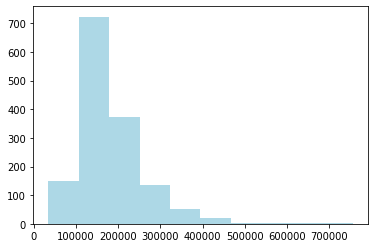

In [ ]:
# Mostramos su distribución y su simestría
print ("Skew is:", df_list[0].SalePrice.skew())
plt.hist(df_list[0].SalePrice, color='lightblue')
plt.show()

Observamos que tiene una simestría positiva, donde los valores centrales están situados en 163,000 USD. Miramos el valor extermo, 755,000 USD y el más bajo 34,900 USD.


***

### EDA - Exploratory Data Analysis

Analizamos todas las variables una por una. Por lo tanto, verificamos valores nulos, errores y cualquier otra cosa sobre los datos, como `Análisis de datos`. El segundo paso, se llama `Limpieza de datos`, lo preparamos y manipulamos para nuestra fase de modelado de aprendizaje automático.

Resumiendo tenemos cuatro etapas:
1. EDA, comprobar variables uno a uno y transformación
2. imputar valor nulo o datos de transformación
3. Visualización y comprobación de patrones
4. Feature Engineering, próximas fases para crear nuevos atributos o transformar otros, como binarización, o discretización, estandarización, reescalado.

Todas las fases agrupadas por EDA, del mismo modo también denominadas `Data Mining` o `Data Preparation` y `Data Manipulation`.

La etapa de `Ingeniería de funciones` es muy importante para verificar nuevas fuentes de datos, agregar nuevas variables o asignar otro significado a alguna variable.

In [ ]:
# Analizamos los valores nulos en general absoluto / relativo tanto para train que test

display_side_by_side(df_list[0].isna().sum().to_frame(name='valores'), (
    df_list[0].isna().sum()/len(df_list[0])*100).to_frame(name='valores'))

,valores
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


Existen valores nulos, por lo que tanto en dataset train que test, procederemos en tratar estos valores, teniendo en cuenta que en caso de eliminar un atributo por encima del 70%, umbral recomendado por remover esta variable, tendríamos que realizarlo en ambos conjuntos.

In [ ]:
# Creamos una función para determinar eventuales errores en nuestro conjunto

# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [ ]:
# Filtramos solamente los valores con nulos
missing_zero_values_table(df_list[0])

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [ ]:
# comprobando también para el conjunto de test
missing_zero_values_table(df_list[1])

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1456,99.8,1456,99.8,object
MiscFeature,0,1408,96.5,1408,96.5,object
Alley,0,1352,92.7,1352,92.7,object
Fence,0,1169,80.1,1169,80.1,object
FireplaceQu,0,730,50.0,730,50.0,object
LotFrontage,0,227,15.6,227,15.6,float64
GarageCond,0,78,5.3,78,5.3,object
GarageYrBlt,0,78,5.3,78,5.3,float64
GarageQual,0,78,5.3,78,5.3,object
GarageFinish,0,78,5.3,78,5.3,object


> Se procederá con eliminar las variables con umbral mayor del 70%. 

- Fence
- Alley
- MiscFeature
- PoolQC
- FireplaceQu (50%) de valores nulos.

In [ ]:
# Observamos los valores únicos
rem_cols = ['Fence', 'Alley', 'MiscFeature','PoolQC','FireplaceQu']

for col in rem_cols:
    display(df_list[0][col].unique())
    display(df_list[0][col].value_counts())

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

array([nan, 'Grvl', 'Pave'], dtype=object)

Grvl    50
Pave    41
Name: Alley, dtype: int64

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
df_list[0].columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Eliminamos las variables con muchos valores nulos para ambos dataset
rem_cols = ['Fence', 'Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu']

for i in range(0,2):
    for col in rem_cols:
        df_list[i].drop(col, axis=1, inplace=True)

In [ ]:
# Observamos el resultado final de las features restantes
for i in range(0,2):
    display(df_list[i].shape)

(1460, 76)

(1459, 75)

In [ ]:
# Preprocesa los datos

# Segundo necesitamos separar las variables cuantitativas de las cualitativas.

# Para convertir en categóricas en binarias debemos pasarla primero en booleanas
# evaluando si son del tipo object o category
categorical_feature = (df_list[0].dtypes == "category") | (df_list[0].dtypes == object)
categorical_cols = df_list[0].columns[categorical_feature].tolist()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# Guardamos las IDs de train y test
train_ids = df_list[0].Id.to_list()
test_ids = df_list[1].Id.to_list()

Para las variables numericas, guardamos el valor ID, eliminando para su tratamiento. El resto de variables estudiaremos la correlación con `SalesPrice` o bien con su categoría afine.

In [ ]:
# Eliminamos la Ids
df_list[0].drop('Id', axis=1, inplace=True)
df_list[1].drop('Id', axis=1, inplace=True)

In [ ]:
# Hacemos lo mismo para el resto de variables cuantitativas
numerical_cols = df_list[0].columns[(~df_list[0].columns.isin(['SalePrice'])) & ~df_list[0].columns.isin(categorical_cols)].to_list()
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
# Comparamos las columnas cat+num + variable target
len(categorical_cols)+len(numerical_cols)+1, df_list[0].shape[1]

(75, 75)

### Análisis univariante para variables cuantitativas

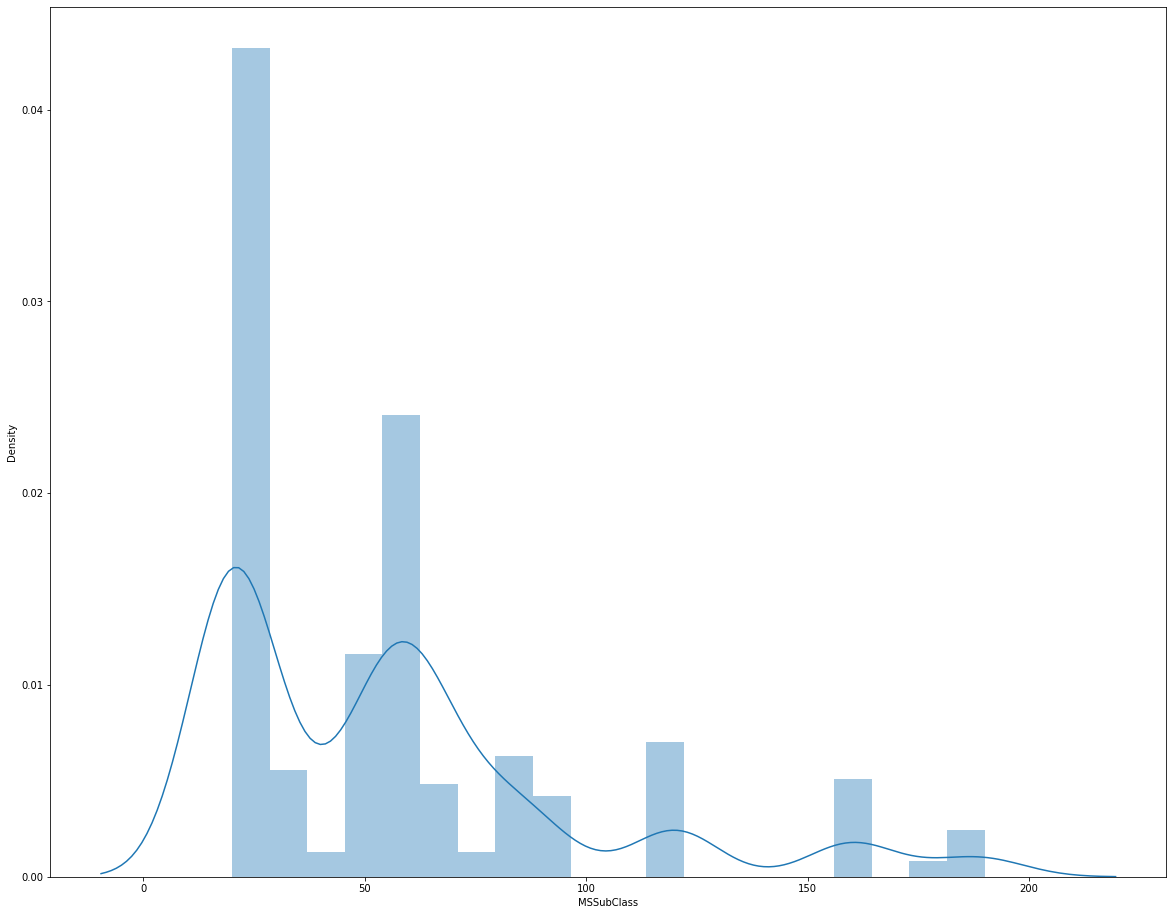

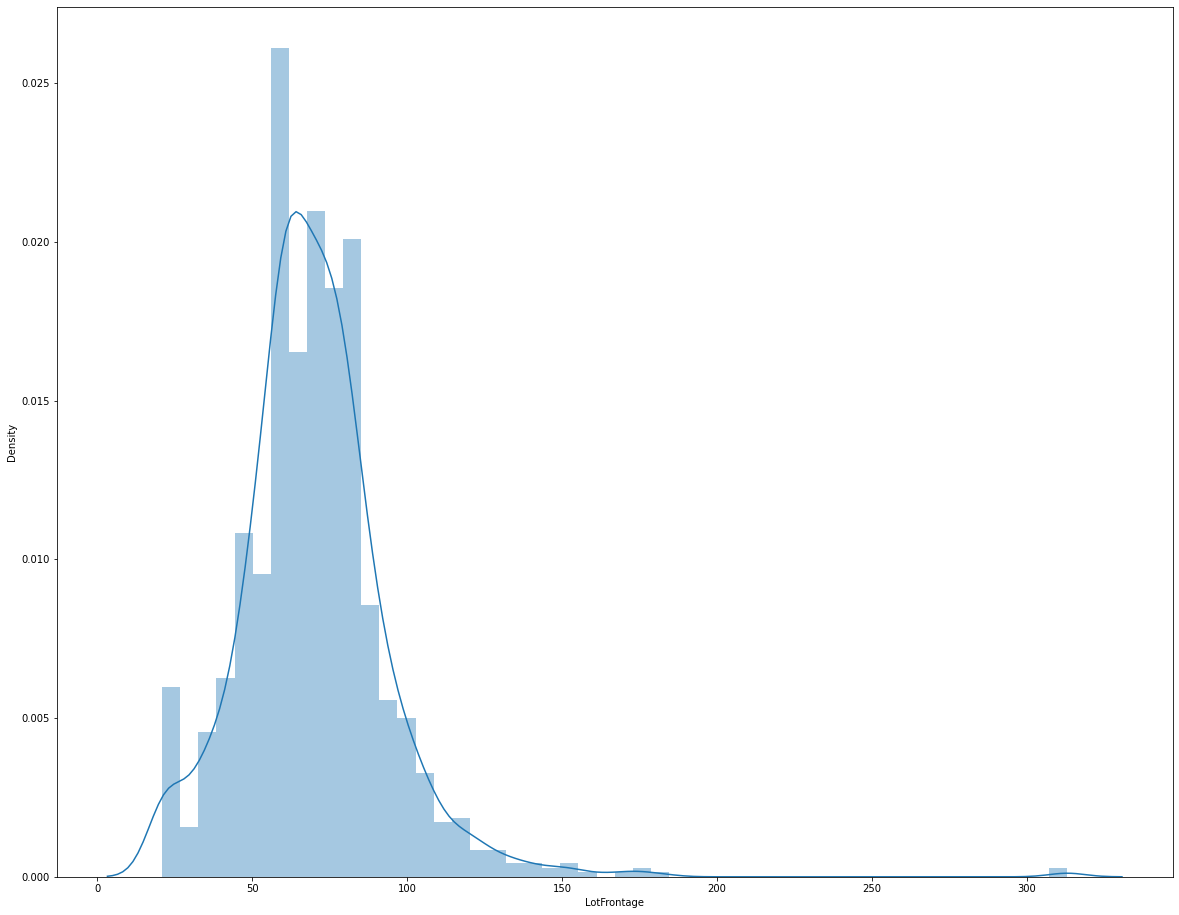

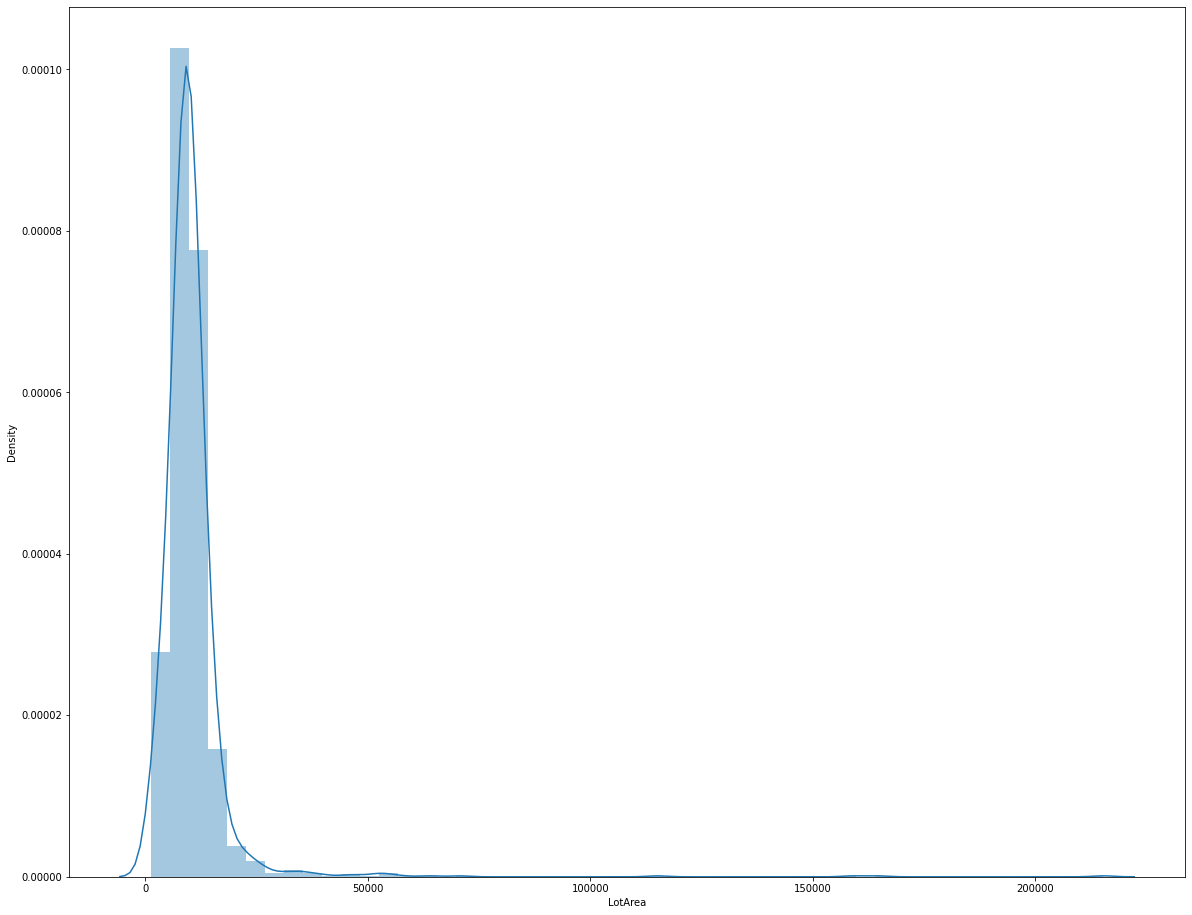

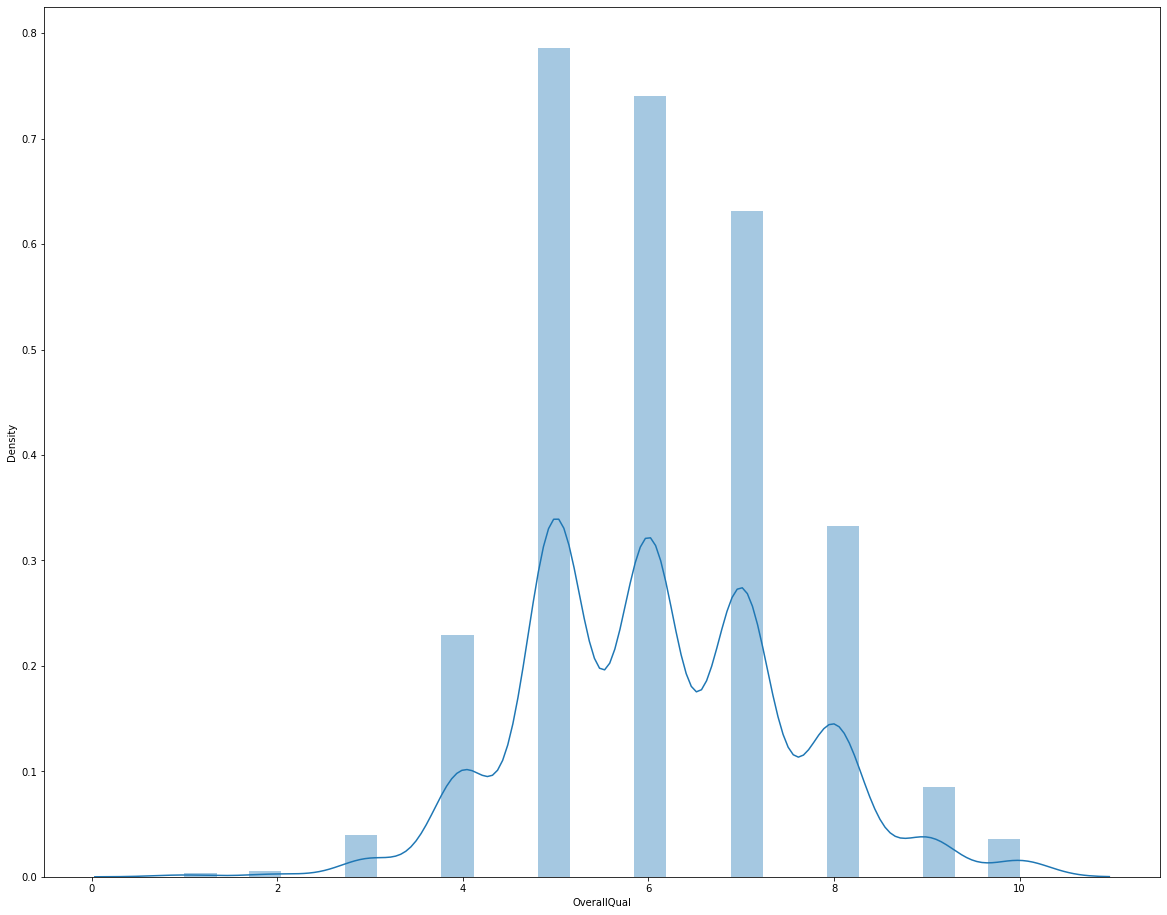

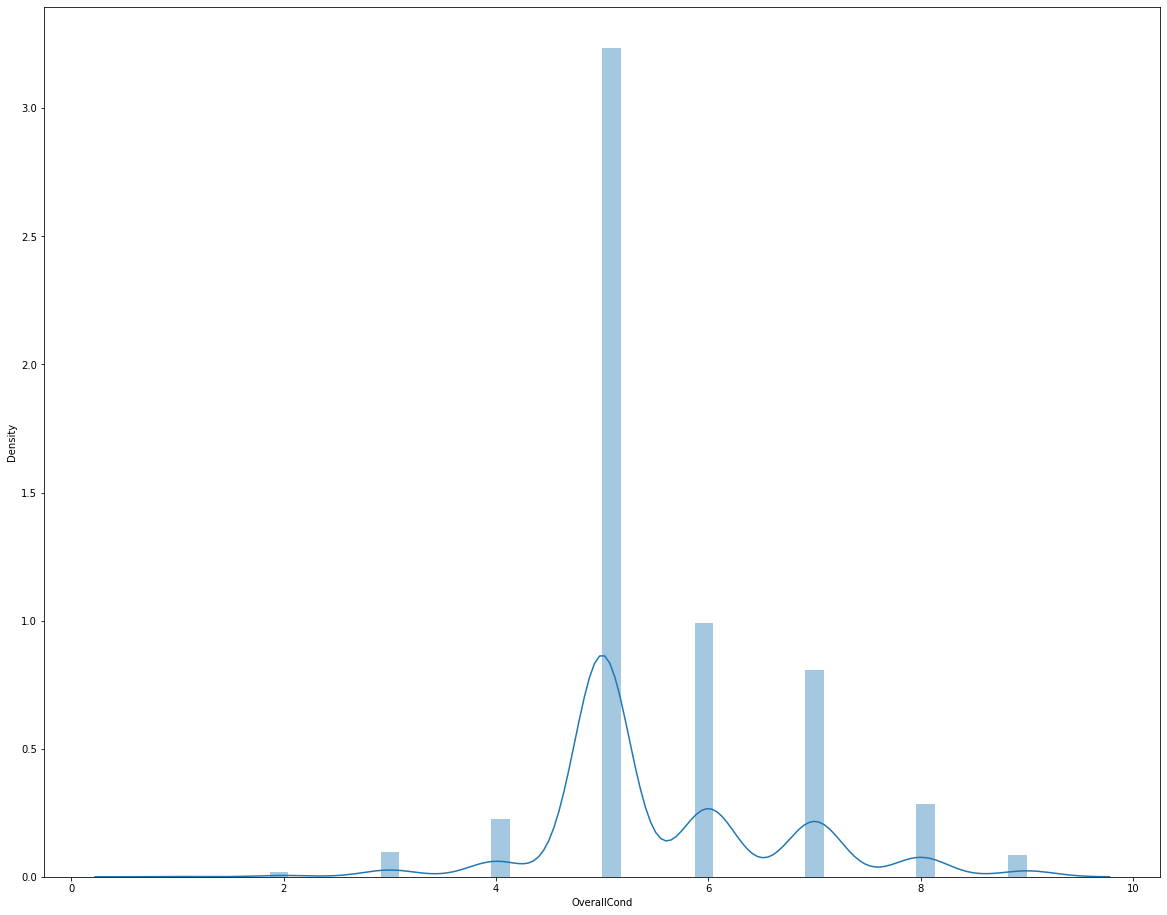

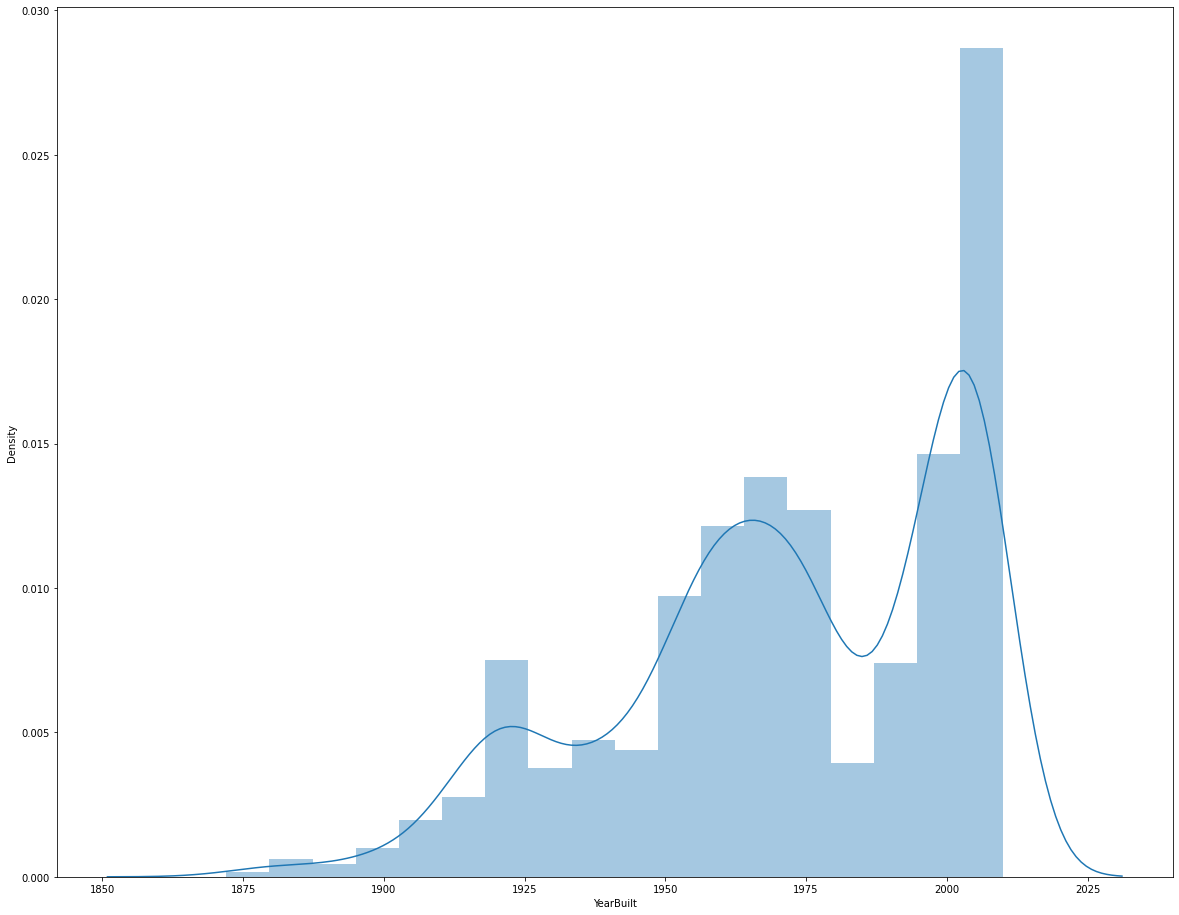

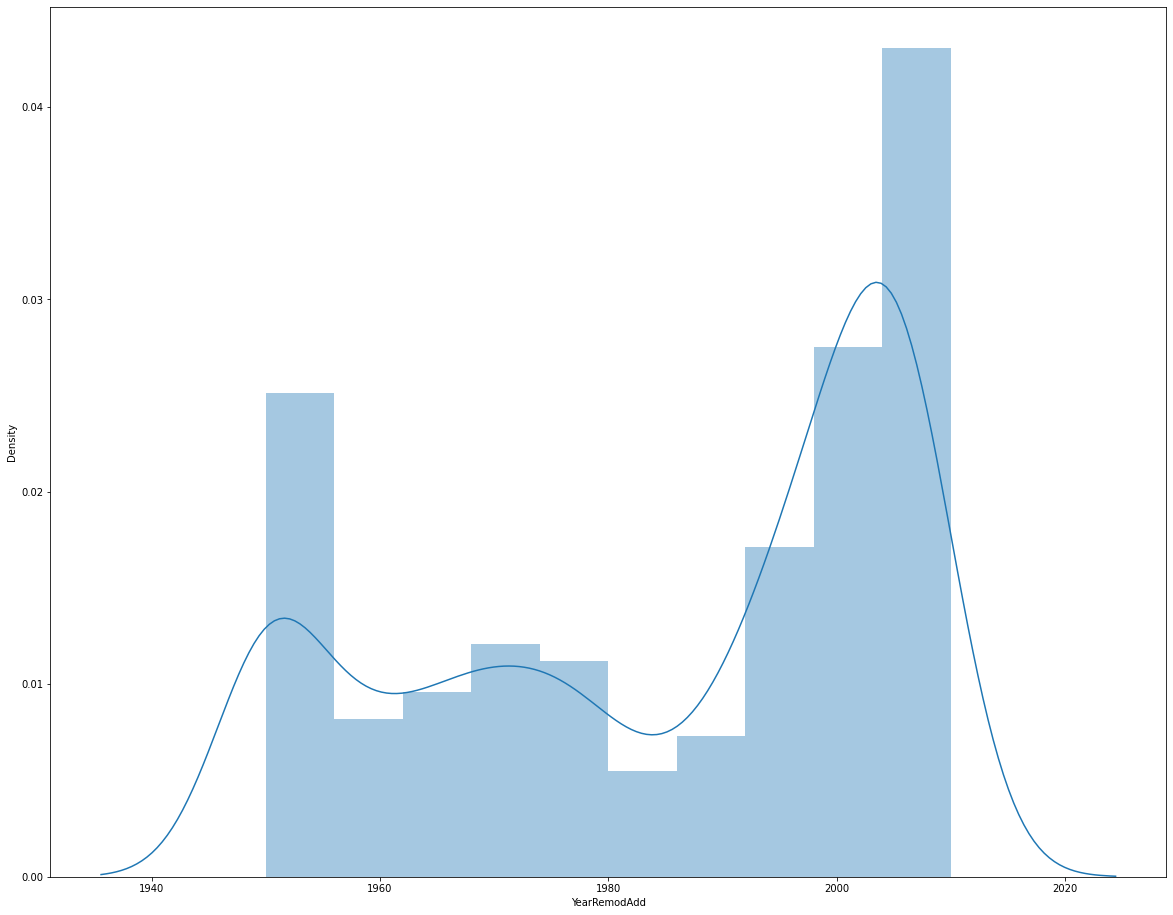

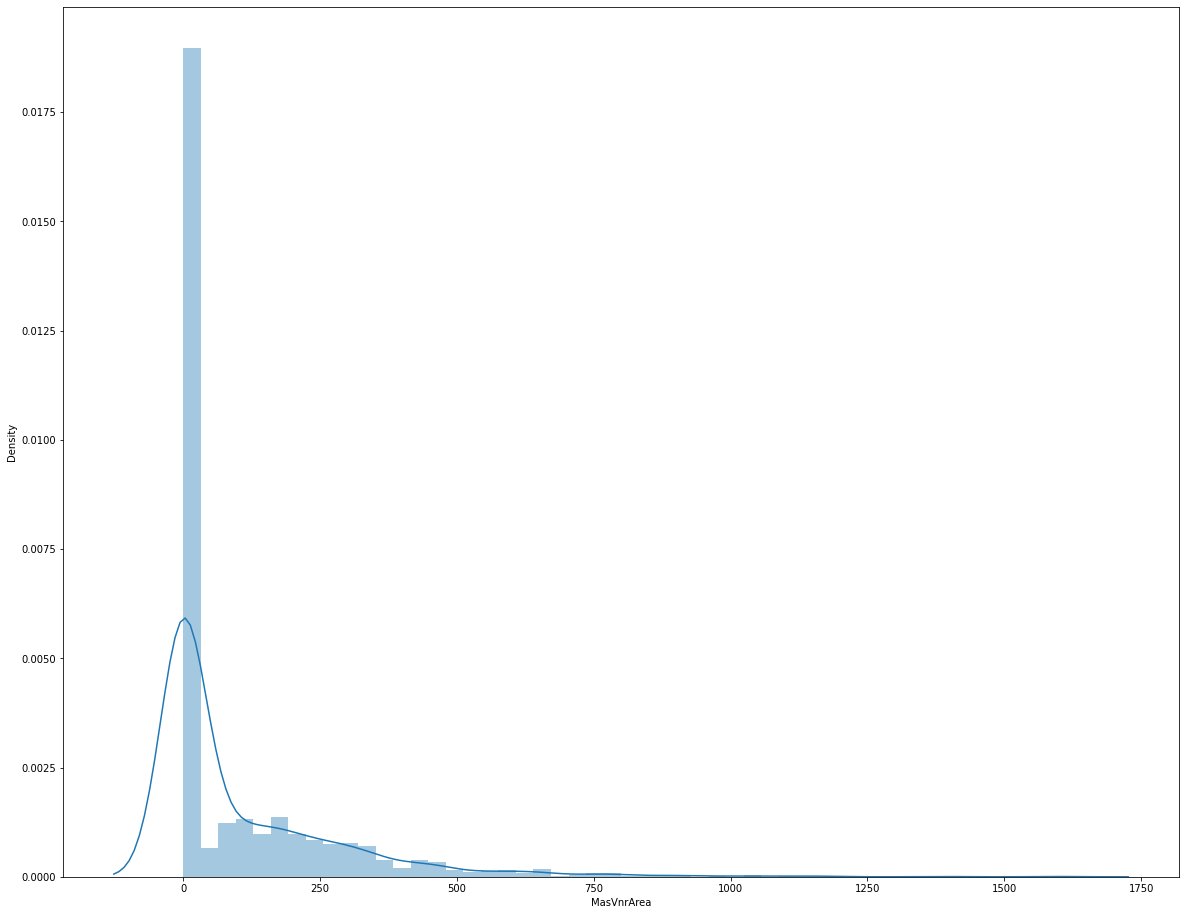

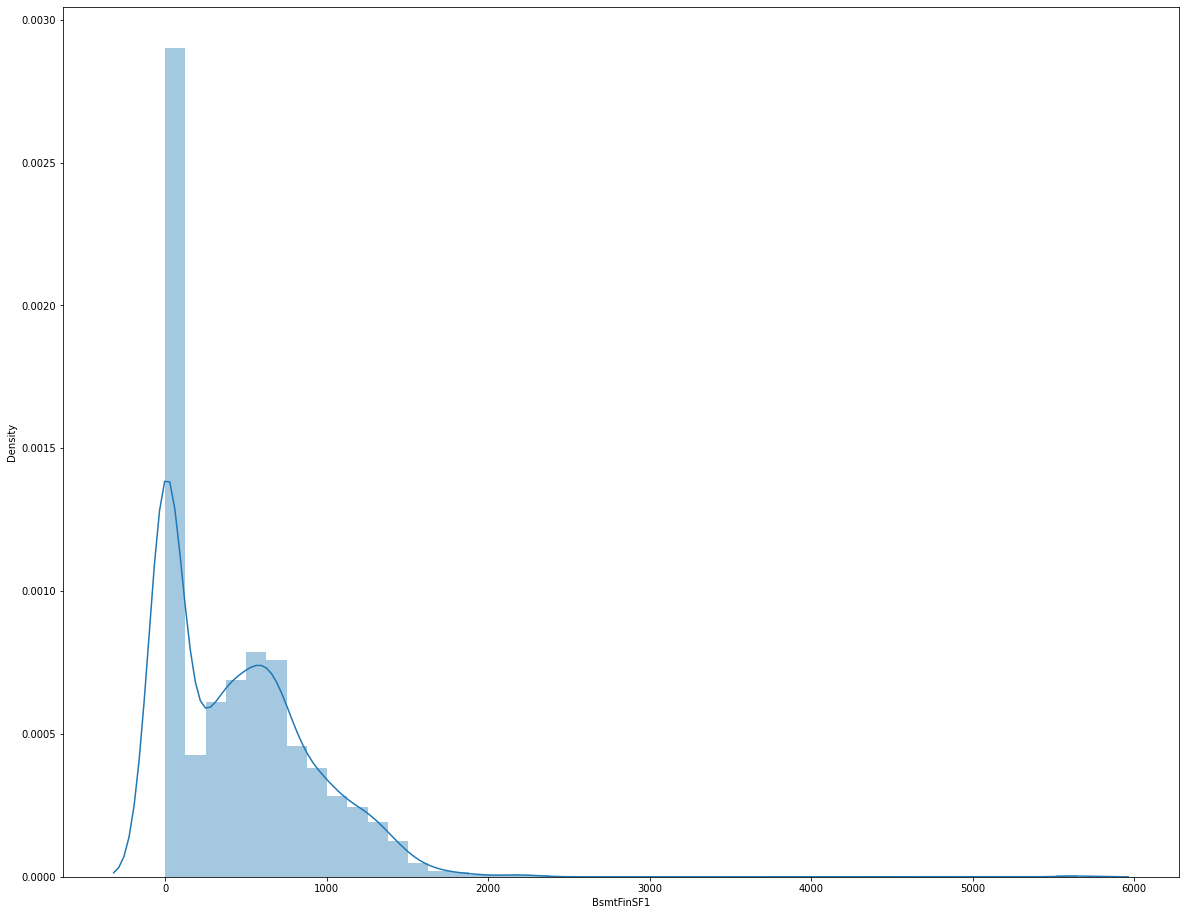

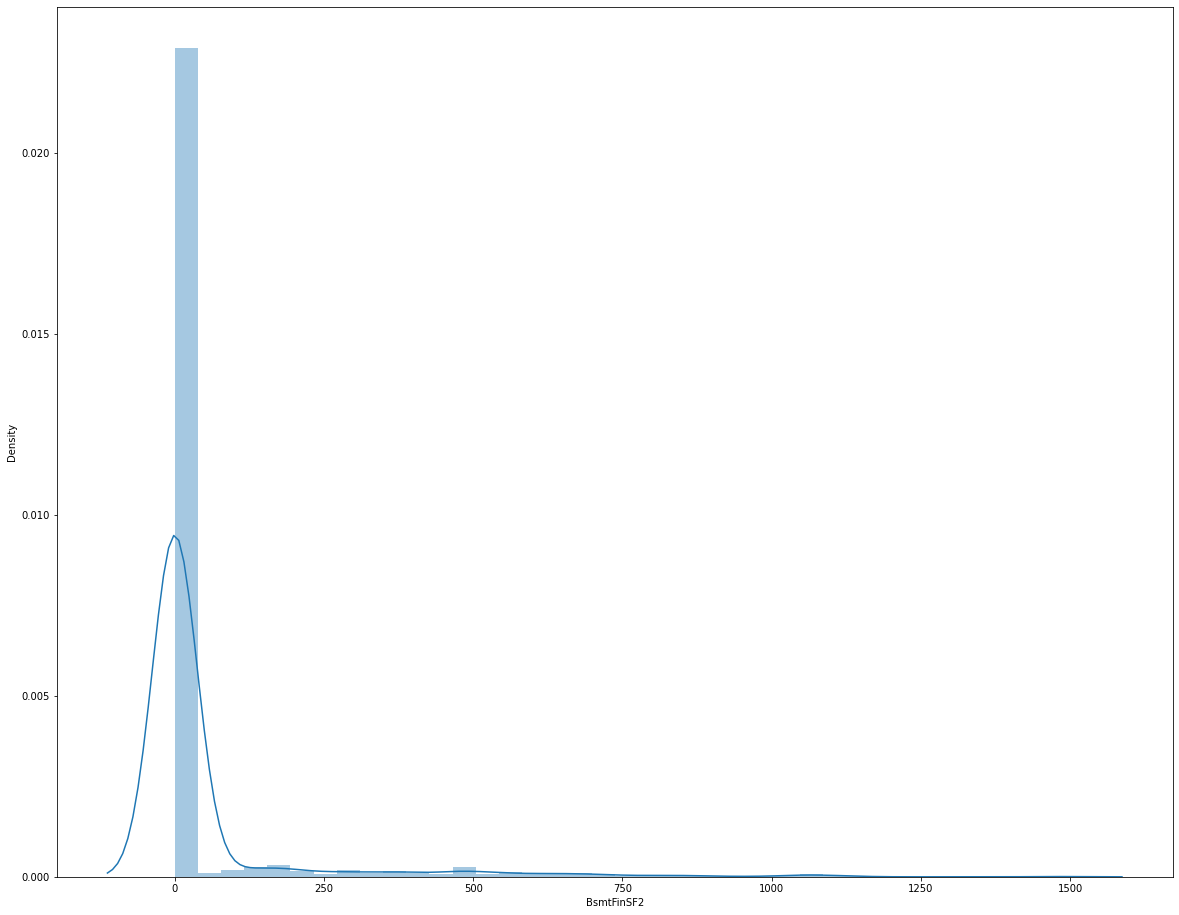

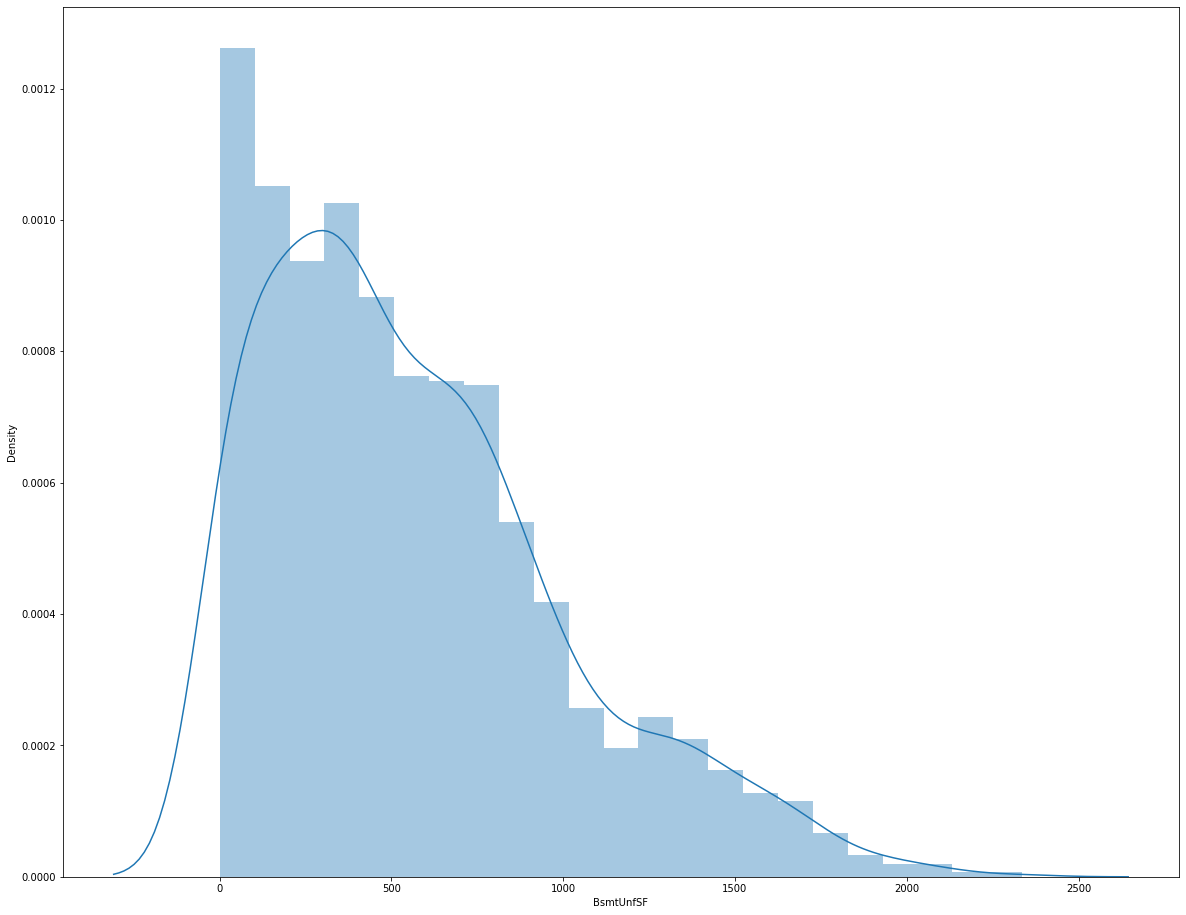

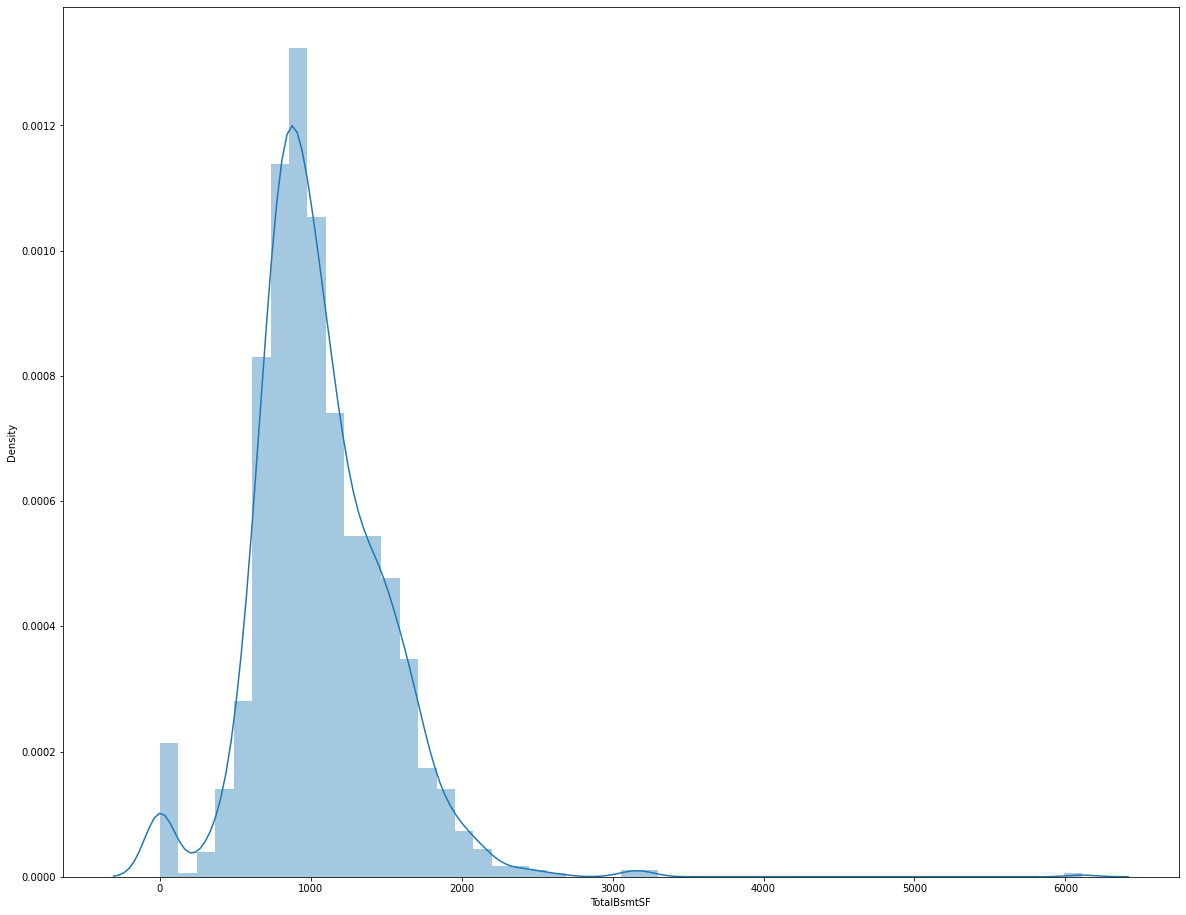

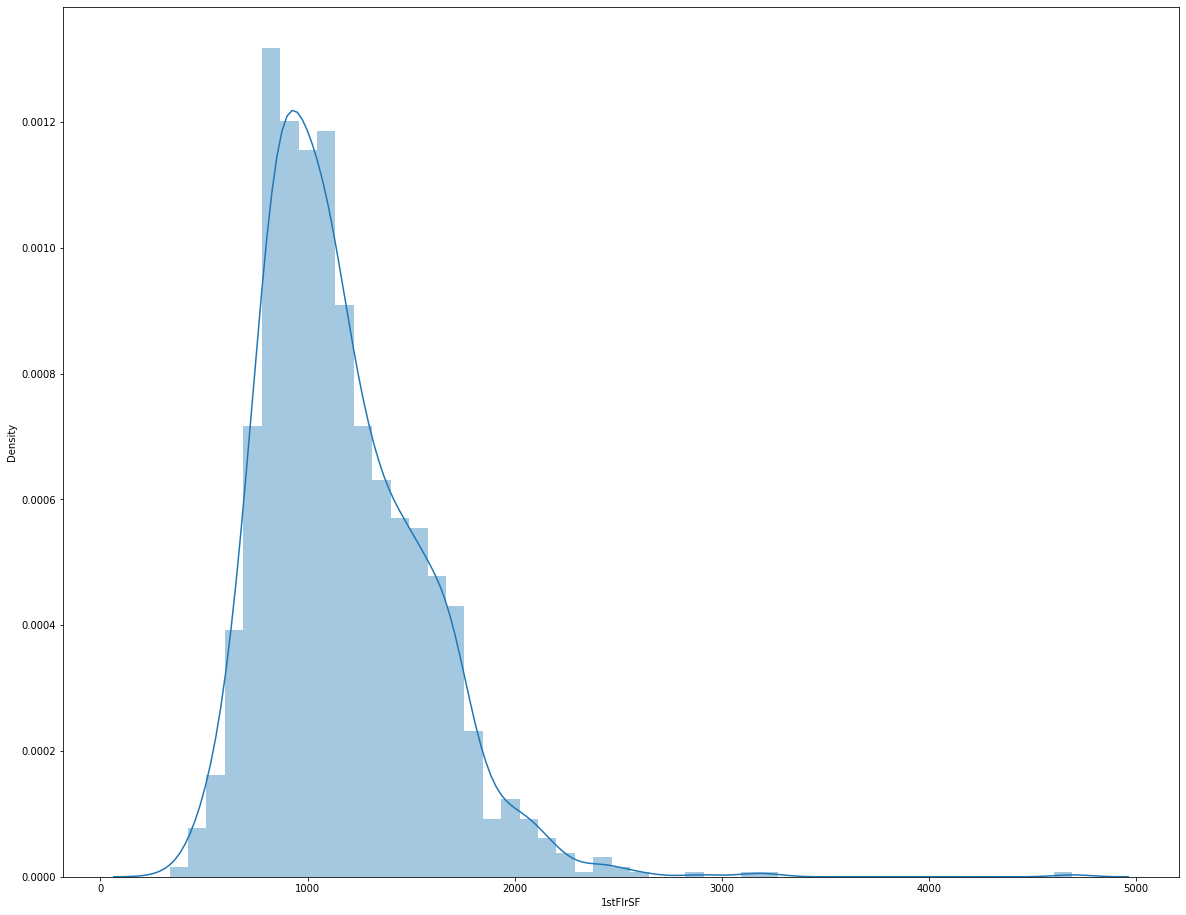

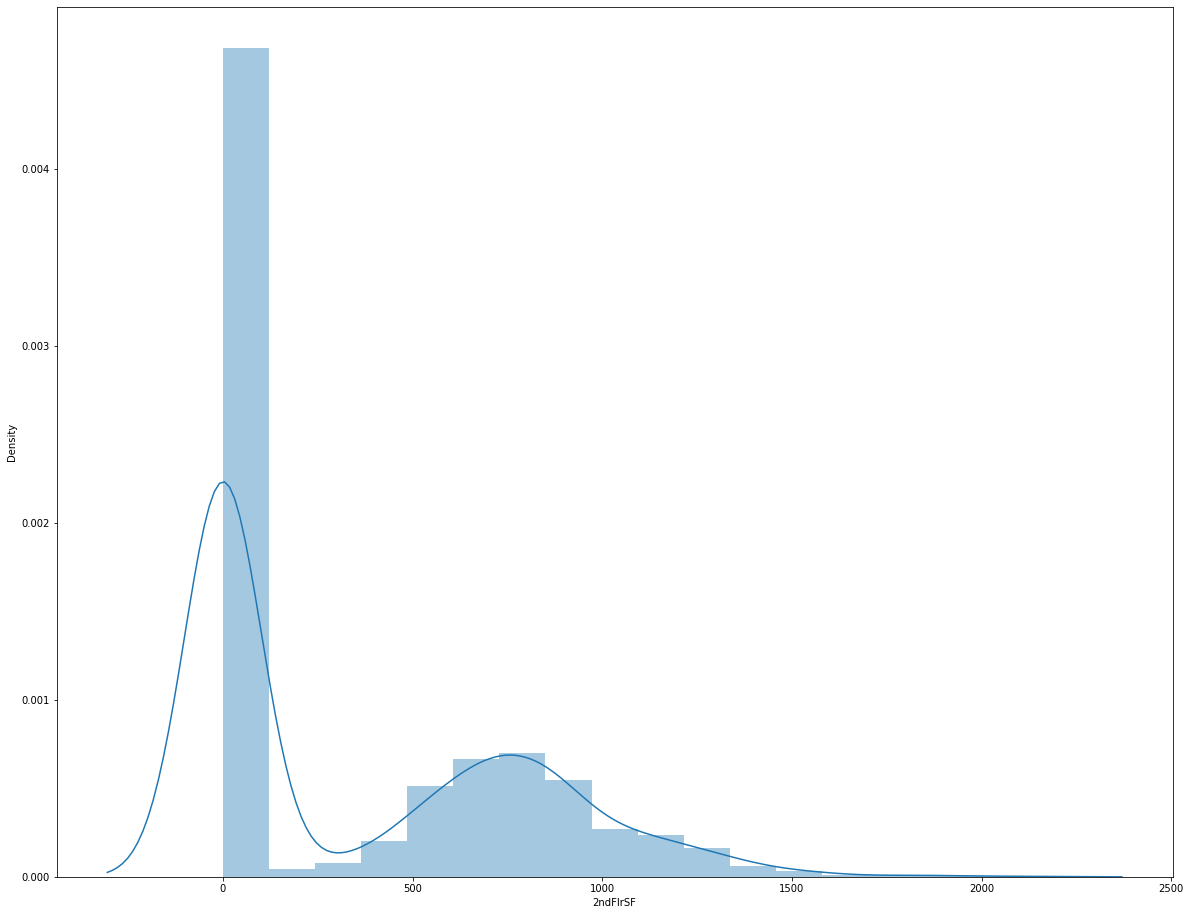

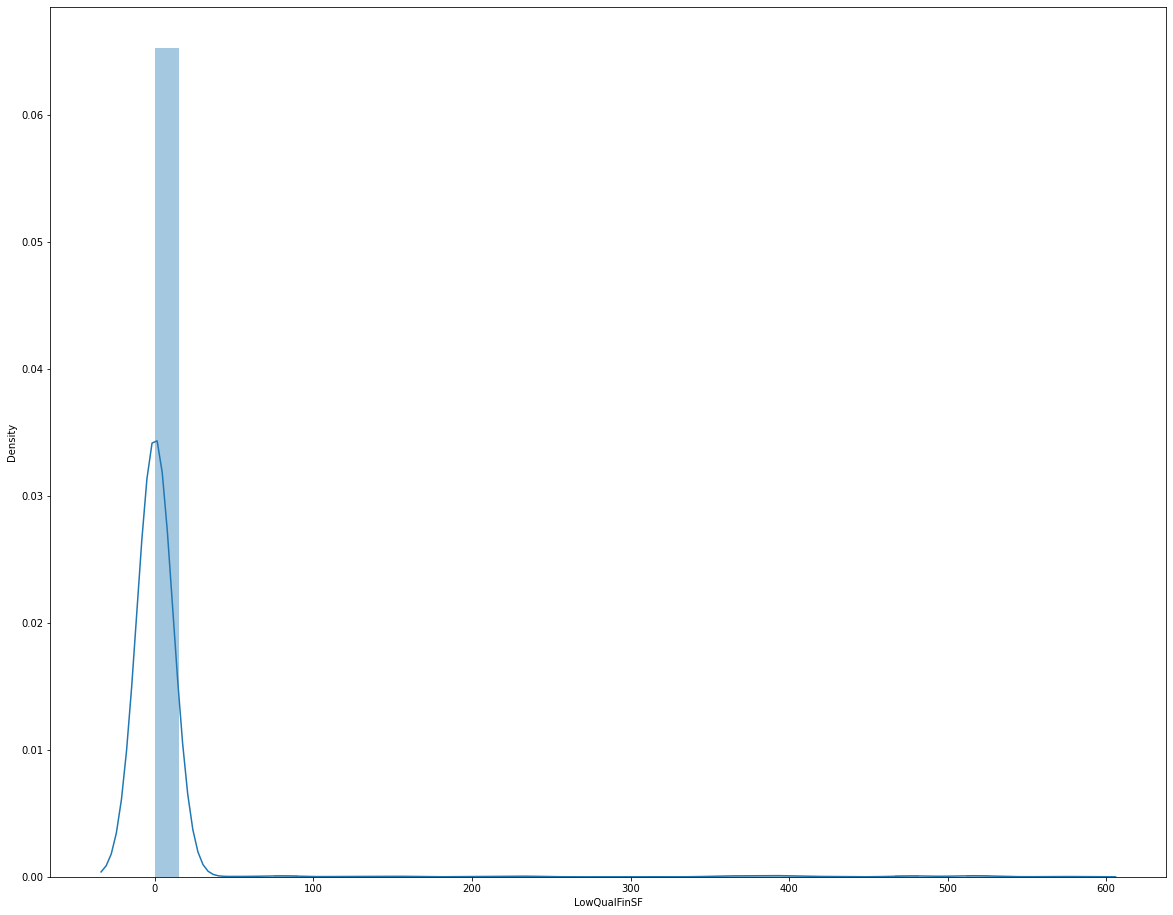

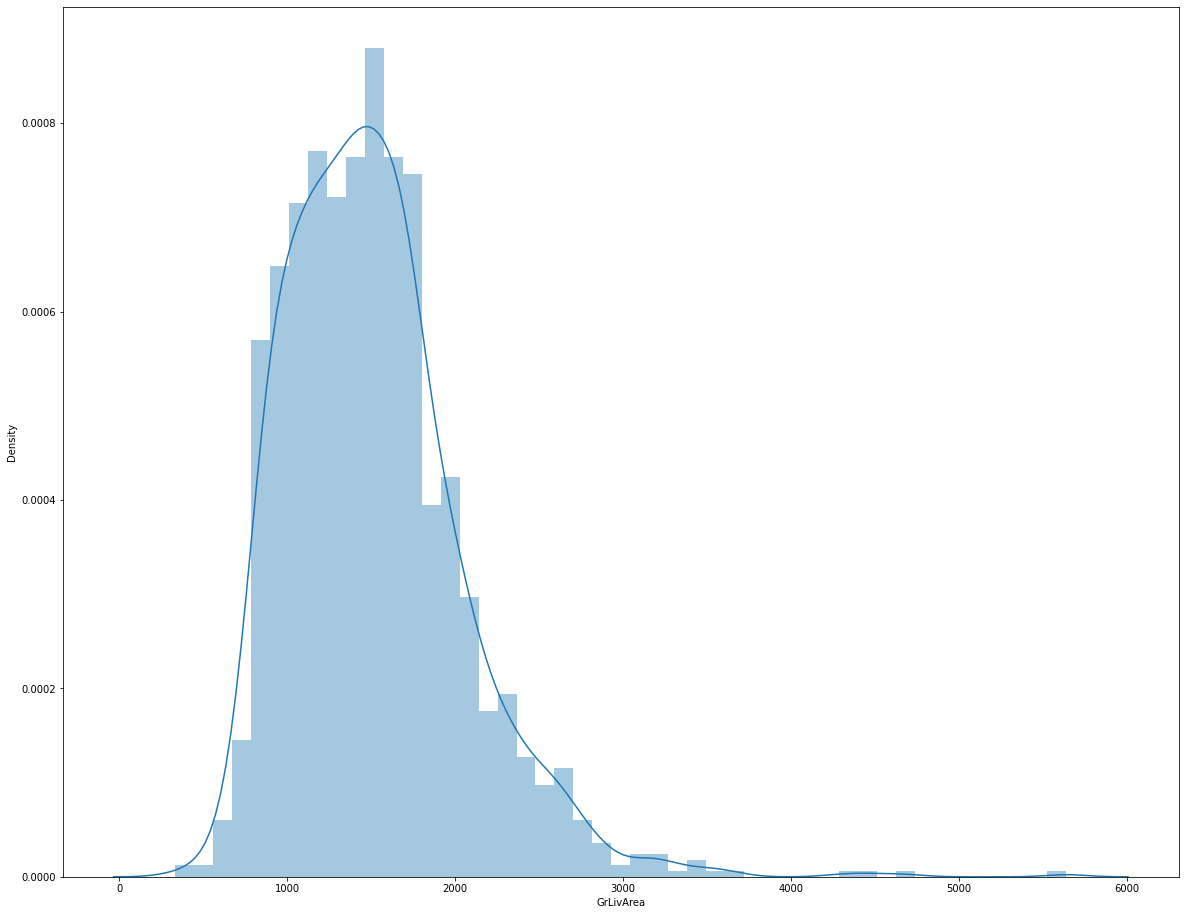

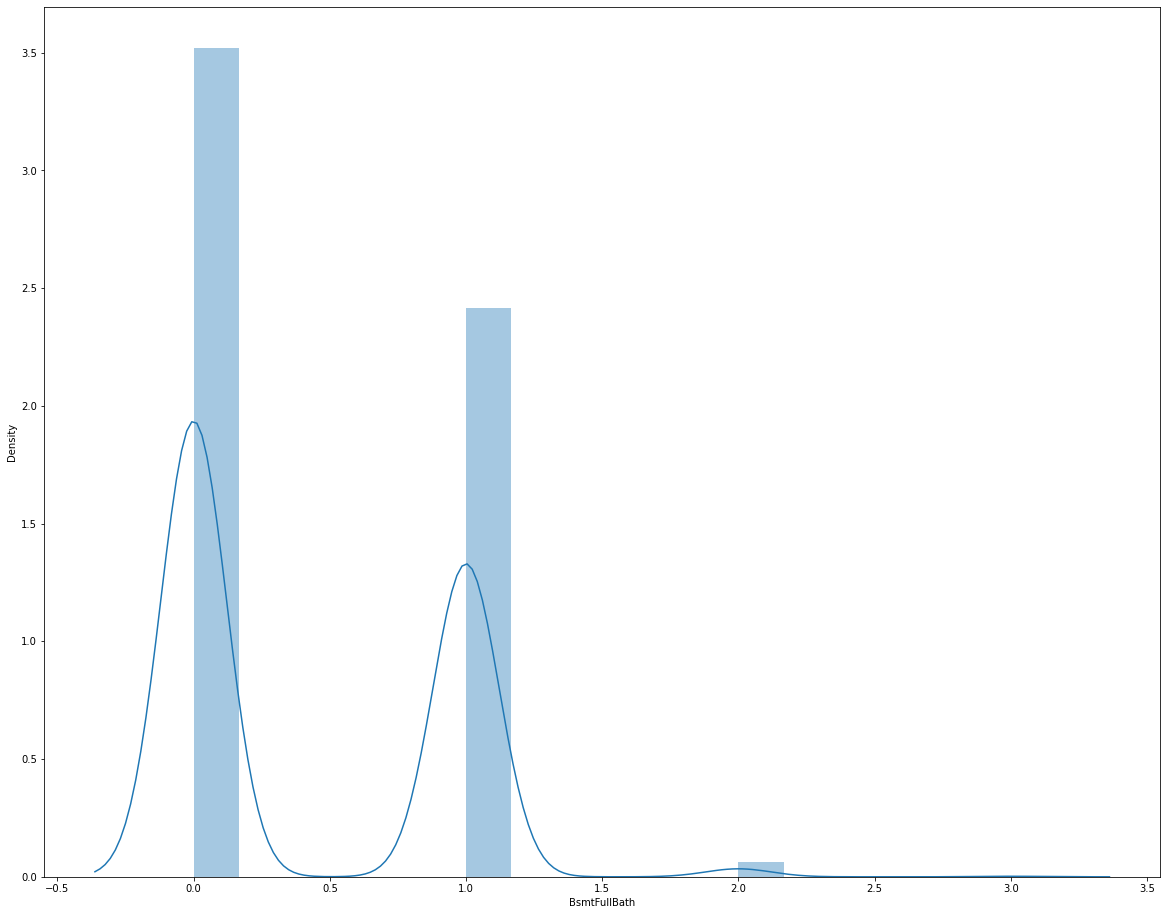

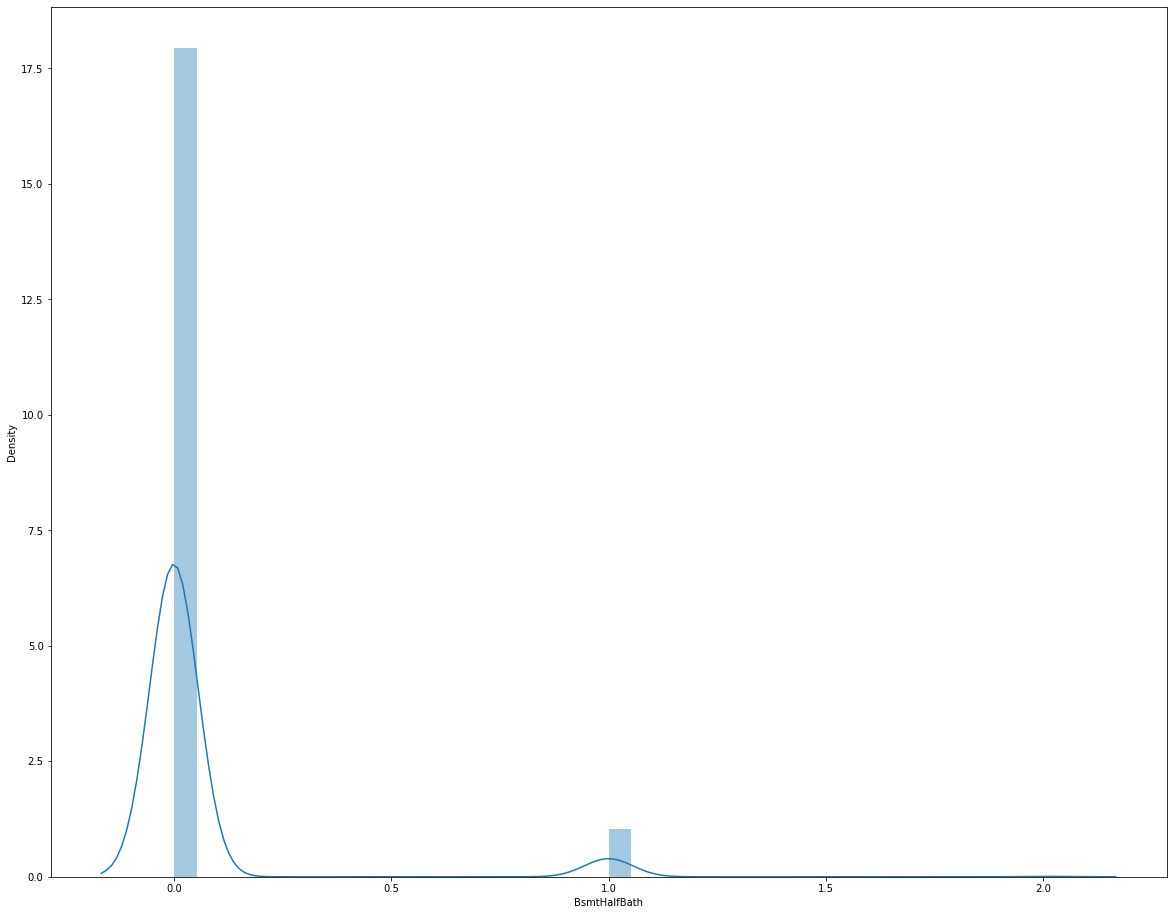

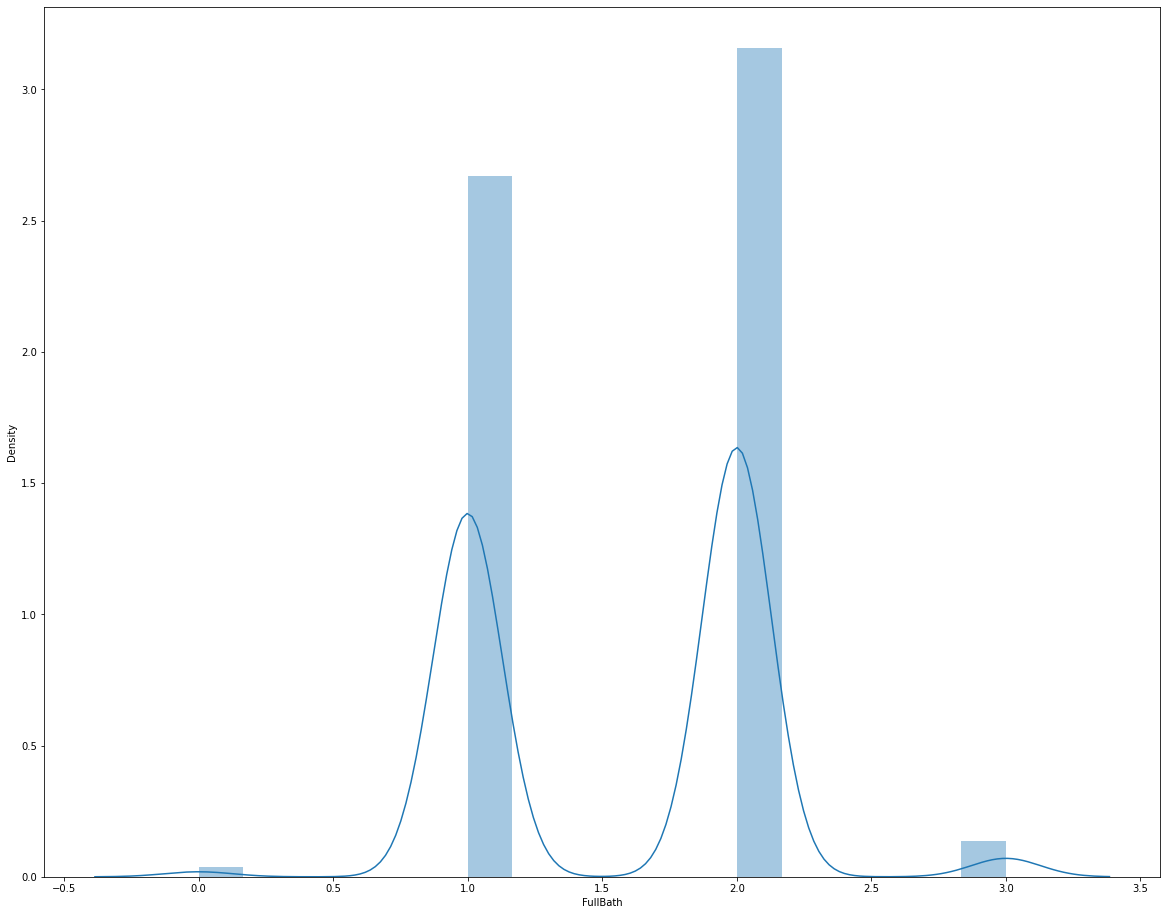

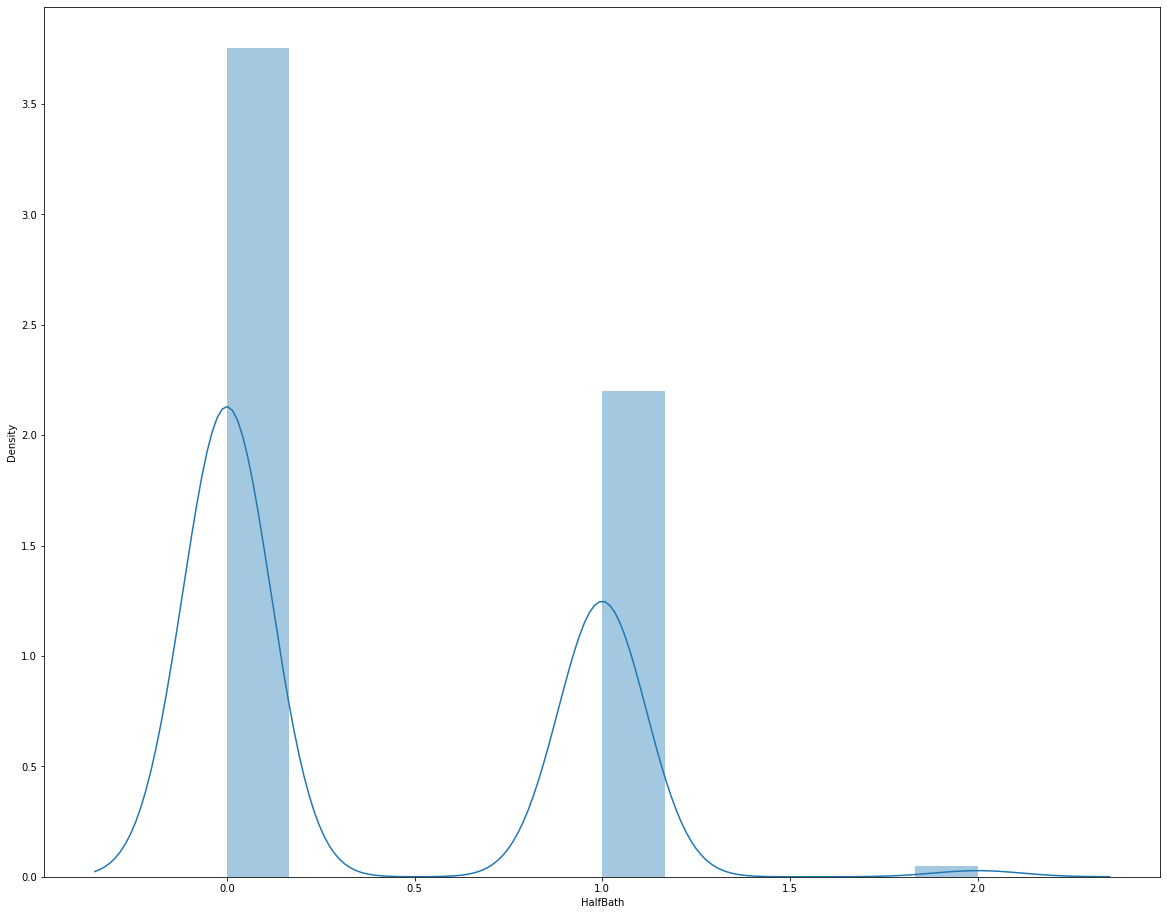

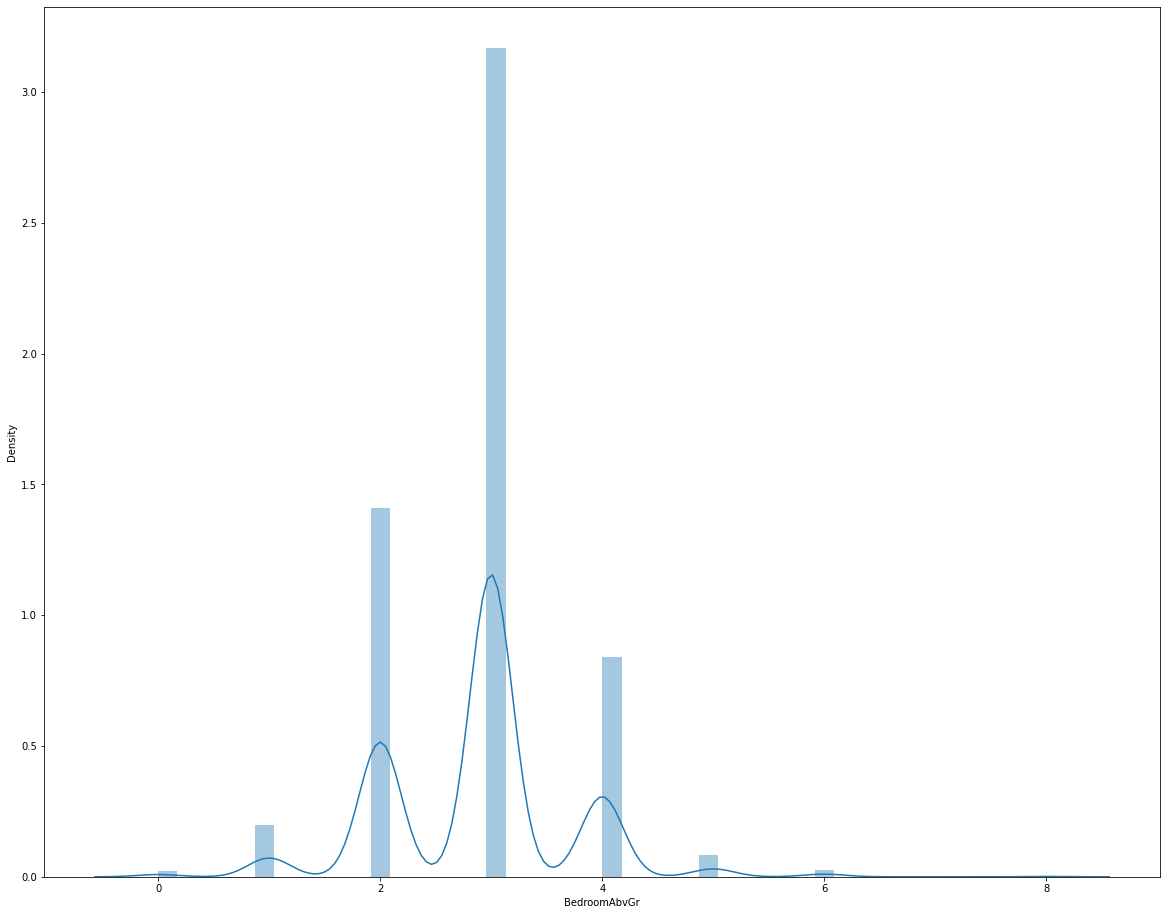

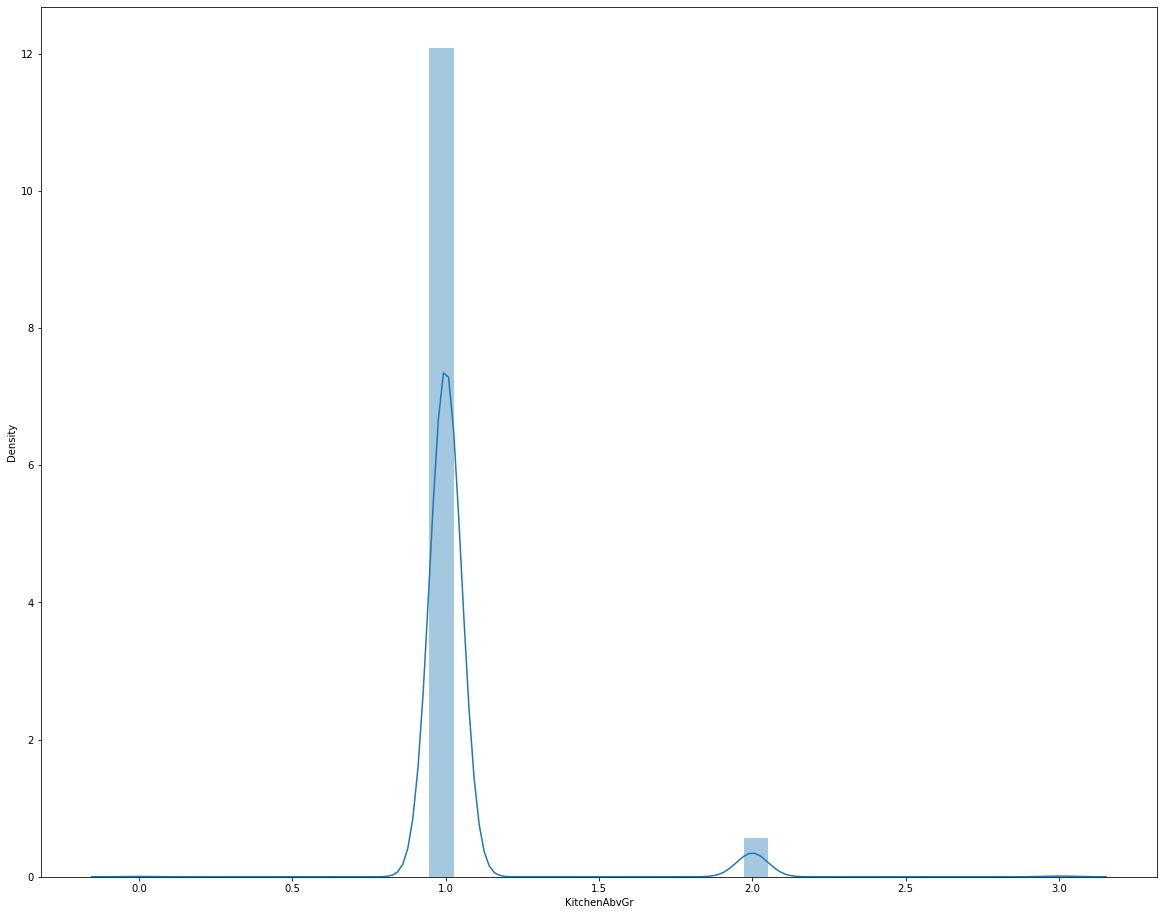

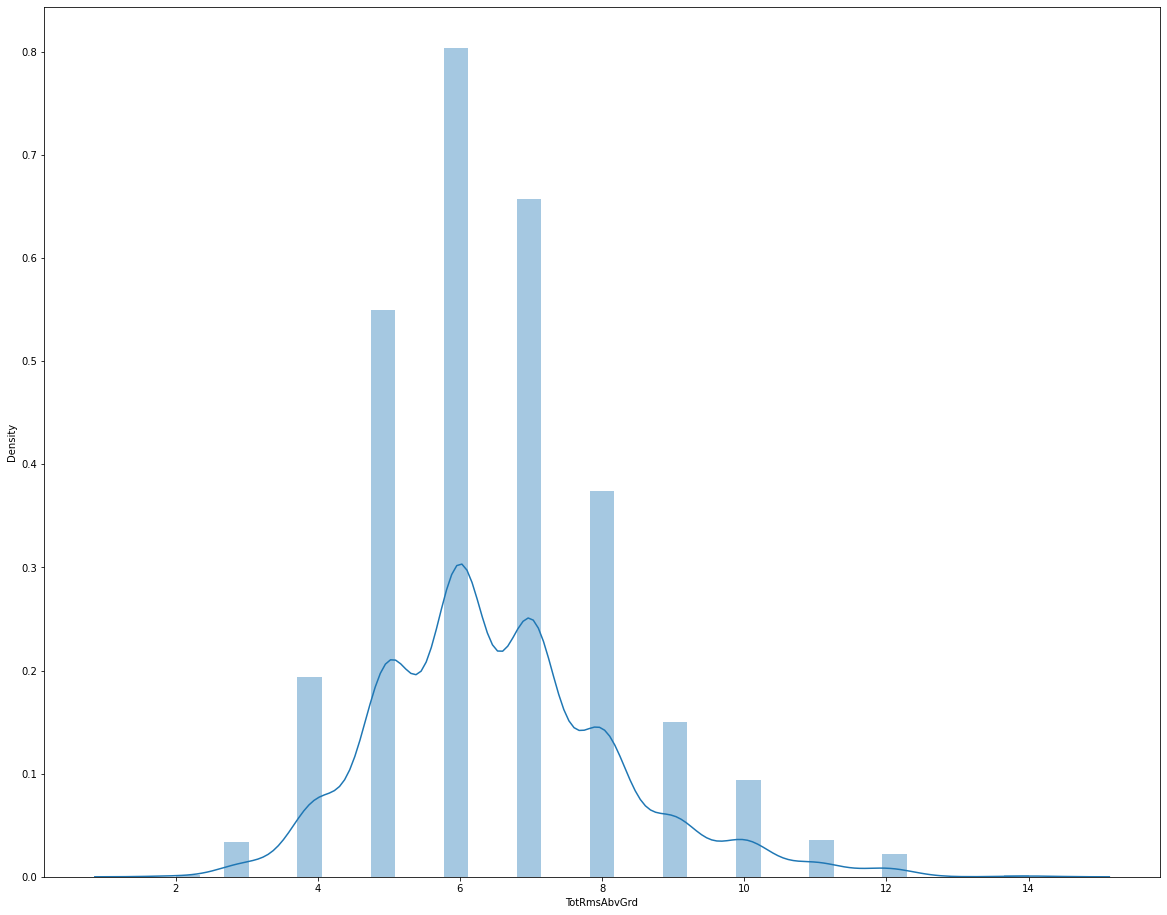

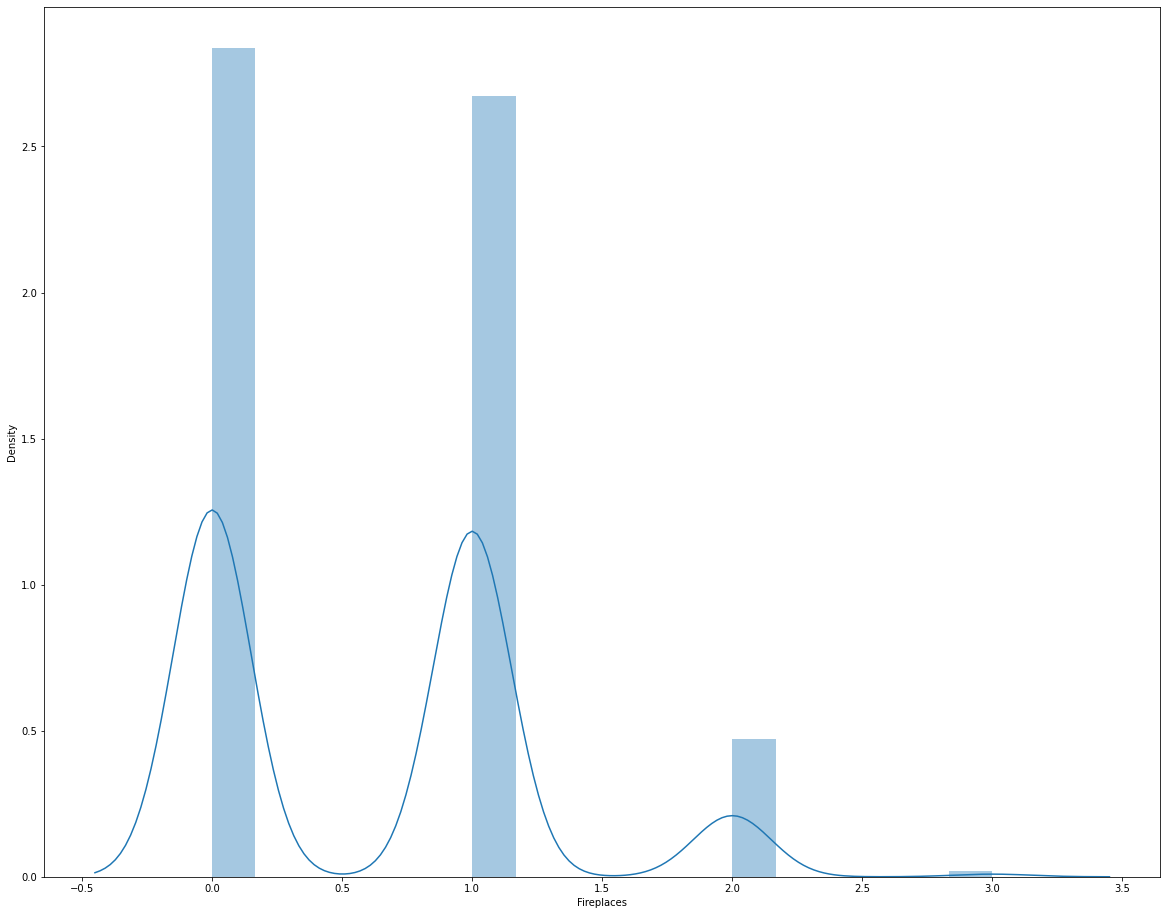

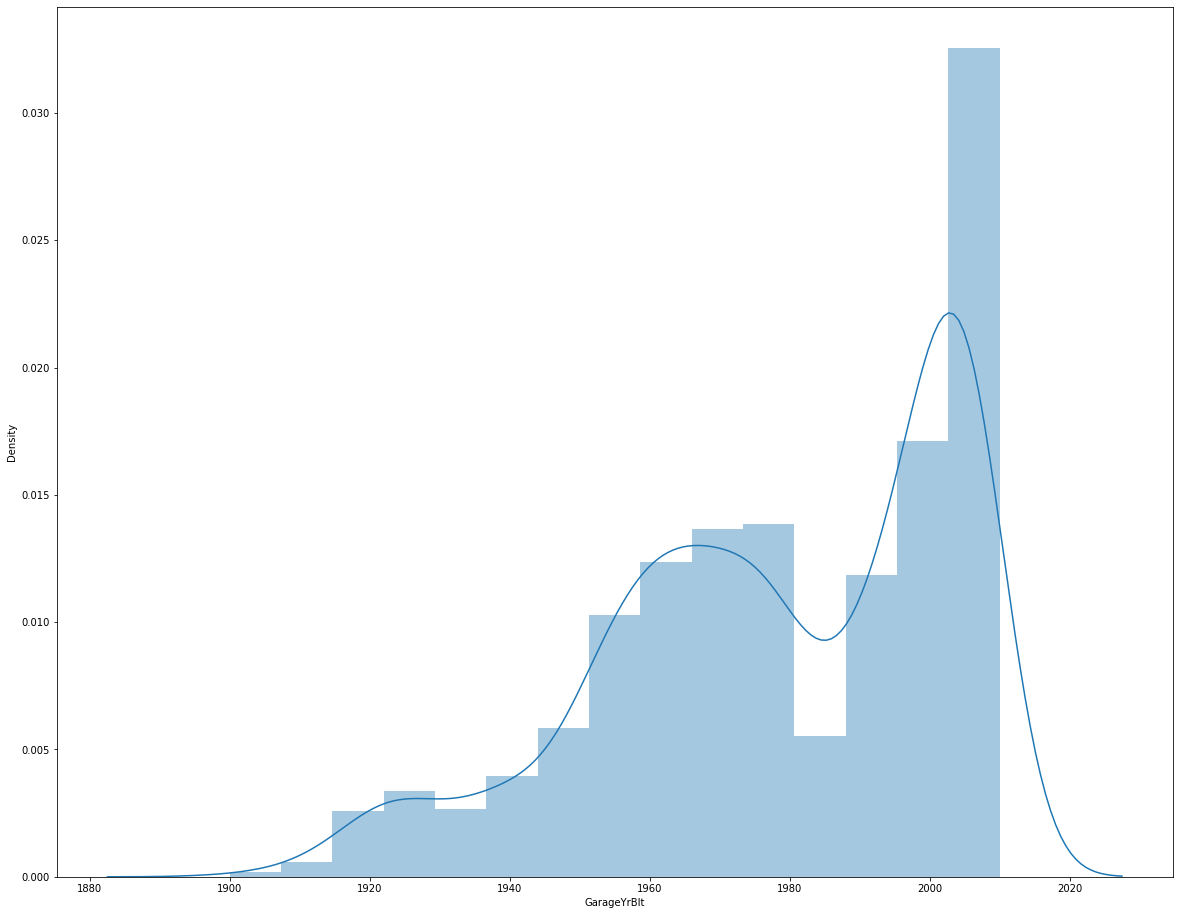

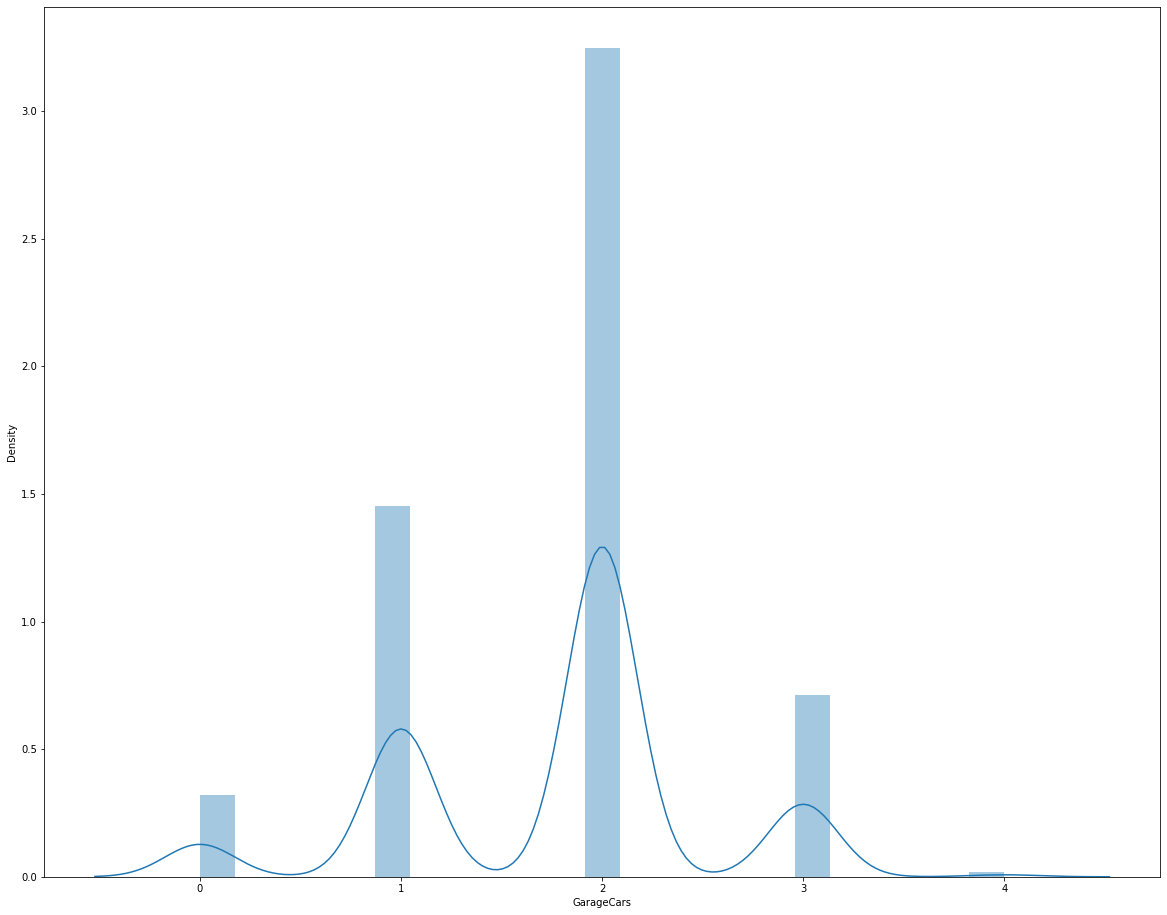

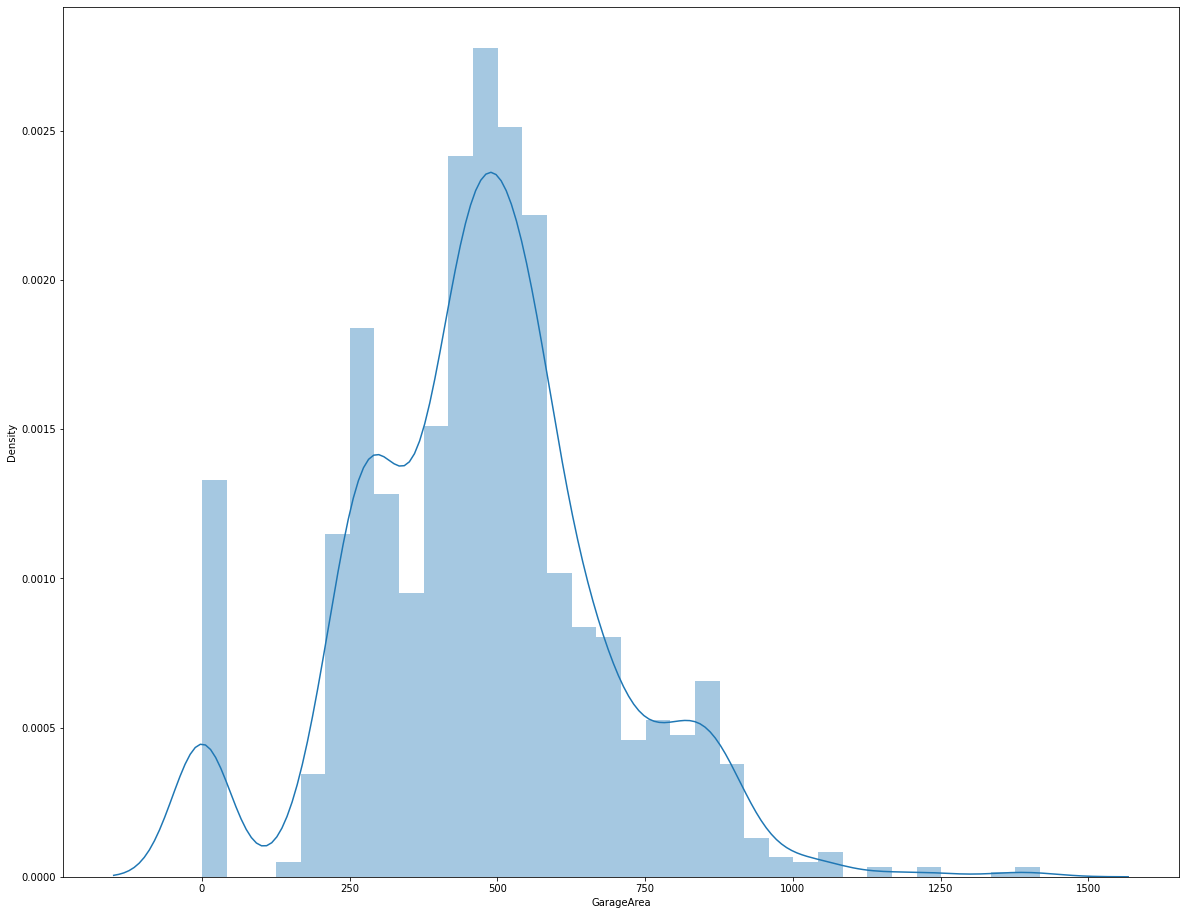

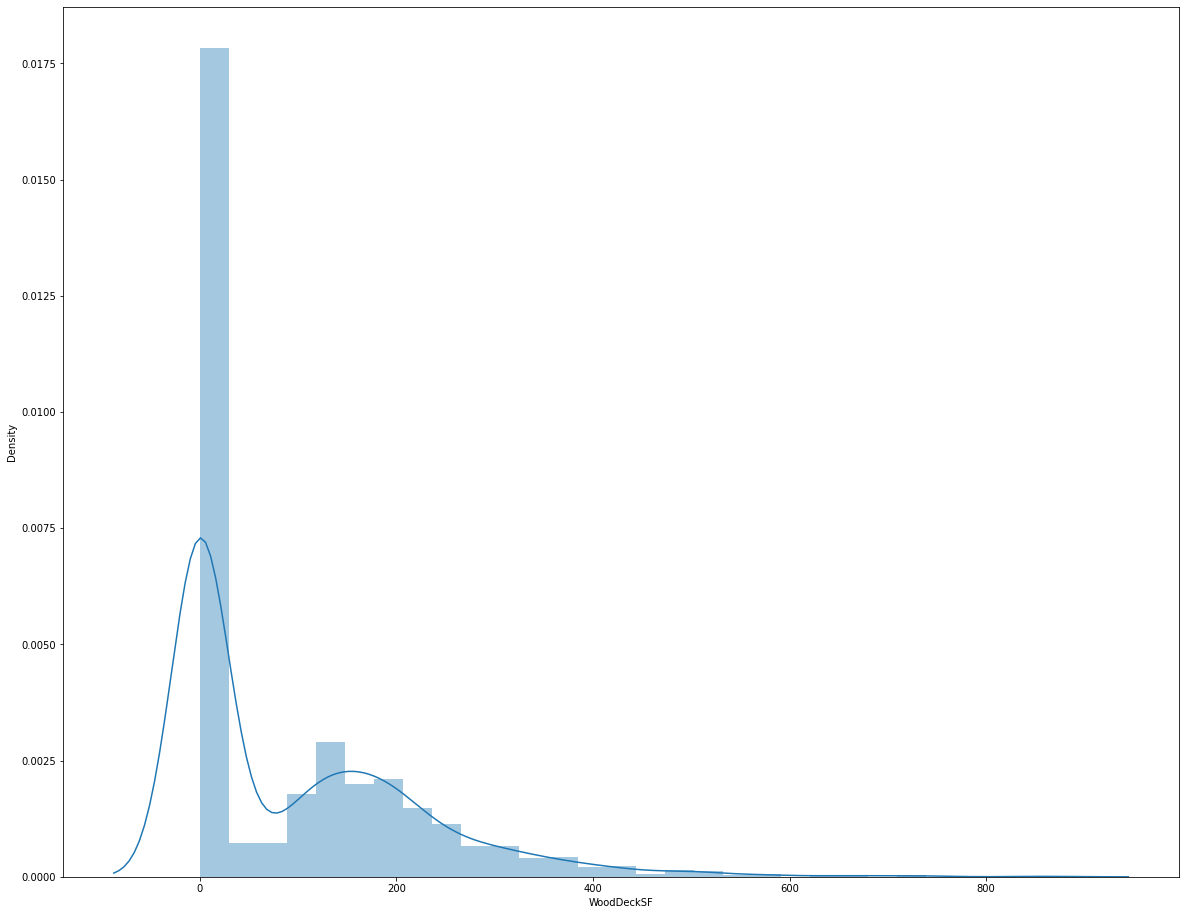

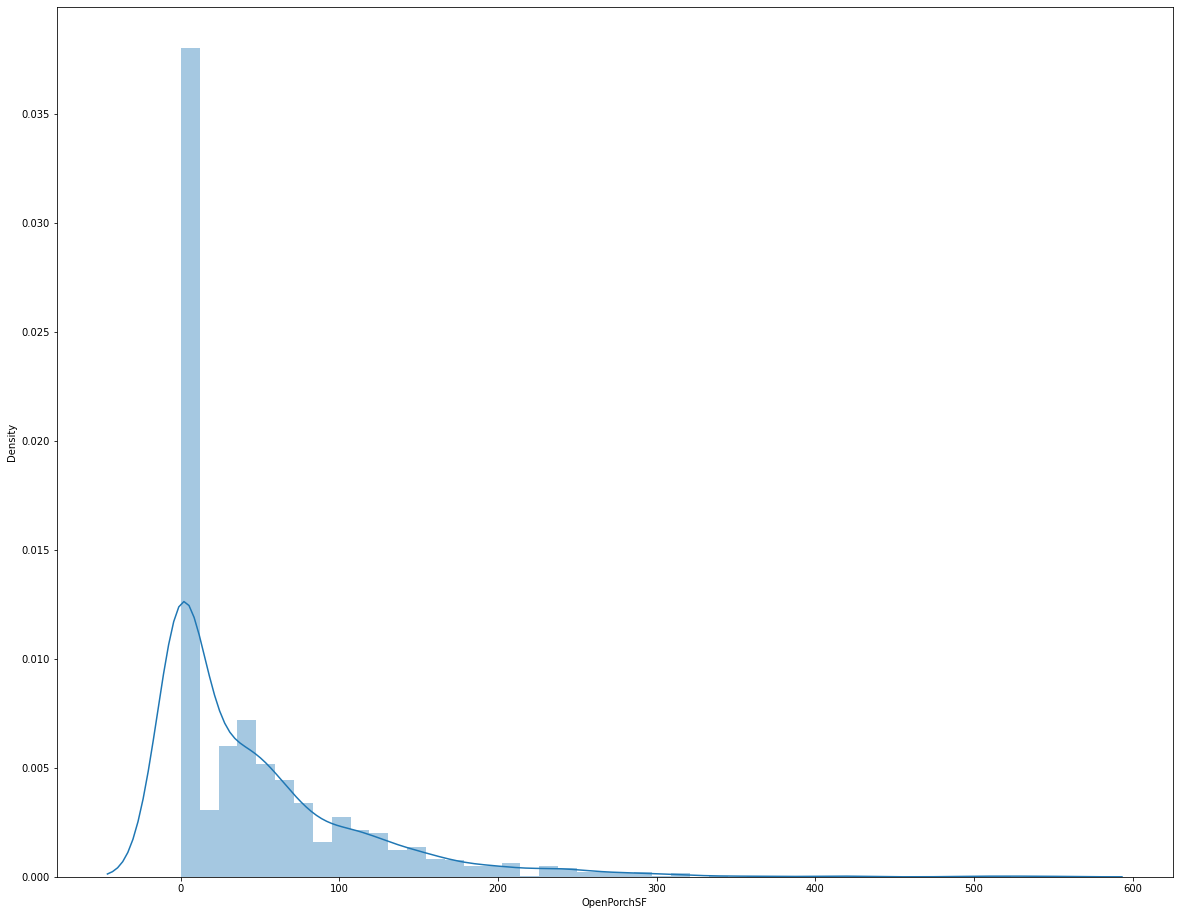

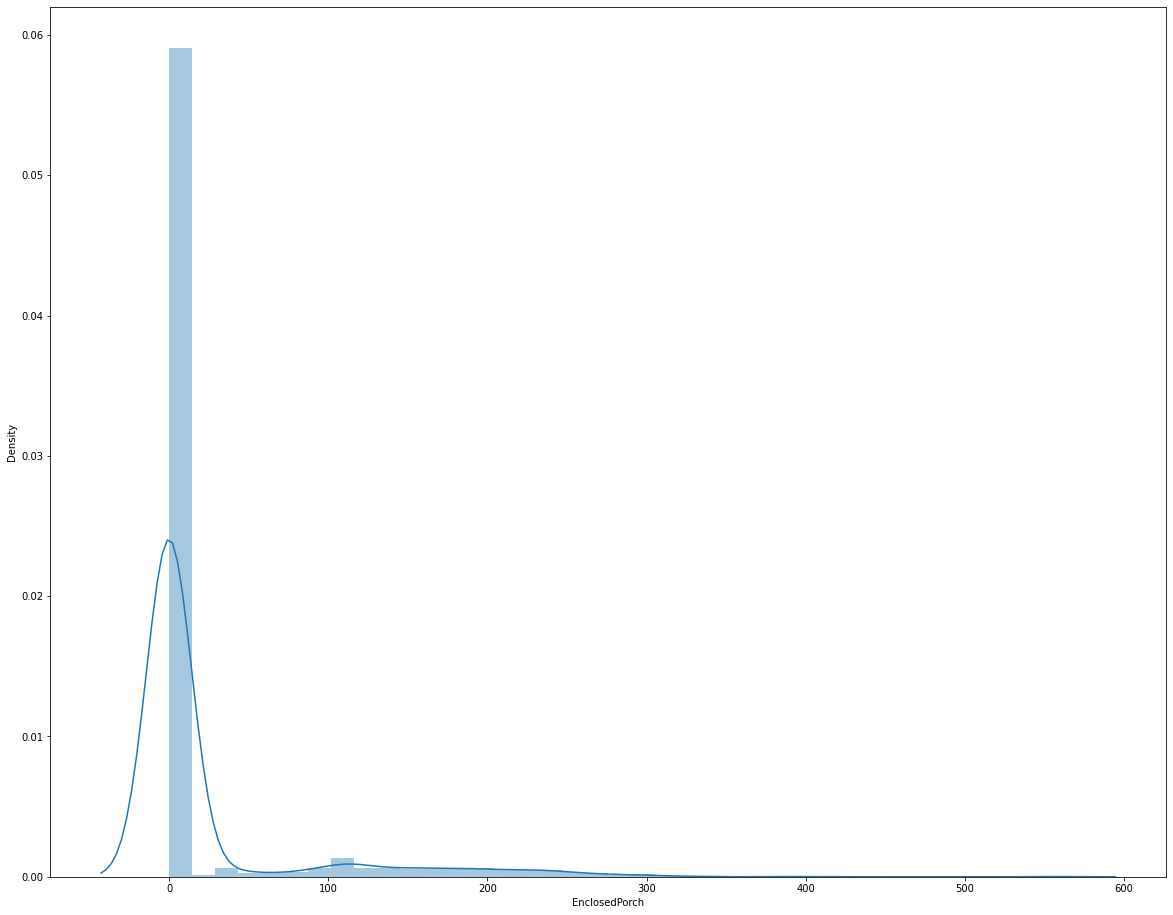

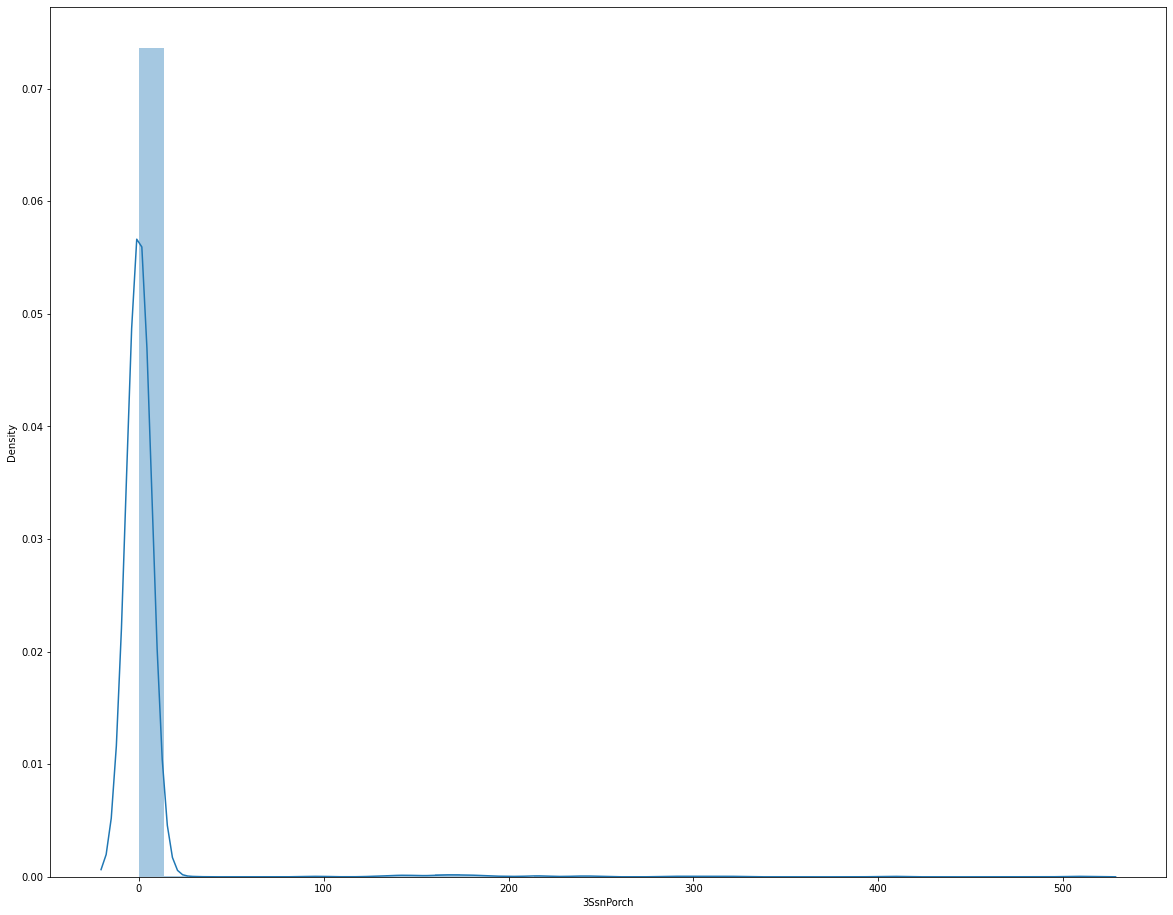

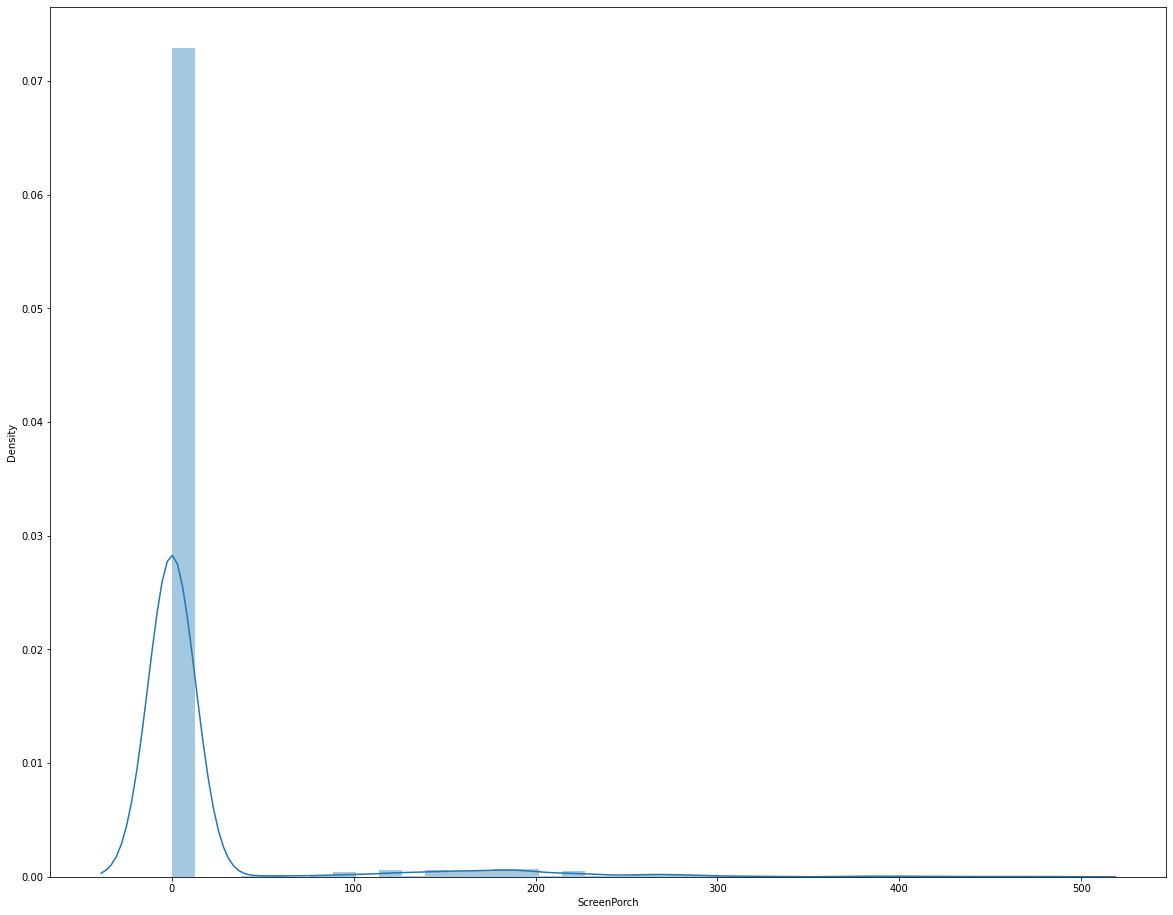

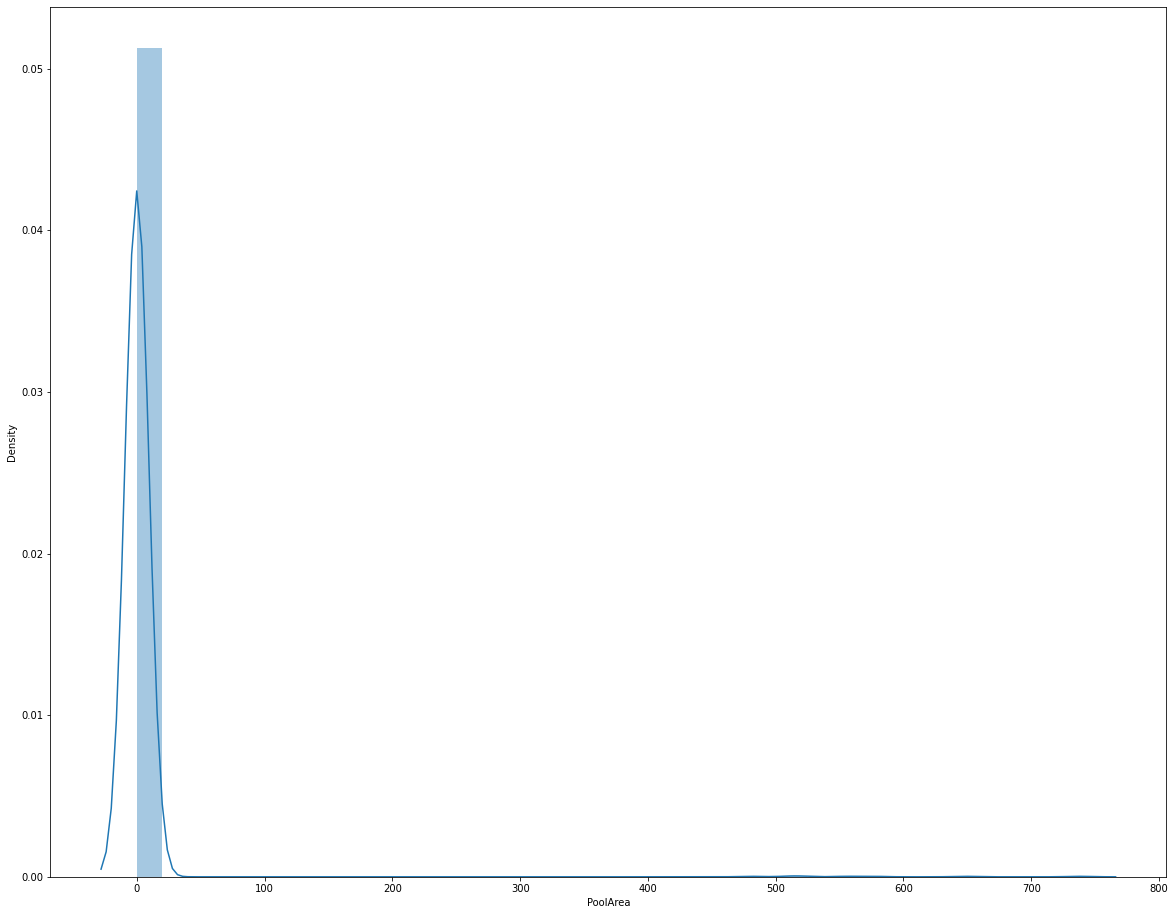

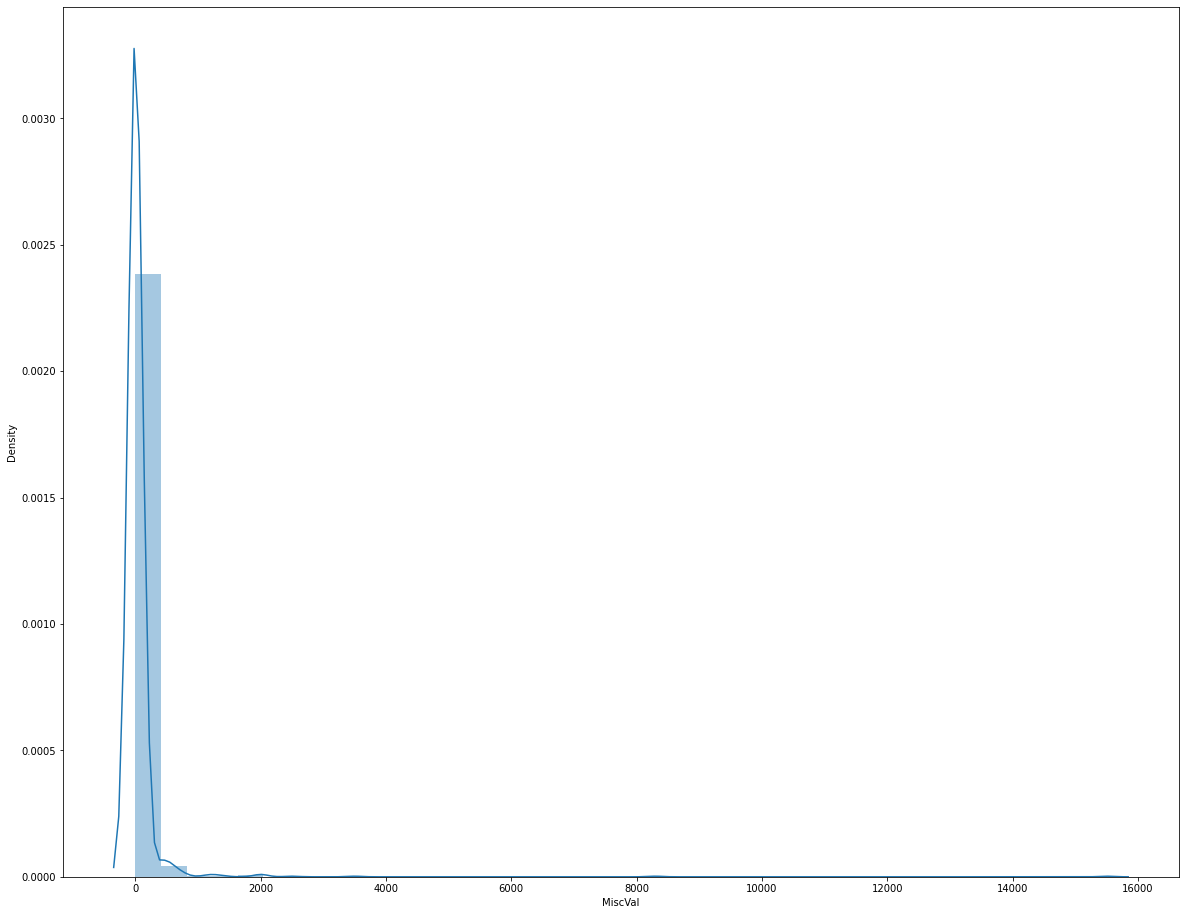

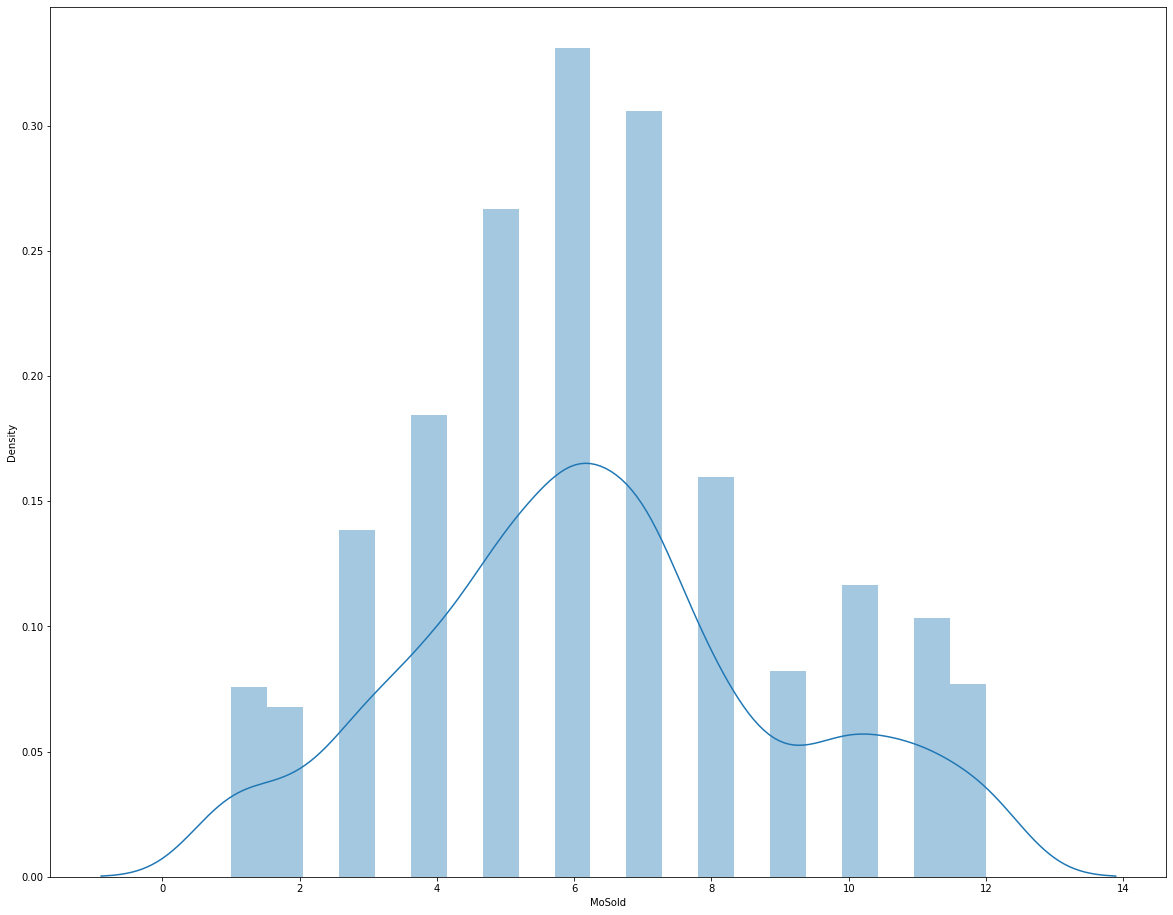

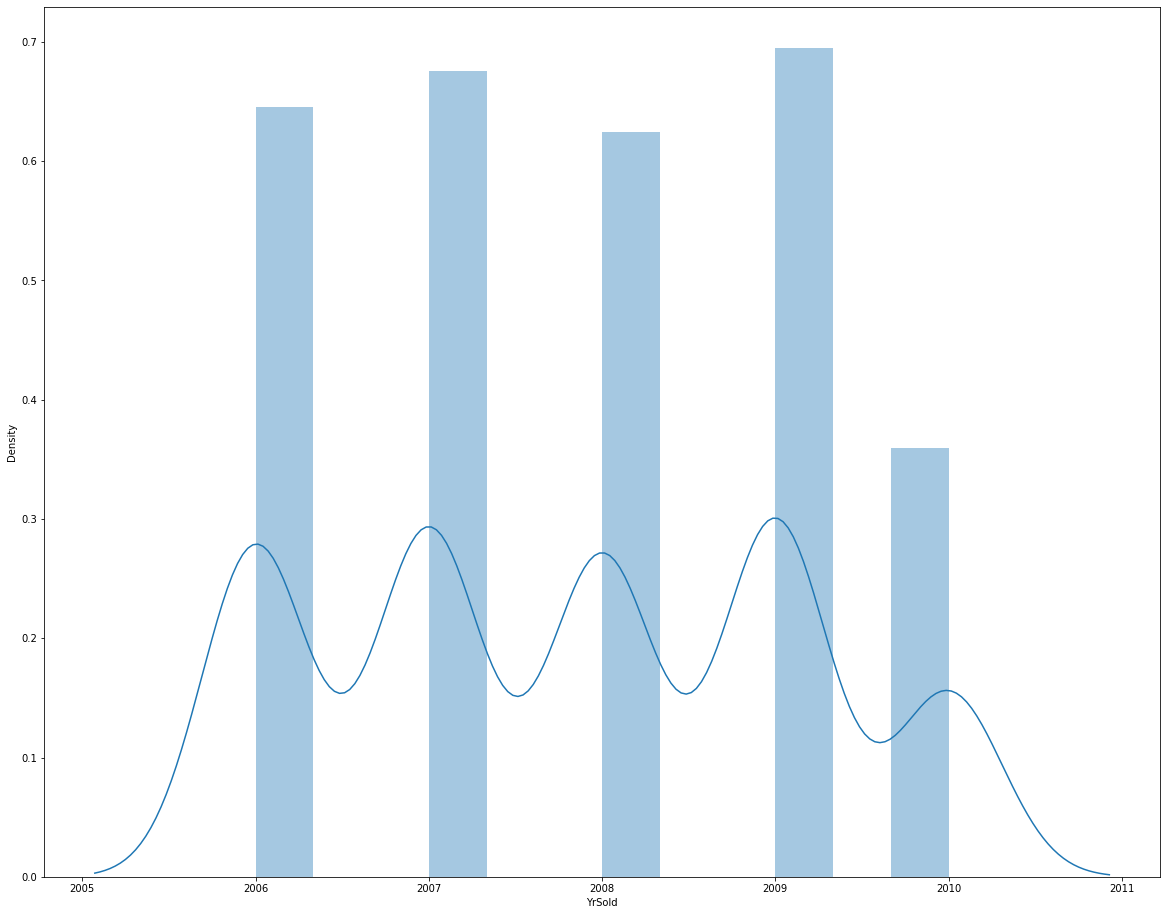

In [ ]:
for col in numerical_cols:
    # Plot the distribution
    plt.figure(figsize= [20.0, 16.0])
    sns.distplot(df_list[0][col])

Una primera observación para aclarar las variables a tratar en una segunda análisis, la bivariante.

Notamos que existe variables numéricas discretas, como por ejemplo:
- `YrSold` 
- `YrBuilt` 
- `MoSold`
- `GarageCars`
- `GarageYrBlt`
- `Fireplaces`
- `TotRmsAbvGrd`
- `Kitchen`
- `Bedroom`
- `HalfBath`
...

### Análisis bivariante - variables continuas

In [ ]:
df_list[0].columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [ ]:
# Se analizan SalesType y SaleCondition
df_list[0][['SaleType','SaleCondition']].sample(5, random_state=seed)

,SaleType,SaleCondition
703,WD,Normal
1361,WD,Normal
937,WD,Normal
1330,WD,Normal
113,COD,Abnorml


In [ ]:
# Analizamos el tipo de venta
df_list[0]['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [ ]:
# Analizamos la condición de venta
df_list[0]['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Respecto a las dos variables asociadas a `SalePrice`, es interesante observar que valores de venta (media, mediana, 25% y 75%) están asociados por tipología teniendo en cuenta el Tipo y Condición:

```
SaleType: Type of sale

       WD     Warranty Deed - Conventional
       CWD    Warranty Deed - Cash
       VWD    Warranty Deed - VA Loan
       New    Home just constructed and sold
       COD    Court Officer Deed/Estate
       Con    Contract 15% Down payment regular terms
       ConLw    Contract Low Down payment and low interest
       ConLI    Contract Low Interest
       ConLD    Contract Low Down
       Oth    Other

SaleCondition: Condition of sale

       Normal    Normal Sale
       Abnorml    Abnormal Sale -  trade, foreclosure, short sale
       AdjLand    Adjoining Land Purchase
       Alloca    Allocation - two linked properties with separate deeds, typically condo with a garage unit    
       Family    Sale between family members
       Partial    Home was not completed when last assessed (associated with New Homes)       
```


In [ ]:
# Agrupamos por Tipo de venta y extreamos los descriptivos básico
df_list[0].groupby('SaleType')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
SaleType,,,,,,,
COD,60000.0,112000.00,139000.0,160500.00,287000.0,143973.255814,43.0
CWD,136000.0,152500.00,188750.0,246850.00,328900.0,210600.000000,4.0
Con,215200.0,242400.00,269600.0,296800.00,324000.0,269600.000000,2.0
ConLD,79900.0,85000.00,140000.0,160000.00,235128.0,138780.888889,9.0
ConLI,110000.0,115000.00,125000.0,200000.00,451950.0,200390.000000,5.0
ConLw,60000.0,95000.00,144000.0,207500.00,212000.0,143700.000000,5.0
New,113000.0,194050.25,247453.0,341919.75,611657.0,274945.418033,122.0
Oth,93500.0,104775.00,116050.0,133025.00,150000.0,119850.000000,3.0
WD,34900.0,128925.00,158000.0,202950.00,755000.0,173401.836622,1267.0


In [ ]:
# Agrupamos por Condición de venta y extreamos los descriptivos básico
df_list[0].groupby('SaleCondition')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
SaleCondition,,,,,,,
Abnorml,34900.0,104000.00,130000.0,172500.0,745000.0,146526.623762,101.0
AdjLand,81000.0,81750.00,104000.0,126375.0,127500.0,104125.000000,4.0
Alloca,55993.0,116383.25,148145.0,202043.0,359100.0,167377.416667,12.0
Family,82500.0,115500.00,140500.0,170250.0,259000.0,149600.000000,20.0
Normal,39300.0,130000.00,160000.0,205000.0,755000.0,175202.219533,1198.0
Partial,113000.0,193879.00,244600.0,339750.0,611657.0,272291.752000,125.0


Como primera impresión los valores son muy cercanos entre tipologías. Lo único es la volumetría entre tipos, de hecho hay una frecuencia mayor para `WD` y `Normal`, por lo que para estas condiciones, podríamos tener un sesgo a favor.

Podríamos analizar con detalle el resultado de los modelos con o sin demasiado sesgo, para evitar sobreajustar los resultados o al contrario.

In [ ]:
# Agrupamos por Zona y extreamos los descriptivos básico
df_list[0].groupby('MSZoning')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
MSZoning,,,,,,,
C (all),34900.0,43998.25,74700.0,98332.0,133900.0,74528.000000,10.0
FV,144152.0,174000.00,205950.0,250000.0,370878.0,214014.061538,65.0
RH,76000.0,106150.00,136500.0,148608.5,200000.0,131558.375000,16.0
RL,39300.0,137700.00,174000.0,224700.0,755000.0,191004.994787,1151.0
RM,37900.0,100000.00,120500.0,140000.0,475000.0,126316.830275,218.0


In [ ]:
# Agrupamos por Barrios limítrofes y extreamos los descriptivos básico
df_list[0].groupby('Neighborhood')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
Neighborhood,,,,,,,
Blmngtn,159895.0,174000.00,191000.0,213490.00,264561.0,194870.882353,17.0
Blueste,124000.0,130750.00,137500.0,144250.00,151000.0,137500.000000,2.0
BrDale,83000.0,91000.00,106000.0,118000.00,125000.0,104493.750000,16.0
BrkSide,39300.0,100500.00,124300.0,141175.00,223500.0,124834.051724,58.0
ClearCr,130000.0,183750.00,200250.0,242225.00,328000.0,212565.428571,28.0
CollgCr,110000.0,152958.75,197200.0,225725.00,424870.0,197965.773333,150.0
Crawfor,90350.0,159250.00,200624.0,239000.00,392500.0,210624.725490,51.0
Edwards,58500.0,101500.00,121750.0,145225.00,320000.0,128219.700000,100.0
Gilbert,141000.0,174000.00,181000.0,197200.00,377500.0,192854.506329,79.0


Podemos detectar que barrios limitrofes podrían tener más peso e importancia que otros. Sería interesante un estudio de la zona, incluyendo datos socio-económicos, salud, poblacional para detectar diferentes zonas y así, acotar y segmentarlas.

In [ ]:
# Agrupamos por Calidad global y extreamos los descriptivos básico
df_list[0].groupby('OverallQual')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
OverallQual,,,,,,,
1,39300.0,44725.0,50150.0,55575.0,61000.0,50150.000000,2.0
2,35311.0,47655.5,60000.0,60000.0,60000.0,51770.333333,3.0
3,37900.0,75500.0,86250.0,97500.0,139600.0,87473.750000,20.0
4,34900.0,88000.0,108000.0,125500.0,256000.0,108420.655172,116.0
5,55993.0,118000.0,133000.0,147000.0,228950.0,133523.347607,397.0
6,76000.0,139125.0,160000.0,181000.0,277000.0,161603.034759,374.0
7,82500.0,179470.0,200141.0,230750.0,383970.0,207716.423197,319.0
8,122000.0,234557.5,269750.0,306250.0,538000.0,274735.535714,168.0
9,239000.0,318980.5,345000.0,389716.0,611657.0,367513.023256,43.0


In [ ]:
# Agrupamos por Condición global y extreamos los descriptivos básico
df_list[0].groupby('OverallCond')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
OverallCond,,,,,,,
1,61000.0,61000.0,61000.0,61000.0,61000.0,61000.000000,1.0
2,67000.0,76500.0,85000.0,87000.0,394432.0,141986.400000,5.0
3,35311.0,76000.0,89500.0,135000.0,200624.0,101929.400000,25.0
4,40000.0,92900.0,115000.0,143000.0,235000.0,120438.438596,57.0
5,34900.0,144000.0,185000.0,239686.0,745000.0,203146.914738,821.0
6,37900.0,124375.0,142750.0,171875.0,755000.0,153961.591270,252.0
7,79900.0,123500.0,145000.0,178000.0,402000.0,158145.487805,205.0
8,84500.0,125375.0,142500.0,170750.0,335000.0,155651.736111,72.0
9,110500.0,143500.0,176200.0,287875.0,475000.0,216004.545455,22.0


In [ ]:
# Agrupamos por ExterQua y extreamos los descriptivos básico
df_list[0].groupby('ExterQual')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
ExterQual,,,,,,,
Ex,160000.0,311404.0,364606.5,428788.50,755000.0,367360.961538,52.0
Fa,39300.0,60250.0,82250.0,102000.00,200000.0,87985.214286,14.0
Gd,52000.0,185000.0,220000.0,265984.25,745000.0,231633.510246,488.0
TA,34900.0,118589.5,139450.0,165500.00,381000.0,144341.313466,906.0


In [ ]:
# Agrupamos por ExterCond y extreamos los descriptivos básico
df_list[0].groupby('ExterCond')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
ExterCond,,,,,,,
Ex,118000.0,139500.0,161000.0,243000.00,325000.0,201333.333333,3.0
Fa,39300.0,65500.0,95750.0,137750.00,169500.0,102595.142857,28.0
Gd,68400.0,128625.0,151250.0,187375.00,625000.0,168897.568493,146.0
Po,76500.0,76500.0,76500.0,76500.00,76500.0,76500.000000,1.0
TA,34900.0,131100.0,167370.0,217334.25,755000.0,184034.896256,1282.0


Como era de esperar, a mayor calidad y mejores condiciones, los precios son más altos, aunque menos frecuentes. 

La mediana está situada en condiciones entorno a 4/5/6 teniendo en cuenta que la frecuencia menores, con características que podrían afectar a los valores más bajos, podríamos tener este sesgo añadido para poder realizar una mejor predicción.

### Análisis multivariante

In [ ]:
df_list[1]['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [ ]:
# Aplicamos un ajuste a los valores SaleType en tres tipos W, C, other
df_list[0]['SaleType_cat'] = df_list[0]['SaleType']
df_list[0]['SaleType_cat'].replace(['WD', 'CWD', 'VWD' ], 'W', inplace=True)
df_list[0]['SaleType_cat'].replace(['ConLD', 'ConLI', 'ConLw', 'Con'], "C", inplace=True)
df_list[0]['SaleType_cat'].replace(['New', 'COD', 'Oth'], 'other', inplace=True)

In [ ]:
df_list[1]['SaleType_cat'] = df_list[1]['SaleType']
df_list[1]['SaleType_cat'].replace(['WD', 'CWD', 'VWD' ], 'W', inplace=True)
df_list[1]['SaleType_cat'].replace(['ConLD', 'ConLI', 'ConLw', 'Con'], "C", inplace=True)
df_list[1]['SaleType_cat'].replace(['New', 'COD', 'Oth'], 'other', inplace=True)

In [ ]:
# Agrupamos por tipo de inmueble y extreamos los descriptivos básico
df_list[0].groupby('MSSubClass')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']]

,min,25%,50%,75%,max,mean,count
MSSubClass,,,,,,,
20,35311.0,132500.0,159250.0,220000.0,611657.0,185224.811567,536.0
30,34900.0,81000.0,99900.0,110500.0,163500.0,95829.724638,69.0
40,79500.0,119625.0,142500.0,179000.0,260000.0,156125.000000,4.0
45,76000.0,94125.0,107500.0,122250.0,139400.0,108591.666667,12.0
50,37900.0,114125.0,132000.0,159000.0,410000.0,143302.972222,144.0
60,129000.0,185000.0,215200.0,268750.0,755000.0,239948.501672,299.0
70,40000.0,128000.0,156000.0,189500.0,359100.0,166772.416667,60.0
75,101000.0,125625.0,163500.0,219625.0,475000.0,192437.500000,16.0
80,107000.0,147250.0,166500.0,179425.0,345000.0,169736.551724,58.0


Se podría realizar un estudio detallado y poder agrupar, a primera impresión los valores son muy cercanos , en particular se podría realizar una agrupación por valores medios.

```
MSSubClass: Identifies the type of dwelling involved in the sale.    

        20    1-STORY 1946 & NEWER ALL STYLES
        30    1-STORY 1945 & OLDER
        40    1-STORY W/FINISHED ATTIC ALL AGES
        45    1-1/2 STORY - UNFINISHED ALL AGES
        50    1-1/2 STORY FINISHED ALL AGES
        60    2-STORY 1946 & NEWER
        70    2-STORY 1945 & OLDER
        75    2-1/2 STORY ALL AGES
        80    SPLIT OR MULTI-LEVEL
        85    SPLIT FOYER
        90    DUPLEX - ALL STYLES AND AGES
       120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150    1-1/2 STORY PUD - ALL AGES
       160    2-STORY PUD - 1946 & NEWER
       180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190    2 FAMILY CONVERSION - ALL STYLES AND AGES

```

In [ ]:
df_list[0].groupby('MSSubClass')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']].sort_values('mean', ascending=False)

,min,25%,50%,75%,max,mean,count
MSSubClass,,,,,,,
60,129000.0,185000.0,215200.0,268750.0,755000.0,239948.501672,299.0
120,99500.0,158050.0,192000.0,232000.0,392500.0,200779.080460,87.0
75,101000.0,125625.0,163500.0,219625.0,475000.0,192437.500000,16.0
20,35311.0,132500.0,159250.0,220000.0,611657.0,185224.811567,536.0
80,107000.0,147250.0,166500.0,179425.0,345000.0,169736.551724,58.0
70,40000.0,128000.0,156000.0,189500.0,359100.0,166772.416667,60.0
40,79500.0,119625.0,142500.0,179000.0,260000.0,156125.000000,4.0
85,123000.0,134350.0,140750.0,158375.0,198500.0,147810.000000,20.0
50,37900.0,114125.0,132000.0,159000.0,410000.0,143302.972222,144.0


In [ ]:
df_list[0].groupby('MSSubClass')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']].sort_values('mean', ascending=False).index

Int64Index([60, 120, 75, 20, 80, 70, 40, 85, 50, 160, 90, 190, 45, 180, 30], dtype='int64', name='MSSubClass')

In [ ]:
# Por grupos se marcarían 2 el mínimo hasta a 150k, de 150k hasta el máximo
# Aplicamos un ajuste a los valores SaleType en tres tipos W, C, other
df_list[0]['MSSubClass_cat'] = df_list[0]['MSSubClass']
df_list[0]['MSSubClass_cat'].replace([60, 120, 75, 20, 80, 70, 40], 'OLDER', inplace=True)
df_list[0]['MSSubClass_cat'].replace([85, 50, 160, 90, 190, 45, 180, 30], "NEWER", inplace=True)

In [ ]:
# Aplicamos un ajuste a los valores SaleType en tres tipos W, C, other Para test
df_list[1]['MSSubClass_cat'] = df_list[1]['MSSubClass']
df_list[1]['MSSubClass_cat'].replace([60, 120, 75, 20, 80, 70, 40], 'OLDER', inplace=True)
df_list[1]['MSSubClass_cat'].replace([85, 50, 160, 90, 190, 45, 180, 30], "NEWER", inplace=True)

Finalmente agrupamos por barrios limitrofes para acortar valores únicos y dejar el resto de variables con un máximo de 5/6 atributos.

In [ ]:
# Agrupamos por Barrios limítrofes y extreamos los descriptivos básico
df_list[0].groupby('Neighborhood')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']].sort_values('mean', ascending=False)

,min,25%,50%,75%,max,mean,count
Neighborhood,,,,,,,
NoRidge,190000.0,265000.00,301500.0,341000.00,755000.0,335295.317073,41.0
NridgHt,154000.0,253293.00,315000.0,374000.00,611657.0,316270.623377,77.0
StoneBr,170000.0,213500.00,278000.0,377426.00,556581.0,310499.000000,25.0
Timber,137500.0,186900.00,228475.0,286115.75,378500.0,242247.447368,38.0
Veenker,162500.0,184250.00,218000.0,282000.00,385000.0,238772.727273,11.0
Somerst,144152.0,177975.00,225500.0,252919.50,423000.0,225379.837209,86.0
ClearCr,130000.0,183750.00,200250.0,242225.00,328000.0,212565.428571,28.0
Crawfor,90350.0,159250.00,200624.0,239000.00,392500.0,210624.725490,51.0
CollgCr,110000.0,152958.75,197200.0,225725.00,424870.0,197965.773333,150.0


In [ ]:
df_list[0].groupby('Neighborhood')['SalePrice'].agg('describe')[['min', '25%', '50%', '75%', 'max', 'mean', 'count']].sort_values('mean', ascending=False).index

Index(['NoRidge', 'NridgHt', 'StoneBr', 'Timber', 'Veenker', 'Somerst',
       'ClearCr', 'Crawfor', 'CollgCr', 'Blmngtn', 'Gilbert', 'NWAmes',
       'SawyerW', 'Mitchel', 'NAmes', 'NPkVill', 'SWISU', 'Blueste', 'Sawyer',
       'OldTown', 'Edwards', 'BrkSide', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='Neighborhood')

In [ ]:
# Extraeremos 3 grupos Higher de 200k y más, fino a 140k y por debajo
# Aplicamos un ajuste a los valores SaleType en tres tipos W, C, other
df_list[0]['Neighborhood_cat'] = df_list[0]['Neighborhood']
df_list[0]['Neighborhood_cat'].replace(['NoRidge', 'NridgHt', 'StoneBr', 'Timber', 'Veenker', 'Somerst',
       'ClearCr', 'Crawfor'], 'HIGH', inplace=True)
df_list[0]['Neighborhood_cat'].replace(['CollgCr', 'Blmngtn', 'Gilbert', 'NWAmes',
       'SawyerW', 'Mitchel', 'NAmes', 'NPkVill', 'SWISU'], 'MIDDLE', inplace=True)
df_list[0]['Neighborhood_cat'].replace(['Blueste', 'Sawyer',
       'OldTown', 'Edwards', 'BrkSide', 'BrDale', 'IDOTRR', 'MeadowV'], 'LOW', inplace=True)

Realizamos para el test el mismo proceso.

In [ ]:
# Extraeremos 3 grupos Higher de 200k y más, fino a 140k y por debajo
# Aplicamos un ajuste a los valores SaleType en tres tipos W, C, other
df_list[1]['Neighborhood_cat'] = df_list[1]['Neighborhood']
df_list[1]['Neighborhood_cat'].replace(['NoRidge', 'NridgHt', 'StoneBr', 'Timber', 'Veenker', 'Somerst',
       'ClearCr', 'Crawfor'], 'HIGH', inplace=True)
df_list[1]['Neighborhood_cat'].replace(['CollgCr', 'Blmngtn', 'Gilbert', 'NWAmes',
       'SawyerW', 'Mitchel', 'NAmes', 'NPkVill', 'SWISU'], 'MIDDLE', inplace=True)
df_list[1]['Neighborhood_cat'].replace(['Blueste', 'Sawyer',
       'OldTown', 'Edwards', 'BrkSide', 'BrDale', 'IDOTRR', 'MeadowV'], 'LOW', inplace=True)

Verificamos el resto de atributos con valores únicos mayor que 5 para realizar una discretización de los valores.

In [ ]:
df_list[0].astype('object').describe().T

,count,unique,top,freq
MSSubClass,1460,15,20,536
MSZoning,1460,5,RL,1151
LotFrontage,1201.0,110.0,60.0,143.0
LotArea,1460,1073,7200,25
Street,1460,2,Pave,1454
...,...,...,...,...
SaleCondition,1460,6,Normal,1198
SalePrice,1460,663,140000,20
SaleType_cat,1460,3,W,1271
MSSubClass_cat,1460,2,OLDER,1060


In [ ]:
# Eliminamos las variables ya transformadas
remov_cols = ['MSSubClass','SaleType','Neighborhood']
for i in range(0,2):
    for col in remov_cols:
        df_list[i].drop(col, axis=1, inplace=True)

### Observamos el resto de variables

In [ ]:
# Trabamos solo con las variables numéricas
df_list[0].select_dtypes(include=[np.number])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


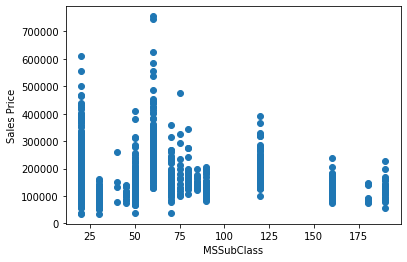

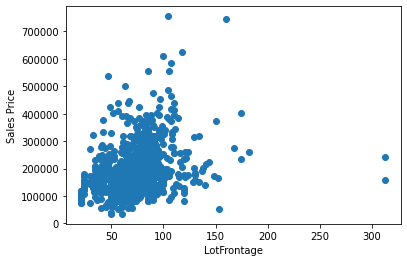

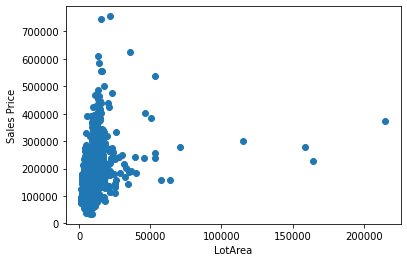

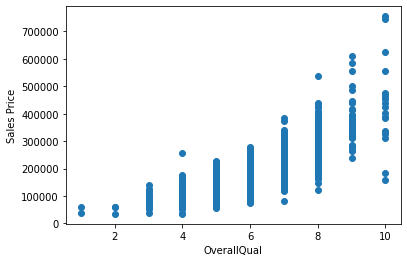

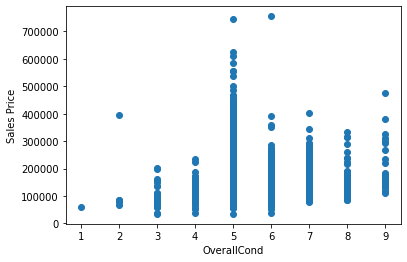

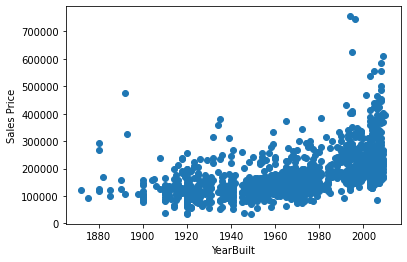

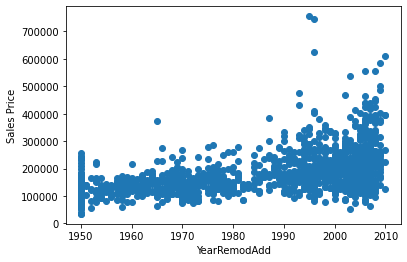

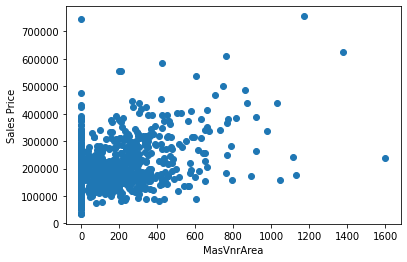

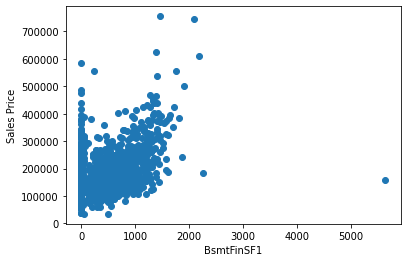

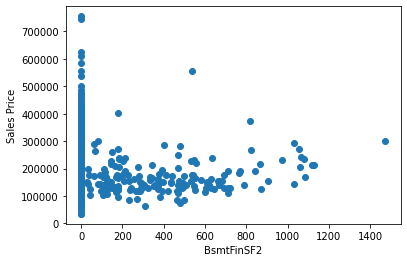

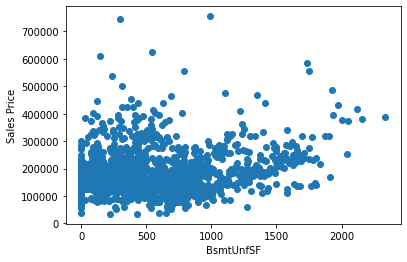

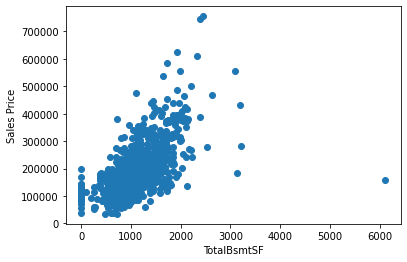

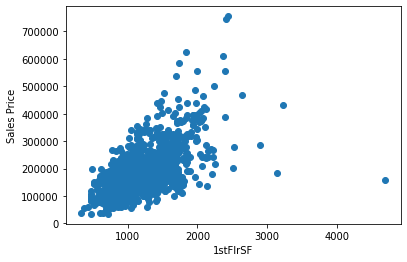

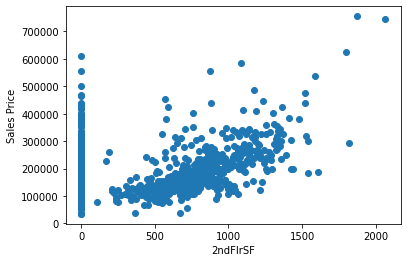

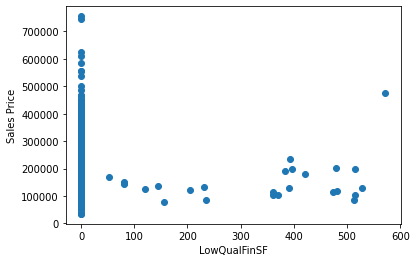

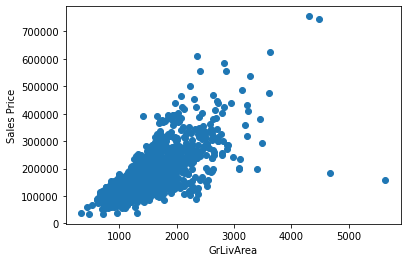

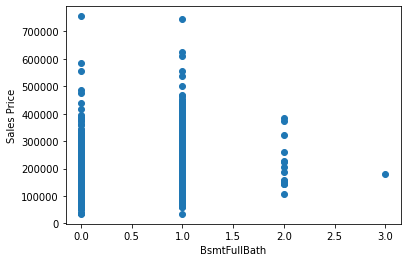

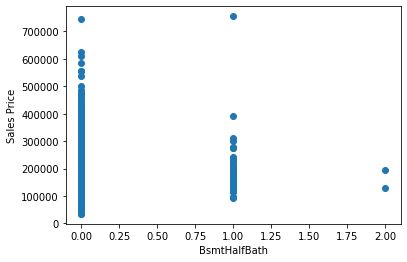

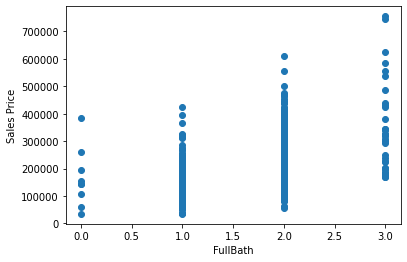

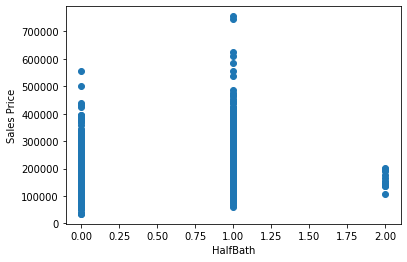

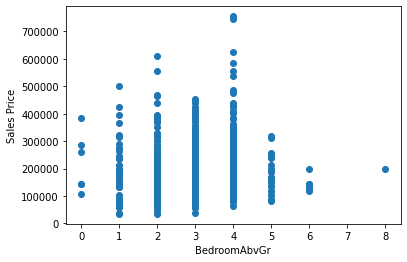

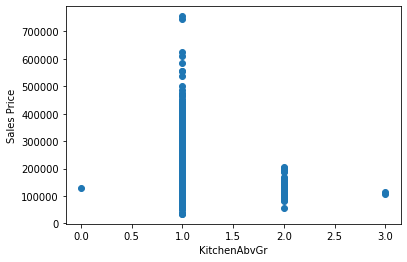

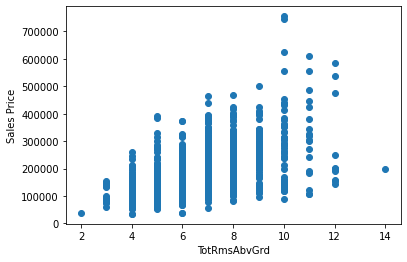

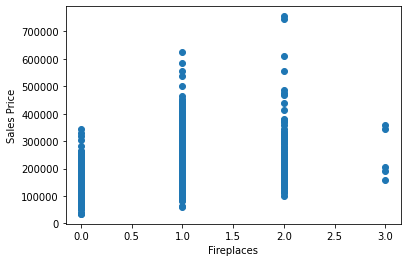

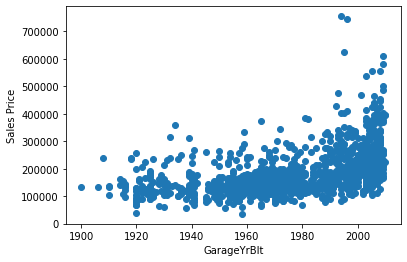

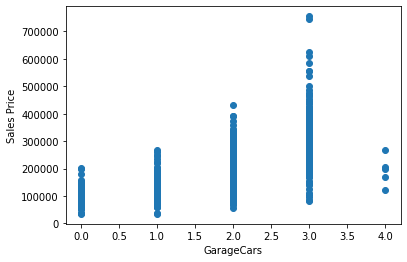

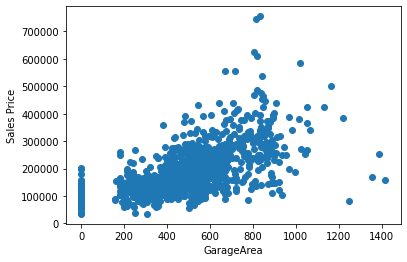

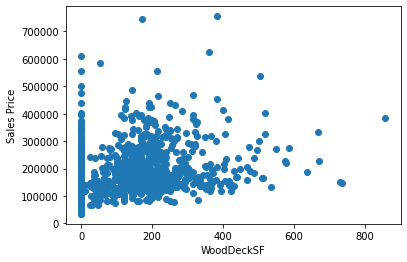

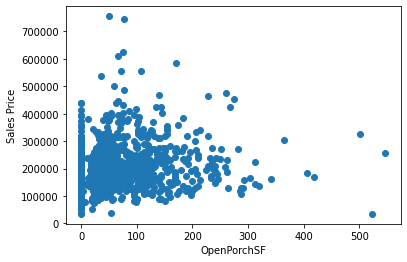

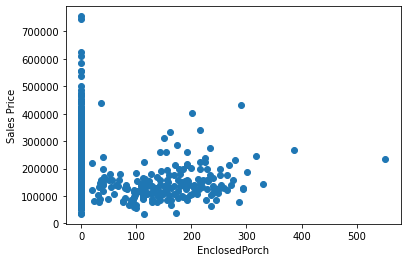

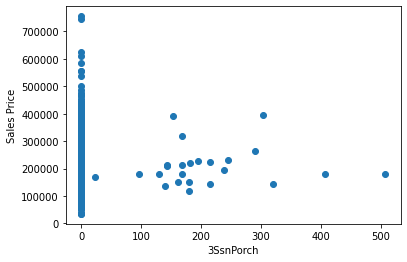

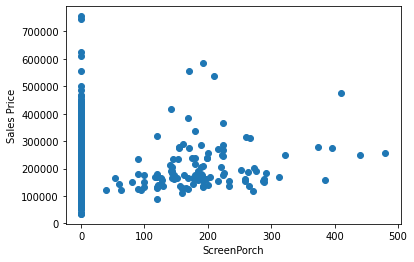

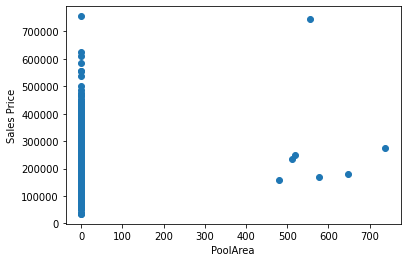

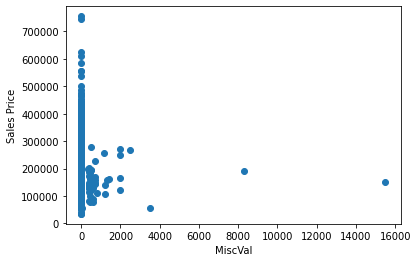

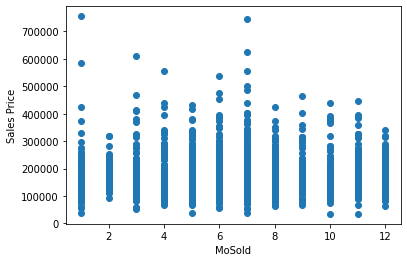

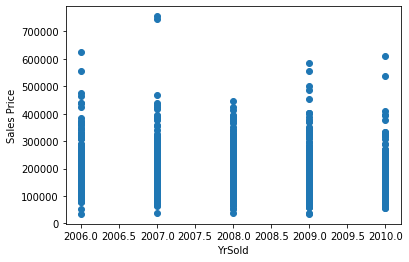

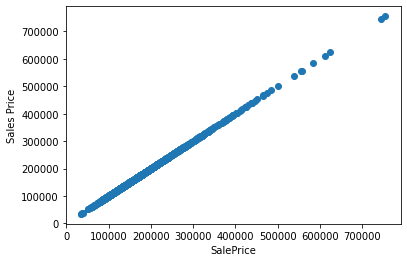

In [ ]:
# Iteramos sobre las columnas numéricas para observar la correlación que tiene hacía Sale Price
for col in df_list[0].select_dtypes(include=[np.number]).columns:
  plt.scatter(x=df_list[0].select_dtypes(include=[np.number])[col], 
              y=df_list[0].select_dtypes(include=[np.number]).SalePrice)
  plt.ylabel('Sales Price')
  plt.xlabel(f'{col}')
  plt.show()

### Análisis de Correlaciones

Mostramos de las variables continuas su correlación para entender si podemos optar para todas las features o descartar aquellas que tienen pocas relaciones con la variable target.

In [ ]:
corr = df_list[0].select_dtypes(include=[np.number]).corr()
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Hay una alta relación entre el precio de venta `SalePrice` y las variables `OverallQual`, `GrLivArea` y `Garage`. Obviamente se mide la calidad, superficie y si existen anexos al inmueble.

In [ ]:
# Comprobamos la correlación entre el año y el resto
corr = df_list[0].select_dtypes(include=[np.number]).corr()
print(corr['YearBuilt'].sort_values(ascending=False)[:10], '\n')
print(corr['YearBuilt'].sort_values(ascending=False)[-10:])

YearBuilt       1.000000
GarageYrBlt     0.825667
YearRemodAdd    0.592855
OverallQual     0.572323
GarageCars      0.537850
SalePrice       0.522897
GarageArea      0.478954
FullBath        0.468271
TotalBsmtSF     0.391452
MasVnrArea      0.315707
Name: YearBuilt, dtype: float64 

YrSold          -0.013618
MiscVal         -0.034383
BsmtHalfBath    -0.038162
BsmtFinSF2      -0.049107
ScreenPorch     -0.050364
BedroomAbvGr    -0.070651
KitchenAbvGr    -0.174800
LowQualFinSF    -0.183784
OverallCond     -0.375983
EnclosedPorch   -0.387268
Name: YearBuilt, dtype: float64


Observamos que el año de construcción está correlacionado con el año de construcción del garage y remodelación.

In [ ]:
# Comprobamos la correlación entre la condición global
corr = df_list[0].select_dtypes(include=[np.number]).corr()
print(corr['OverallCond'].sort_values(ascending=False)[:10], '\n')
print(corr['OverallCond'].sort_values(ascending=False)[-10:])

OverallCond      1.000000
BsmtHalfBath     0.117821
YearRemodAdd     0.073741
EnclosedPorch    0.070356
MiscVal          0.068777
ScreenPorch      0.054811
YrSold           0.043950
BsmtFinSF2       0.040229
2ndFlrSF         0.028942
3SsnPorch        0.025504
Name: OverallCond, dtype: float64 

OverallQual   -0.091932
MasVnrArea    -0.128101
BsmtUnfSF     -0.136841
1stFlrSF      -0.144203
GarageArea    -0.151521
TotalBsmtSF   -0.171098
GarageCars    -0.185758
FullBath      -0.194149
GarageYrBlt   -0.324297
YearBuilt     -0.375983
Name: OverallCond, dtype: float64


Observamos que existen atributos sin correlación alguna repsecto al resto. Nos deja pensar al planteamiento de utilizar la técnica de reducción de dimensionalidades.

In [ ]:
# Comprobamos la correlación entre la calidad global
corr = df_list[0].select_dtypes(include=[np.number]).corr()
print(corr['OverallQual'].sort_values(ascending=False)[:10], '\n')
print(corr['OverallQual'].sort_values(ascending=False)[-10:])

OverallQual     1.000000
SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
FullBath        0.550600
GarageYrBlt     0.547766
TotalBsmtSF     0.537808
Name: OverallQual, dtype: float64 

MSSubClass       0.032628
3SsnPorch        0.030371
YrSold          -0.027347
LowQualFinSF    -0.030429
MiscVal         -0.031406
BsmtHalfBath    -0.040150
BsmtFinSF2      -0.059119
OverallCond     -0.091932
EnclosedPorch   -0.113937
KitchenAbvGr    -0.183882
Name: OverallQual, dtype: float64


Con calidad , tenemos muchas features con su respectiva correlación positiva.

In [ ]:
def corrMissingValues(lista):
  corr = df_list[0][numerical_cols].corr()
  for i in lista:
    print(corr[i].sort_values(ascending=False)[:10], '\n')
    print(corr[i].sort_values(ascending=False)[-10:])
    print("----------NEXT CORRELATION-------------------")

In [ ]:
corrMissingValues(numerical_cols)

MSSubClass      1.000000
2ndFlrSF        0.307886
KitchenAbvGr    0.281721
HalfBath        0.177354
FullBath        0.131608
GarageYrBlt     0.085072
GrLivArea       0.074853
LowQualFinSF    0.046474
YearRemodAdd    0.040581
TotRmsAbvGrd    0.040380
Name: MSSubClass, dtype: float64 

Fireplaces    -0.045569
OverallCond   -0.059316
BsmtFinSF2    -0.065649
BsmtFinSF1    -0.069836
GarageArea    -0.098672
LotArea       -0.139781
BsmtUnfSF     -0.140759
TotalBsmtSF   -0.238518
1stFlrSF      -0.251758
LotFrontage   -0.386347
Name: MSSubClass, dtype: float64
----------NEXT CORRELATION-------------------
LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
TotRmsAbvGrd    0.352096
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
BedroomAbvGr    0.263170
Name: LotFrontage, dtype: float64 

ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold

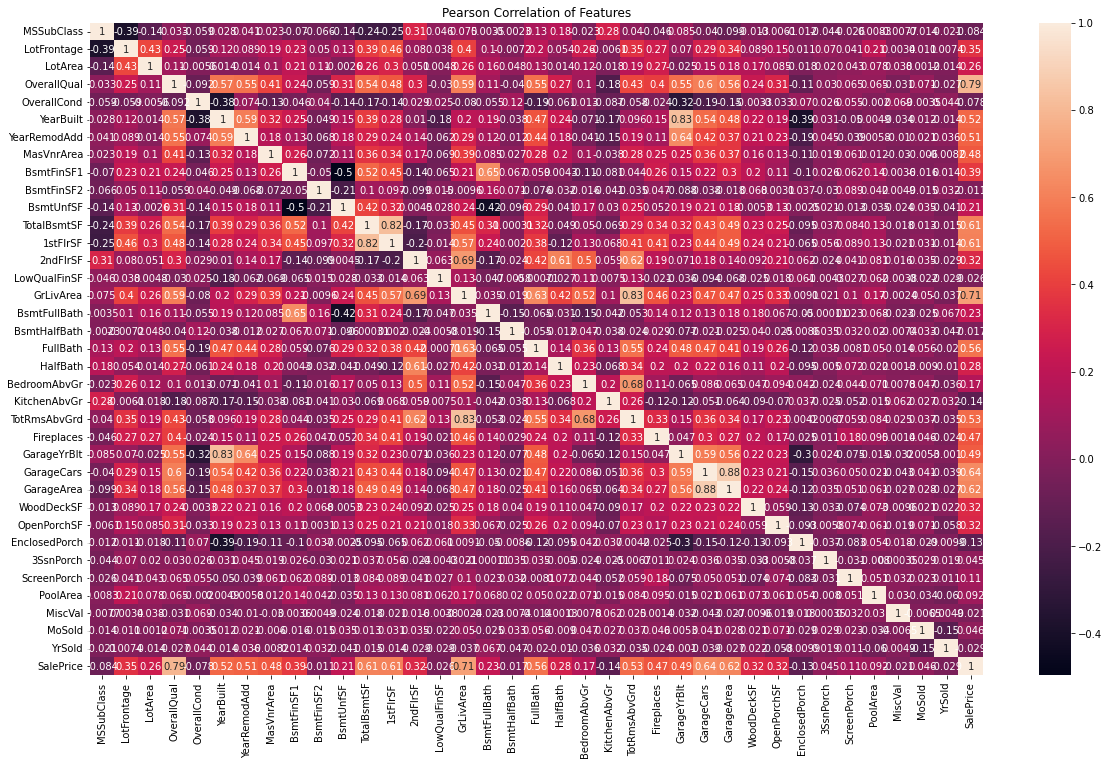

In [ ]:
# Probamos a representar visualmente la matriz de correlaciones
correlation_matrix = df_list[0].select_dtypes(include=[np.number]).corr()
correlation_matrix
plt.figure(figsize=(20,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

### Gestión de los valores nulos e imputación

tenemos varias opciones respecto a los valores nulos siempre y cuando sean por debajo 70%

- a) no hacer nada
- b) imputación simple con Media / Mediana
- b1) meida/mediana por grupos (cluster)
- c) imputación los valores frecuentes
- d) imputación K-NN
- e) MICE - Imputación Multivariate Imputation by Chained Equation
- f) ----nivel pro--- Deep Learning

In [ ]:
# creamos un dataframe solo de los valores numéricos del train
miss_num_train = [col for col in df_list[0].select_dtypes(include=[np.number]).columns if df_list[0].select_dtypes(include=[np.number])[col].isnull().any()]
miss_num_train

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# creamos un dataframe solo de los valores numéricos del test
miss_num_test = [col for col in df_list[1].select_dtypes(include=[np.number]).columns if df_list[1].select_dtypes(include=[np.number])[col].isnull().any()]
miss_num_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [ ]:
df_list[0][miss_num_train].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [ ]:
df_list[1][miss_num_test].isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [ ]:
df_list[0][miss_num_train].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [ ]:
# creamos un dataframe solo de los valores categóricos del train
miss_cols_cat_train = [col for col in df_list[0].select_dtypes(exclude=[np.number]).columns if df_list[0].select_dtypes(exclude=[np.number])[col].isnull().any()]
miss_cols_cat_train

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
# creamos un dataframe solo de los valores categóricos del test
miss_cols_cat_test = [col for col in df_list[1].select_dtypes(exclude=[np.number]).columns if df_list[1].select_dtypes(exclude=[np.number])[col].isnull().any()]
miss_cols_cat_test

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType_cat']

Observamos los valores nulos de las features categoricas

In [ ]:
df_list[0][miss_cols_cat_train].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [ ]:
df_list[1][miss_cols_cat_test].isnull().sum()

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType_cat     1
dtype: int64

#### Aplicando Imputaciones valores nulos

Se opta por asignar el valor más frecuente para las variables categóricas, y p

#### Imputaciones a las variables *categóricas*

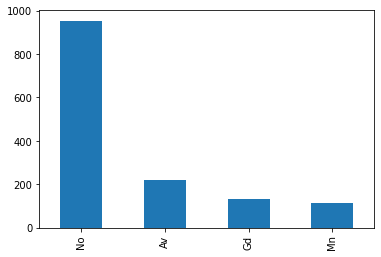

In [ ]:
df_list[0]['BsmtExposure'].value_counts().plot.bar()

In [ ]:
df_list[0]['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

##### Imputaciones categóricas Train & Test

In [ ]:
# Utilizamos CategoricalImputer para los valores frecuentes 
imputer = CategoricalImputer(variables=miss_cols_cat_train, imputation_method='frequent')

In [ ]:
imputer.fit(df_list[0])

CategoricalImputer(imputation_method='frequent',
                   variables=['MasVnrType', 'BsmtQual', 'BsmtCond',
                              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Electrical', 'GarageType', 'GarageFinish',
                              'GarageQual', 'GarageCond'])

In [ ]:
df_train = imputer.transform(df_list[0])
df_train

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,SaleType_cat,MSSubClass_cat,Neighborhood_cat
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,W,OLDER,MIDDLE
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,W,OLDER,HIGH
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,W,OLDER,MIDDLE
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,W,OLDER,HIGH
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,W,OLDER,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,Normal,175000,W,OLDER,MIDDLE
1456,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,Normal,210000,W,OLDER,MIDDLE
1457,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,Normal,266500,W,OLDER,HIGH
1458,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,Normal,142125,W,OLDER,MIDDLE


In [ ]:
categorical_feature = (df_list[0].dtypes == "category") | (df_list[0].dtypes == object)
categorical_cols = df_list[0].columns[categorical_feature].tolist()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition',
 'SaleType_cat',
 'MSSubClass_cat',
 'Neighborhood_cat']

In [ ]:
df_train[categorical_cols].isnull().sum()

MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
SaleCondition       0
SaleType_cat        0
MSSubClass_cat      0
Neighborhood_cat    0
dtype: int64

In [ ]:
df_train['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
# Utilizamos CategoricalImputer para los valores frecuentes para test
imputer = CategoricalImputer(variables=miss_cols_cat_test, imputation_method='frequent')
imputer.fit(df_list[1])
df_test = imputer.transform(df_list[1])
df_test

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SaleType_cat,MSSubClass_cat,Neighborhood_cat
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,Normal,W,OLDER,MIDDLE
1,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,Normal,W,OLDER,MIDDLE
2,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,Normal,W,OLDER,MIDDLE
3,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,Normal,W,OLDER,MIDDLE
4,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,Normal,W,OLDER,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,NaN,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,Normal,W,NEWER,LOW
1455,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,Abnorml,W,NEWER,LOW
1456,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,Abnorml,W,OLDER,MIDDLE
1457,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,NaN,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,Normal,W,NEWER,MIDDLE


#### Imputaciones variables *numéricas*

In [ ]:
miss_num_train, "********" , miss_num_test

(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 '********',
 ['LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea'])

In [ ]:
df_list[0].loc[df_list[0]['LotFrontage'].isna()][['LotFrontage','SalePrice']]

,LotFrontage,SalePrice
7,NaN,200000
12,NaN,144000
14,NaN,157000
16,NaN,149000
24,NaN,154000
...,...,...
1429,NaN,182900
1431,NaN,143750
1441,NaN,149300
1443,NaN,121000


##### Imputaciones numéricas Train & Test

In [ ]:
imputer = KNNImputer(n_neighbors=3, weights="distance")
imputer.fit(df_list[0][miss_num_train])

KNNImputer(n_neighbors=3, weights='distance')

In [ ]:
df_train[miss_num_train] = imputer.transform(df_list[0][miss_num_train])
df_train[miss_num_train]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [ ]:
df_train[miss_num_train].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
imputer = KNNImputer(n_neighbors=3, weights="distance")
imputer.fit(df_list[1][miss_num_test])
df_test[miss_num_test] = imputer.transform(df_list[1][miss_num_test])
df_test[miss_num_test]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.000000,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.000000,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.000000,2.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.000000,2.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.000000,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,1930.497862,0.0,0.0
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.000000,1.0,286.0
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.000000,2.0,576.0
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,1928.900993,0.0,0.0


In [ ]:
missing_zero_values_table(df_train)

Your selected dataframe has 75 columns and 1460 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [ ]:
missing_zero_values_table(df_test)

Your selected dataframe has 74 columns and 1459 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### Transformar features

Ahora estandarizamos los valores numéricos y los dejamos listos para utilizar:

#### Standarización variables *numéricas* Train

In [ ]:
# Extraemos las variables numéricas
numerical_cols = df_train.columns[(~df_train.columns.isin(['SalePrice'])) & ~df_train.columns.isin(categorical_cols)].to_list()
numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
df_train[numerical_cols].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.987464,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.646575,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.024519,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,22.882116,9981.264932,1.382997,1.112799,30.202904,20.645407,180.739893,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.206265,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,56.666667,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,67.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
# Hacemos lo mismo para el resto de variables cuantitativas
discrete_cols = ['SalePrice']
numerical_cols = df_train.columns[(~df_train.columns.isin(discrete_cols)) & ~df_train.columns.isin(categorical_cols)].to_list()
numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
# Estandariza los datos train
for col in numerical_cols:
    features = df_train[numerical_cols]
    scaler = StandardScaler().fit(features.values)
    feats_z = scaler.transform(features.values)
    df_train[numerical_cols] = feats_z

#### Standarización variables *numéricas* Test

In [ ]:
# Hacemos lo mismo para el resto de variables cuantitativas
discrete_cols = ['SalePrice']
numerical_cols = df_test.columns[(~df_test.columns.isin(discrete_cols)) & ~df_test.columns.isin(categorical_cols)].to_list()
numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
# Estandariza los datos test
for col in numerical_cols:
    features = df_test[numerical_cols]
    scaler = StandardScaler().fit(features.values)
    feats_z = scaler.transform(features.values)
    df_test[numerical_cols] = feats_z

####  One-Hot-Encoding de las variables categóricas Train

Separamos el proceso en 3 fases:
- `OrdinalEncoder` : de las variables discretas ordenadas
- `One-Hot-Encoding`: crear columnas dummy de las variables categóricas no binarias

In [ ]:
# Extraeremos las nuevas categóricas
categorical_feature = (df_train.dtypes == "category") | (df_train.dtypes == object)
categorical_cols = df_train.columns[categorical_feature].tolist()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition',
 'SaleType_cat',
 'MSSubClass_cat',
 'Neighborhood_cat']

In [ ]:
df_train[categorical_cols].sort_index(axis=1)

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSSubClass_cat,MSZoning,MasVnrType,Neighborhood_cat,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType_cat,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,OLDER,RL,BrkFace,MIDDLE,Y,CompShg,Gable,Normal,W,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,OLDER,RL,None,HIGH,Y,CompShg,Gable,Normal,W,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,OLDER,RL,BrkFace,MIDDLE,Y,CompShg,Gable,Normal,W,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,OLDER,RL,None,HIGH,Y,CompShg,Gable,Abnorml,W,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,OLDER,RL,BrkFace,HIGH,Y,CompShg,Gable,Normal,W,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1Fam,TA,No,Unf,Unf,Gd,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,TA,Lvl,Gtl,Inside,Reg,OLDER,RL,None,MIDDLE,Y,CompShg,Gable,Normal,W,Pave,AllPub
1456,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,SBrkr,TA,TA,Plywood,Plywood,CBlock,Min1,TA,Unf,TA,Attchd,GasA,TA,1Story,TA,Lvl,Gtl,Inside,Reg,OLDER,RL,Stone,MIDDLE,Y,CompShg,Gable,Normal,W,Pave,AllPub
1457,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,SBrkr,Gd,Ex,CemntBd,CmentBd,Stone,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,OLDER,RL,None,HIGH,Y,CompShg,Gable,Normal,W,Pave,AllPub
1458,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,FuseA,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,Unf,TA,Attchd,GasA,Gd,1Story,Gd,Lvl,Gtl,Inside,Reg,OLDER,RL,None,MIDDLE,Y,CompShg,Hip,Normal,W,Pave,AllPub


In [ ]:
# Separamos los atributos con menor clases igual a 2
for col in categorical_cols:
    display(df_train[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

W        1271
other     168
C          21
Name: SaleType_cat, dtype: int64

OLDER    1060
NEWER     400
Name: MSSubClass_cat, dtype: int64

MIDDLE    686
LOW       417
HIGH      357
Name: Neighborhood_cat, dtype: int64

In [ ]:
# Aplicamos una binarización de los atributos
discrete_cols = ['MSZoning','LandContour','HeatingQC','SaleType_cat']
for col in discrete_cols:
    lb = LabelBinarizer()
    df_train[col] = lb.fit_transform(df_train[col])

In [ ]:
ohe_cols = df_train.columns[(~df_train.columns.isin(discrete_cols)) & df_train.columns.isin(categorical_cols)].to_list()
ohe_cols

['Street',
 'LotShape',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition',
 'MSSubClass_cat',
 'Neighborhood_cat']

In [ ]:
# Aplicamos al resto un OHE
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_array = ohe.fit_transform(df_train[ohe_cols])
features_names = ohe.get_feature_names()

In [ ]:
df_ohe = pd.DataFrame(ohe_array, columns=features_names, index=df_train[ohe_cols].index)
df_train = df_train.drop(columns=ohe_cols)
df_train = pd.concat([df_train, df_ohe], axis=1)
df_train

,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleType_cat,x0_Pave,x1_IR2,x1_IR3,x1_Reg,x2_NoSeWa,x3_CulDSac,x3_FR2,x3_FR3,x3_Inside,x4_Mod,...,x20_Unf,x21_BLQ,x21_GLQ,x21_LwQ,x21_Rec,x21_Unf,x22_GasA,x22_GasW,x22_Grav,x22_OthW,x22_Wall,x23_Y,x24_FuseF,x24_FuseP,x24_Mix,x24_SBrkr,x25_Fa,x25_Gd,x25_TA,x26_Maj2,x26_Min1,x26_Min2,x26_Mod,x26_Sev,x26_Typ,x27_Attchd,x27_Basment,x27_BuiltIn,x27_CarPort,x27_Detchd,x28_RFn,x28_Unf,x29_Fa,x29_Gd,x29_Po,x29_TA,x30_Fa,x30_Gd,x30_Po,x30_TA,x31_P,x31_Y,x32_AdjLand,x32_Alloca,x32_Family,x32_Normal,x32_Partial,x33_OLDER,x34_LOW,x34_MIDDLE
0,0,-0.174321,-0.207142,0,0.651479,-0.517200,1.050994,0.878668,0.511149,0.575425,-0.288653,-0.944591,-0.459303,1,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.032131,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0.481437,-0.091886,0,-0.071836,2.179628,0.156734,-0.429577,-0.573654,1.171992,-0.288653,-0.641228,0.466465,1,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.083665,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,-0.043169,0.073480,0,0.651479,-0.517200,0.984752,0.830215,0.322969,0.092907,-0.288653,-0.301643,-0.313369,1,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.949480,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,-0.392907,-0.096897,0,0.651479,-0.517200,-1.863632,-0.720298,-0.573654,-0.499274,-0.288653,-0.061670,-0.687324,0,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.825502,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.656306,0.375148,0,1.374795,-0.517200,0.951632,0.733308,1.363494,0.463568,-0.288653,-0.174865,0.199680,1,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.908154,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Aplicando OHE para conjunto de Test

In [ ]:
# Extraeremos las nuevas categóricas
categorical_feature = (df_test.dtypes == "category") | (df_test.dtypes == object)
categorical_cols = df_test.columns[categorical_feature].tolist()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition',
 'SaleType_cat',
 'MSSubClass_cat',
 'Neighborhood_cat']

In [ ]:
# Aplicamos una binarización de los atributos
discrete_cols = ['MSZoning','LandContour','HeatingQC','SaleType_cat']
for col in discrete_cols:
    lb = LabelBinarizer()
    df_test[col] = lb.fit_transform(df_test[col])

In [ ]:
ohe_cols = df_test.columns[(~df_test.columns.isin(discrete_cols)) & df_test.columns.isin(categorical_cols)].to_list()
ohe_cols

['Street',
 'LotShape',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition',
 'MSSubClass_cat',
 'Neighborhood_cat']

In [ ]:
# Aplicamos al resto un OHE
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
ohe_array = ohe.fit_transform(df_test[ohe_cols].astype(str))
features_names = ohe.get_feature_names()
df_ohe = pd.DataFrame(ohe_array, columns=features_names, index=df_test[ohe_cols].index)
df_test = df_test.drop(columns=ohe_cols)
df_test = pd.concat([df_test, df_ohe], axis=1)
df_test

,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType_cat,x0_Pave,x1_IR2,x1_IR3,x1_Reg,x3_CulDSac,x3_FR2,x3_FR3,x3_Inside,x4_Mod,x4_Sev,x5_Feedr,...,x20_GLQ,x20_LwQ,x20_Rec,x20_Unf,x21_BLQ,x21_GLQ,x21_LwQ,x21_Rec,x21_Unf,x22_GasW,x22_Grav,x22_Wall,x23_Y,x24_FuseF,x24_FuseP,x24_SBrkr,x25_Fa,x25_Gd,x25_TA,x26_Maj2,x26_Min1,x26_Min2,x26_Mod,x26_Sev,x26_Typ,x27_Attchd,x27_Basment,x27_BuiltIn,x27_CarPort,x27_Detchd,x28_RFn,x28_Unf,x29_Gd,x29_Po,x29_TA,x30_Fa,x30_Gd,x30_Po,x30_TA,x31_P,x31_Y,x32_AdjLand,x32_Alloca,x32_Family,x32_Normal,x32_Partial,x33_NEWER,x33_OLDER,x34_LOW,x34_MIDDLE
0,0,0.512176,0.363929,0,-0.751101,0.400766,-0.340945,-1.072885,-0.568314,0.063266,0.517537,-0.650231,-0.370387,0,-0.654561,-0.775254,-0.080483,-1.215588,-0.819092,-0.258160,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.527917,-0.987483,1.186070,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0,0.558590,0.897861,0,-0.054877,0.400766,-0.439695,-1.214908,0.042263,1.063362,-0.297689,-0.339016,0.639458,0,0.433298,-0.775254,-0.080483,-0.323539,-0.819092,-0.258160,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.636878,-0.987483,-0.741059,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0,0.233693,0.809646,0,-0.751101,-0.497418,0.844059,0.678742,-0.568314,0.773224,-0.297689,-0.954581,-0.266465,0,-0.574165,0.891944,-0.080483,0.294508,-0.819092,-0.258160,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.779621,0.301995,0.042702,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0.419348,0.032064,0,-0.054877,0.400766,0.876976,0.678742,-0.455244,0.357799,-0.297689,-0.526660,-0.270984,1,-0.579190,0.837243,-0.080483,0.243004,-0.819092,-0.258160,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,0.815941,0.301995,-0.012623,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,-1.205138,-0.971808,0,1.337571,-0.497418,0.679475,0.394694,-0.568314,-0.387327,-0.297689,1.059165,0.528759,1,0.310192,-0.775254,-0.080483,-0.424487,-0.819092,-0.258160,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.598018,0.301995,0.153350,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Realizamos un check para el conjunto Train y Test

In [ ]:
df_train.shape

(1460, 196)

In [ ]:
df_test.shape

(1459, 180)

In [ ]:
# Por alinear train y test utilizamos el método join
final_train, final_test = df_train.align(df_test, join='inner', axis=1)  # inner join

In [ ]:
final_train.shape, final_test.shape

((1460, 179), (1459, 179))

## **Ejercicio 3**

Ahora que ya tienes el dataset cargado y listo para ser utilizado, escoge al menos 3 algoritmos de los vistos en la teoría/notebooks de la asignatura y aplícalos para poder hacer predicciones. Una vez obtenidos los resultados, compáralos y explica tus conclusiones teniendo en cuenta lo que pensabas conseguir al elegir dicho dataset.

Normalmente, es buena costumbre aplicar un *k-fold cross-validation* para evaluar un algoritmo, para de esta forma eliminar al máximo posible el sesgo introducido al hacer la separación de datos en *train* y *test*. Para ello, puedes utilizar la siguiente instrucción que, además, realiza el *k-fold* `n_repeats` veces con distintas semillas, para mitigar todavía más dicho sesgo:

```
cv = KFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
```

Este código realizará el *k-fold cross-validation* con `k=10`, y lo repetirá 3 veces, una con `random_state=1`, la siguiente con `random_state=2` y la última con `random_state=3`. Para ello, utilizará la medida de error cuadrático medio, pero podéis elegir la que queráis (observad el apartado "Regression" del siguiente enlace https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

Fijaos en que `neg_mean_squared_error` devolverá el error cuadrático medio multiplicado por `-1` para que la función `cross_val_score` pueda seguir buscando el valor más alto como el mejor, igual que hacía con el `accuracy`.



## R.3 - **Baseline Modelling**

In [ ]:
# Creamos la variable target
target = df_list[0].SalePrice.to_list()

In [ ]:
# Procederemos con la separación del conjunto de entreno y otro de validación
X_train, X_val, y_train, y_val = train_test_split(final_train, target, train_size = 0.75, random_state=seed)
X_train.shape, X_val.shape

((1095, 179), (365, 179))

In [ ]:
len(y_train), len(y_val)

(1095, 365)

> El conjunto **final_test** serán datos nuevos para realizar la predicción final al método que mejor resulta del entrenamiento y validación.

### Comenzamos con el Baseline

Creamos los primeros modelos con los parámetros por defecto para detectar eventuales patrones y aplicar mejoras en los pasos sucesivos.

Utilizaremos el tracking de modelos MLFlow:
- https://www.mlflow.org/docs/latest/tracking.html

#### Linear Regression

In [ ]:
# Habilitamos el autolog de MLFlow

mlflow.sklearn.autolog()

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mse = mean_squared_error(actual, pred)
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    
    return rmse, mse, mae, r2, mape

In [ ]:
# Configuramos los parámetros
run_name = 'linear_regression_baseline'
desc = 'Linear Regresion Model - baseline'
tags = {'version':'v1'}

In [ ]:
with mlflow.start_run(run_name=run_name,tags=tags, description=desc):
    # Creamos el objeto LinearRegression
    lr = LinearRegression()
    # Ajustamos el modelo a los valores del train
    lr.fit(X_train, y_train)

    # Aplicamos la predicción a los valores de validación
    y_pred = lr.predict(X_val)

    (rmse, mse, mae, r2, mape) = eval_metrics(y_val, y_pred)

    # Metrics
    print('"Root Mean square error": %.2f' % rmse)
    print('"Mean squared error": %.2f' % mse)
    print('"Mean Absolute error": %.2f' % mae)
    print('"R2": %.2f' % r2)
    print('"Mean Absolute Precision error": %.2f' % mape)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(lr, "model")

"Root Mean square error": 28987.09
"Mean squared error": 840251248.71
"Mean Absolute error": 19226.08
"R2": 0.87
"Mean Absolute Precision error": 0.12


> Los resultados con una `LinearRegression` son bastante decentes, teniendo en cuenta que la métrica **MAE** devuelve 19,226$ de diferencia entre el valor predicho y real. La métrica **R-squared** da un resultado del 87%.

#### KNeighbors Regressor - baseline

- sin tunear los parámetros
---



In [ ]:
# Configuramos los parámetros
run_name = 'knregressor_baseline'
desc = 'KNN Regressor - baseline'
tags = {'version':'v1'}
n_neighs = 3
weights = 'uniform'

with mlflow.start_run(run_name=run_name,tags=tags, description=desc):
    # Creamos el objeto KNN
    knn = KNeighborsRegressor(n_neighbors=n_neighs, weights=weights)

    # Ajustamos el modelo a los valores del train
    knn.fit(X_train, y_train)

    # Aplicamos la predicción a los valores de validación
    y_pred = knn.predict(X_val)

    (rmse, mse, mae, r2, mape) = eval_metrics(y_val, y_pred)

    # Metrics
    print('"Root Mean square error": %.2f' % rmse)
    print('"Mean squared error": %.2f' % mse)
    print('"Mean Absolute error": %.2f' % mae)
    print('"R2": %.2f' % r2)
    print('"Mean Absolute Precision error": %.2f' % mape)

    mlflow.log_param("n_neigh", n_neighs)
    mlflow.log_param("weights", weights)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(knn, "model")

"Root Mean square error": 34768.98
"Mean squared error": 1208882226.06
"Mean Absolute error": 22311.87
"R2": 0.81
"Mean Absolute Precision error": 0.12


Podemos generar nuestro tracking en un dashboard de los modelos guardados en esta ruta. Se requiere token del sitio ngrok.

In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2ISe54rdd73mgfcUIkH5Cz4ZGVl_6CmgnNu8Tkgm6KrAGqYMB"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://7f70-34-73-226-124.ngrok.io


Probamos en tunear los parámetros del `KNR`

- k=5
- w=distance
- alg=kd_tree

In [ ]:
# Configuramos los parámetros
run_name = 'knregressor_baseline'
desc = 'KNN Regressor - baseline'
tags = {'version':'v2'}
n_neighs = 5
weights = 'distance'
algorithm = 'kd_tree'

with mlflow.start_run(run_name=run_name,tags=tags, description=desc):
    # Creamos el objeto KNN
    knn = KNeighborsRegressor(n_neighbors=n_neighs, 
                              weights=weights, algorithm=algorithm)

    # Ajustamos el modelo a los valores del train
    knn.fit(X_train, y_train)

    # Aplicamos la predicción a los valores de validación
    y_pred = knn.predict(X_val)

    (rmse, mse, mae, r2, mape) = eval_metrics(y_val, y_pred)

    # Metrics
    print('"Root Mean square error": %.2f' % rmse)
    print('"Mean squared error": %.2f' % mse)
    print('"Mean Absolute error": %.2f' % mae)
    print('"R2": %.2f' % r2)
    print('"Mean Absolute Precision error": %.2f' % mape)

    mlflow.log_param("n_neigh", n_neighs)
    mlflow.log_param("weights", weights)
    mlflow.log_param("algorithm", algorithm)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(knn, "model")

"Root Mean square error": 34279.35
"Mean squared error": 1175073944.56
"Mean Absolute error": 21584.70
"R2": 0.81
"Mean Absolute Precision error": 0.12


> Con el estimador KNN no mejoramos el valor absoluto ni el R-squared.

#### Decision Tree Regressor

In [ ]:
# Configuramos los parámetros
run_name = 'dtregressor_baseline'
desc = 'DecisionTree Regressor - baseline'
tags = {'version':'v1'}
max_depth = 2

with mlflow.start_run(run_name=run_name,tags=tags, description=desc):
    # Creamos el objeto DecisionTree
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=seed)

    # Ajustamos el modelo a los valores del train
    dt.fit(X_train, y_train)

    # Aplicamos la predicción a los valores de validación
    y_pred = dt.predict(X_val)

    (rmse, mse, mae, r2, mape) = eval_metrics(y_val, y_pred)

    # Metrics
    print('"Root Mean square error": %.2f' % rmse)
    print('"Mean squared error": %.2f' % mse)
    print('"Mean Absolute error": %.2f' % mae)
    print('"R2": %.2f' % r2)
    print('"Mean Absolute Precision error": %.2f' % mape)

    mlflow.log_param("max_depth", max_depth)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(dt, "model")

"Root Mean square error": 51362.61
"Mean squared error": 2638117312.87
"Mean Absolute error": 36022.96
"R2": 0.58
"Mean Absolute Precision error": 0.21


> Con el `DecisionTree` bajamos bastante el valor absoluto y R-squared al 58%

### Creando Cross-validation con Kfold

Con el método cross-validation, con KFolds=10

In [ ]:
# Probamos con KFolds en 10 splits para Linear Regressor
kfolds = KFold(n_splits=10, shuffle=True, random_state=seed)
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=kfolds, verbose=1)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
2022/12/04 18:50:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '57f0d615564c4becbbbd1c45031f0d37', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:50:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b4266f6a09044abea9207da3c9e7d47a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:50:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bdece459630e4cc0b86d43abbf7deb13', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:50:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2a1d4ff243c5405aacc71c37a6a2fd0c', whic

array([-2.17492325e+02, -2.11208116e+16,  8.17195206e-01, -2.15259931e+17,
        8.81822992e-01, -1.06840276e+04,  8.26745203e-01, -2.41041640e+18,
       -8.11490945e+16,  8.48030954e-01])

In [ ]:
cross_validate(lr, X_train, y_train, 
               scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
               ,cv=kfolds, n_jobs=10, verbose=1)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   12.1s remaining:   48.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   20.2s finished


{'fit_time': array([0.24222398, 0.0545063 , 0.20836544, 0.07929301, 0.20566154,
        0.12730265, 0.08702683, 0.07667017, 0.07511258, 0.08062077]),
 'score_time': array([0.05946398, 0.00636005, 0.03794575, 0.02790356, 0.05583954,
        0.01403761, 0.01471949, 0.01335406, 0.0118041 , 0.01509905]),
 'test_r2': array([-1.03261362e+04, -3.05219564e+18,  8.17796595e-01, -2.04080116e+14,
         4.94485504e-01, -1.11774605e+14,  7.95786742e-01, -4.02410116e+16,
        -1.50645636e+16, -6.05511111e+02]),
 'test_neg_mean_absolute_error': array([-6.99315886e+05, -1.30606063e+13, -1.97131800e+04, -1.18008852e+11,
        -4.44710614e+04, -9.85818027e+10, -2.24410230e+04, -2.09563768e+12,
        -8.99622815e+11, -3.19904003e+05]),
 'test_neg_mean_squared_error': array([-5.03384126e+13, -1.87637381e+28, -9.58103013e+08, -1.53186927e+24,
        -3.44364774e+09, -1.05930200e+24, -1.16112272e+09, -2.39347498e+26,
        -8.82160080e+25, -3.22873953e+12])}

In [ ]:
cross_val_predict(lr, X_val, y_val, cv=kfolds, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
2022/12/04 18:52:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ef348b0b8a2f41a39a1caad817122e5b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:52:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2cfc093ffde745edbf722f4f4f4d15d5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:52:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8ee97caf12be4669bb04084ceb1de2ca', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/12/04 18:52:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aafa258604aa4a4db9c0ac23dabb6c18', whic

array([ 8.86175328e+04,  2.53841253e+05,  2.42571248e+05,  2.49689639e+05,
        2.19162360e+05,  9.58736484e+04,  1.65415636e+05,  4.34513274e+05,
        2.01823009e+05,  1.61361531e+05,  1.47661214e+05,  1.23600411e+05,
        2.32008471e+05,  1.34152282e+05,  1.48729997e+05,  1.71000201e+05,
        2.29814277e+05,  1.52429223e+05,  1.08331861e+05,  2.82968714e+05,
        1.51537306e+05,  2.23851924e+05,  1.41894000e+05,  1.78257776e+05,
        1.82951480e+05,  1.12350500e+05,  3.46952631e+05,  3.37585443e+05,
        3.22171003e+05,  2.37633085e+05,  2.70889616e+05,  2.30997376e+05,
        1.44843234e+05,  1.16178776e+05,  1.17593619e+05,  3.71011684e+05,
        1.50297503e+05,  2.13205684e+05,  2.02614572e+05,  1.28658372e+05,
        1.19943295e+05,  1.29811523e+05,  5.62314758e+04,  1.32449250e+05,
        2.64753707e+05,  1.28481323e+05,  1.25775000e+04,  1.30499616e+05,
        1.25425684e+05,  2.27044650e+05,  2.82379499e+05,  1.87766953e+05,
        1.99638832e+05,  

Los últimos resultados han mejorado bastante con el cross-validation, podemos extraer los valores directamente desde **mlflow** con resultados hasta rebajar un *MAE a 12,460 $*:

```
Name	Value
training_mae	12460
training_mse	345403621.2
training_r2_score	0.945
training_rmse	18585
training_score	0.945
```

Adjunto captura:

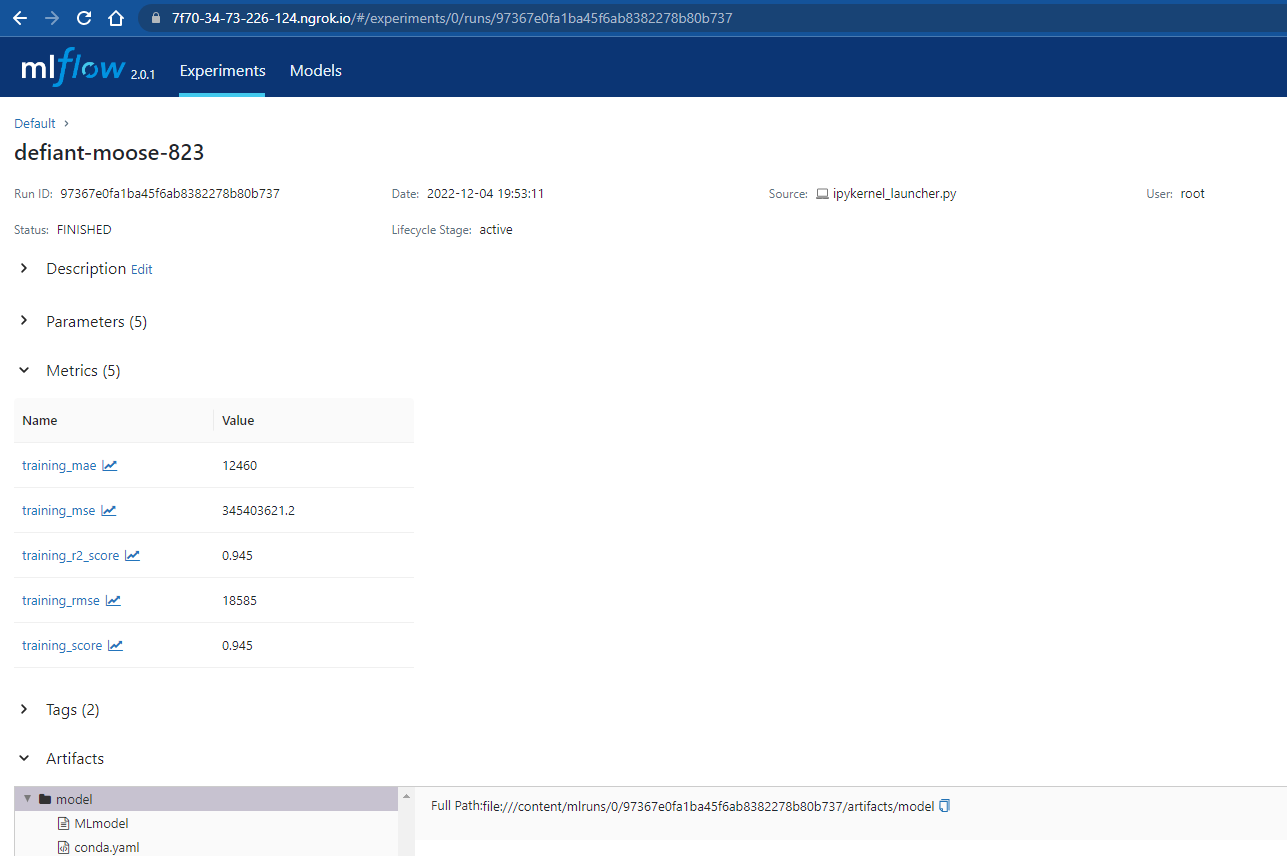

## Subida en Kaggle u obtener el vector con los resultados

In [ ]:
# Realizamos una submission de las predicciones con el modelo generado
final_predict = MODELO.predict(final_test)

# Creando el conjunto de predicción
predictive_model = pd.DataFrame(
    {
        "Id" : test_ids,
        "SalePrice": np.abs(final_predict.astype('float'))
    })

predictive_model.to_csv('submission_predict_house.csv', index=False)

```
Id	SalePrice
0	1461	2.437484e+14
1	1462	5.027771e+13
2	1463	3.903317e+13
3	1464	3.739582e+13
4	1465	4.743391e+13
...	...	...
1454	2915	2.573654e+14
1455	2916	2.669883e+14
1456	2917	2.131615e+13
1457	2918	1.379691e+14
1458	2919	5.957582e+13
```

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f 'submission_predict_house.csv' -m 'NOMBRE_MODELO_v - abs values'

## **Fuentes y recursos de interés**:
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/